# Ejercicio 1
Se desea estimar la altura promedio de estudiantes universitarios. En una muestra de 50 estudiantes, se obtuvo una media de 170 cm. Se sabe que la desviación estándar poblacional es de 10 cm. Construye un intervalo de confianza del 95 % para la media poblacional.

--- Ejercicio 1 ---
Nivel de Confianza: 0.95
Nivel de Significancia (alpha): 0.050000000000000044
Valor Crítico Z para un intervalo de confianza del 95.0%: 1.9600
Error Estándar de la Media: 1.4142
Margen de Error: 2.7718
Intervalo de Confianza del 95.0% para la media poblacional: [167.2282, 172.7718]


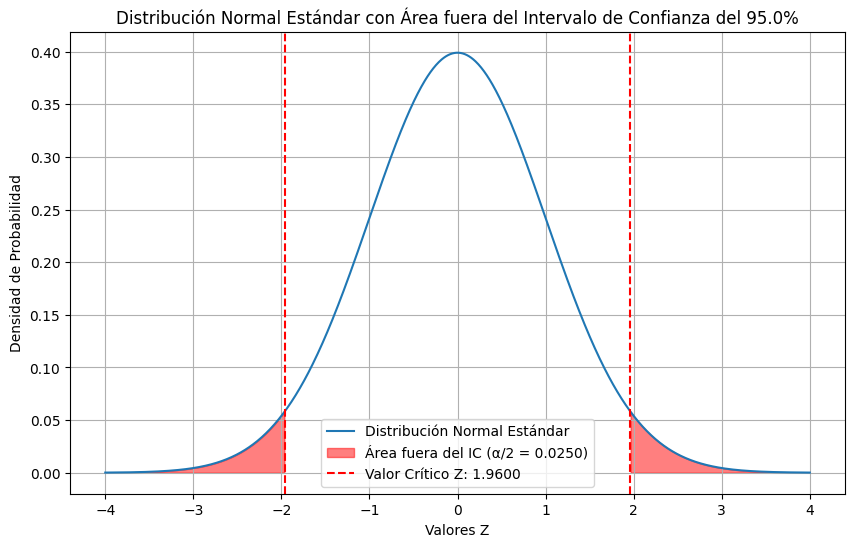

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza del 95.0% para la media poblacional se encuentra entre los valores Z críticos de ±1.9600.


In [ ]:
# Ejercicio 1. Construcción de un intervalo de confianza del 95 % para la media poblacional.

# Para intervalos de confianza, utilizamos las fórmulas estándar con explicaciones claras
# sobre el nivel de confianza y parámetros utilizados.

# Datos proporcionados:
n = 50  # Tamaño de la muestra
media_muestra = 170  # Media de la muestra en cm
desviacion_estandar_poblacional = 10  # Desviación estándar poblacional en cm
nivel_confianza = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha)
# Se utiliza para determinar el valor crítico. Para un intervalo de confianza bilateral,
# el alpha se divide en dos colas.
alfa = 1 - nivel_confianza
alfa_dos_colas = alfa / 2

# 1. Identificar el estadístico de prueba y su distribución.
# Como se conoce la desviación estándar poblacional (sigma) y el tamaño de la muestra (n=50) es grande,
# utilizamos el estadístico Z y la distribución normal estándar.

# 2. Determinar el valor crítico.
# Para un intervalo de confianza del 95%, necesitamos el valor Z tal que el 2.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas = 0.025).
# Usamos la función ppf (punto porcentual) de scipy.stats.norm para encontrar el valor Z
# que deja (1 - alfa_dos_colas) de área a la izquierda.
from scipy.stats import norm

valor_critico_z = norm.ppf(1 - alfa_dos_colas) # Valor crítico positivo para la cola superior
valor_critico_z_negativo = norm.ppf(alfa_dos_colas) # Valor crítico negativo para la cola inferior


print(f"--- Ejercicio 1 ---")
print(f"Nivel de Confianza: {nivel_confianza}")
print(f"Nivel de Significancia (alpha): {alfa}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza*100}%: {valor_critico_z:.4f}")

# 3. Calcular el error estándar de la media.
# Es la desviación estándar de la distribución muestral de la media.
# Fórmula: Error Estándar = Desviación Estándar Poblacional / sqrt(n)
import numpy as np
error_estandar = desviacion_estandar_poblacional / np.sqrt(n)

print(f"Error Estándar de la Media: {error_estandar:.4f}")

# 4. Calcular el margen de error.
# Es la cantidad que se suma y se resta a la media muestral para obtener los límites del intervalo.
# Fórmula: Margen de Error = Valor Crítico Z * Error Estándar
margen_error = valor_critico_z * error_estandar

print(f"Margen de Error: {margen_error:.4f}")

# 5. Construir el intervalo de confianza.
# Fórmula: Intervalo de Confianza = [Media Muestral - Margen de Error, Media Muestral + Margen de Error]
limite_inferior = media_muestra - margen_error
limite_superior = media_muestra + margen_error

print(f"Intervalo de Confianza del {nivel_confianza*100}% para la media poblacional: [{limite_inferior:.4f}, {limite_superior:.4f}]")

# Interpretación del Intervalo de Confianza:
# Podemos afirmar con un 95% de confianza que la verdadera altura promedio (media poblacional)
# de los estudiantes universitarios se encuentra entre {limite_inferior:.4f} cm y {limite_superior:.4f} cm.


# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z = np.linspace(-4, 4, 1000)
y_z = norm.pdf(x_z, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z, y_z, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo
# Aseguramos que valor_critico_z_negativo sea el valor negativo correspondiente a valor_critico_z
valor_critico_z_negativo = -valor_critico_z

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha = x_z[x_z > valor_critico_z]
y_fuera_ic_derecha = norm.pdf(x_fuera_ic_derecha, 0, 1)
plt.fill_between(x_fuera_ic_derecha, y_fuera_ic_derecha, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda = x_z[x_z < valor_critico_z_negativo]
y_fuera_ic_izquierda = norm.pdf(x_fuera_ic_izquierda, 0, 1)
plt.fill_between(x_fuera_ic_izquierda, y_fuera_ic_izquierda, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z:.4f}')
plt.axvline(valor_critico_z_negativo, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza*100}%.")
print(f"El intervalo de confianza del {nivel_confianza*100}% para la media poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z:.4f}.")

# Ejercicio 2
Un examen nacional tiene una desviación estándar histórica de 15 puntos. En una muestra aleatoria de 100 estudiantes, la calificación promedio fue de 75 puntos. Determina un intervalo de confianza del 90 % para la media poblacional.

--- Ejercicio 2 ---
Nivel de Confianza: 0.9
Nivel de Significancia (alpha): 0.09999999999999998
Valor Crítico Z para un intervalo de confianza del 90.0%: 1.6449
Error Estándar de la Media: 1.5000
Margen de Error: 2.4673
Intervalo de Confianza del 90.0% para la media poblacional: [72.5327, 77.4673]


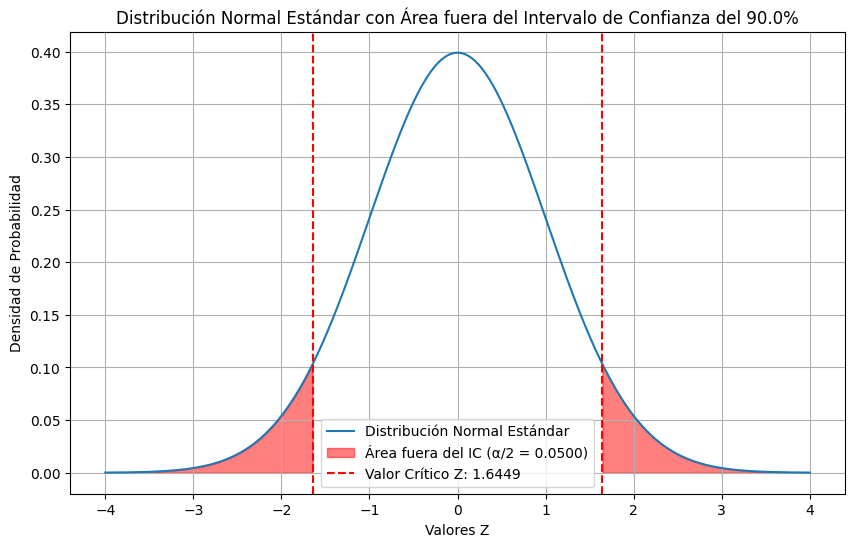

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 90.0%.
El intervalo de confianza del 90.0% para la media poblacional se encuentra entre los valores Z críticos de ±1.6449.


In [ ]:
# Ejercicio 2. Construcción de un intervalo de confianza del 90 % para la media poblacional.

# Para intervalos de confianza, utilizamos las fórmulas estándar con explicaciones claras
# sobre el nivel de confianza y parámetros utilizados.

# Datos proporcionados:
n_ej2 = 100  # Tamaño de la muestra
media_muestra_ej2 = 75  # Media de la muestra en puntos
desviacion_estandar_poblacional_ej2 = 15  # Desviación estándar poblacional en puntos
nivel_confianza_ej2 = 0.90  # Nivel de confianza deseado

# Nivel de significancia (alpha) para el Ejercicio 2
# Se utiliza para determinar el valor crítico. Para un intervalo de confianza bilateral,
# el alpha se divide en dos colas.
alfa_ej2 = 1 - nivel_confianza_ej2
alfa_dos_colas_ej2 = alfa_ej2 / 2

# 1. Identificar el estadístico de prueba y su distribución.
# Dado que se conoce la desviación estándar poblacional (sigma) y el tamaño de la muestra (n=100) es grande,
# utilizamos el estadístico Z y la distribución normal estándar.

# 2. Determinar el valor crítico.
# Para un intervalo de confianza del 90%, necesitamos el valor Z tal que el 5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej2 = 0.05).
# Usamos la función ppf (punto porcentual) de scipy.stats.norm para encontrar el valor Z
# que deja (1 - alfa_dos_colas_ej2) de área a la izquierda.
from scipy.stats import norm

valor_critico_z_ej2 = norm.ppf(1 - alfa_dos_colas_ej2) # Valor crítico positivo
valor_critico_z_negativo_ej2 = norm.ppf(alfa_dos_colas_ej2) # Valor crítico negativo

print(f"--- Ejercicio 2 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej2}")
print(f"Nivel de Significancia (alpha): {alfa_ej2}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej2*100}%: {valor_critico_z_ej2:.4f}")

# 3. Calcular el error estándar de la media.
# Es la desviación estándar de la distribución muestral de la media.
# Fórmula: Error Estándar = Desviación Estándar Poblacional / sqrt(n)
import numpy as np
error_estandar_ej2 = desviacion_estandar_poblacional_ej2 / np.sqrt(n_ej2)

print(f"Error Estándar de la Media: {error_estandar_ej2:.4f}")

# 4. Calcular el margen de error.
# Fórmula: Margen de Error = Valor Crítico Z * Error Estándar
margen_error_ej2 = valor_critico_z_ej2 * error_estandar_ej2

print(f"Margen de Error: {margen_error_ej2:.4f}")

# 5. Construir el intervalo de confianza.
# Fórmula: Intervalo de Confianza = [Media Muestral - Margen de Error, Media Muestral + Margen de Error]
limite_inferior_ej2 = media_muestra_ej2 - margen_error_ej2
limite_superior_ej2 = media_muestra_ej2 + margen_error_ej2

print(f"Intervalo de Confianza del {nivel_confianza_ej2*100}% para la media poblacional: [{limite_inferior_ej2:.4f}, {limite_superior_ej2:.4f}]")

# Interpretación del Intervalo de Confianza:
# Podemos afirmar con un 90% de confianza que la verdadera calificación promedio (media poblacional)
# del examen nacional se encuentra entre {limite_inferior_ej2:.4f} puntos y {limite_superior_ej2:.4f} puntos.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej2 = np.linspace(-4, 4, 1000)
y_z_ej2 = norm.pdf(x_z_ej2, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej2, y_z_ej2, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej2 = x_z_ej2[x_z_ej2 > valor_critico_z_ej2]
y_fuera_ic_derecha_ej2 = norm.pdf(x_fuera_ic_derecha_ej2, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej2, y_fuera_ic_derecha_ej2, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej2:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej2 = x_z_ej2[x_z_ej2 < valor_critico_z_negativo_ej2]
y_fuera_ic_izquierda_ej2 = norm.pdf(x_fuera_ic_izquierda_ej2, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej2, y_fuera_ic_izquierda_ej2, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej2, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej2:.4f}')
plt.axvline(valor_critico_z_negativo_ej2, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej2*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej2*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej2*100}% para la media poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej2:.4f}.")

# Ejercicio 3
Una fábrica produce tornillos con una desviación estándar de 0.2 cm. En una inspección de calidad, se midieron 30 tornillos y se obtuvo un diámetro promedio de 2.5 cm. Calcula un intervalo de confianza del 99 % para el diámetro promedio real.

--- Ejercicio 3 ---
Nivel de Confianza: 0.99
Nivel de Significancia (alpha): 0.010000000000000009
Valor Crítico Z para un intervalo de confianza del 99.0%: 2.5758
Error Estándar de la Media: 0.0365
Margen de Error: 0.0941
Intervalo de Confianza del 99.0% para la media poblacional: [2.4059, 2.5941]


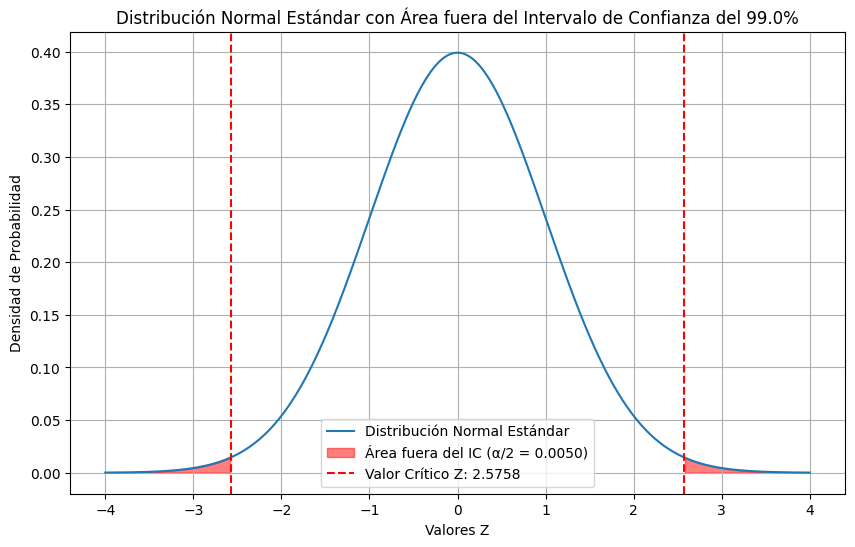

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 99.0%.
El intervalo de confianza del 99.0% para la media poblacional se encuentra entre los valores Z críticos de ±2.5758.


In [ ]:
# Ejercicio 3. Construcción de un intervalo de confianza del 99 % para el diámetro promedio real.

# Para intervalos de confianza, utilizamos las fórmulas estándar con explicaciones claras
# sobre el nivel de confianza y parámetros utilizados.

# Datos proporcionados:
n_ej3 = 30  # Tamaño de la muestra
media_muestra_ej3 = 2.5  # Media de la muestra en cm
desviacion_estandar_poblacional_ej3 = 0.2  # Desviación estándar poblacional en cm
nivel_confianza_ej3 = 0.99  # Nivel de confianza deseado

# Nivel de significancia (alpha) para el Ejercicio 3
alfa_ej3 = 1 - nivel_confianza_ej3
alfa_dos_colas_ej3 = alfa_ej3 / 2

# 1. Identificar el estadístico de prueba y su distribución.
# Dado que se conoce la desviación estándar poblacional (sigma) y el tamaño de la muestra (n=30) es justo en el límite
# de lo que a veces se considera "grande", y se conoce sigma, utilizamos el estadístico Z y la distribución normal estándar.
# Si sigma fuera desconocida y n <= 30, usaríamos la distribución t.

# 2. Determinar el valor crítico.
# Para un intervalo de confianza del 99%, necesitamos el valor Z tal que el 0.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej3 = 0.005).
# Usamos scipy.stats.norm.ppf().
from scipy.stats import norm

valor_critico_z_ej3 = norm.ppf(1 - alfa_dos_colas_ej3) # Valor crítico positivo
valor_critico_z_negativo_ej3 = norm.ppf(alfa_dos_colas_ej3) # Valor crítico negativo


print(f"--- Ejercicio 3 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej3}")
print(f"Nivel de Significancia (alpha): {alfa_ej3}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej3*100}%: {valor_critico_z_ej3:.4f}")

# 3. Calcular el error estándar de la media.
# Fórmula: Error Estándar = Desviación Estándar Poblacional / sqrt(n)
import numpy as np
error_estandar_ej3 = desviacion_estandar_poblacional_ej3 / np.sqrt(n_ej3)

print(f"Error Estándar de la Media: {error_estandar_ej3:.4f}")

# 4. Calcular el margen de error.
# Fórmula: Margen de Error = Valor Crítico Z * Error Estándar
margen_error_ej3 = valor_critico_z_ej3 * error_estandar_ej3

print(f"Margen de Error: {margen_error_ej3:.4f}")

# 5. Construir el intervalo de confianza.
# Fórmula: Intervalo de Confianza = [Media Muestral - Margen de Error, Media Muestral + Margen de Error]
limite_inferior_ej3 = media_muestra_ej3 - margen_error_ej3
limite_superior_ej3 = media_muestra_ej3 + margen_error_ej3

print(f"Intervalo de Confianza del {nivel_confianza_ej3*100}% para la media poblacional: [{limite_inferior_ej3:.4f}, {limite_superior_ej3:.4f}]")

# Interpretación del Intervalo de Confianza:
# Podemos afirmar con un 99% de confianza que el verdadero diámetro promedio (media poblacional)
# de los tornillos se encuentra entre {limite_inferior_ej3:.4f} cm y {limite_superior_ej3:.4f} cm.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej3 = np.linspace(-4, 4, 1000)
y_z_ej3 = norm.pdf(x_z_ej3, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej3, y_z_ej3, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej3 = x_z_ej3[x_z_ej3 > valor_critico_z_ej3]
y_fuera_ic_derecha_ej3 = norm.pdf(x_fuera_ic_derecha_ej3, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej3, y_fuera_ic_derecha_ej3, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej3:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej3 = x_z_ej3[x_z_ej3 < valor_critico_z_negativo_ej3]
y_fuera_ic_izquierda_ej3 = norm.pdf(x_fuera_ic_izquierda_ej3, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej3, y_fuera_ic_izquierda_ej3, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej3, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej3:.4f}')
plt.axvline(valor_critico_z_negativo_ej3, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej3*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej3*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej3*100}% para la media poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej3:.4f}.")

# Ejercicio 4

Un fabricante afirma que sus baterías tienen una desviación estándar de 1.5 horas. En una prueba con 25 baterías, la duración promedio fue de 12 horas. Encuentra un intervalo de confianza del 95 % para la duración media poblacional.

--- Ejercicio 4 ---
Nivel de Confianza: 0.95
Nivel de Significancia (alpha): 0.050000000000000044
Valor Crítico Z para un intervalo de confianza del 95.0%: 1.9600
Error Estándar de la Media: 0.3000
Margen de Error: 0.5880
Intervalo de Confianza del 95.0% para la media poblacional: [11.4120, 12.5880]


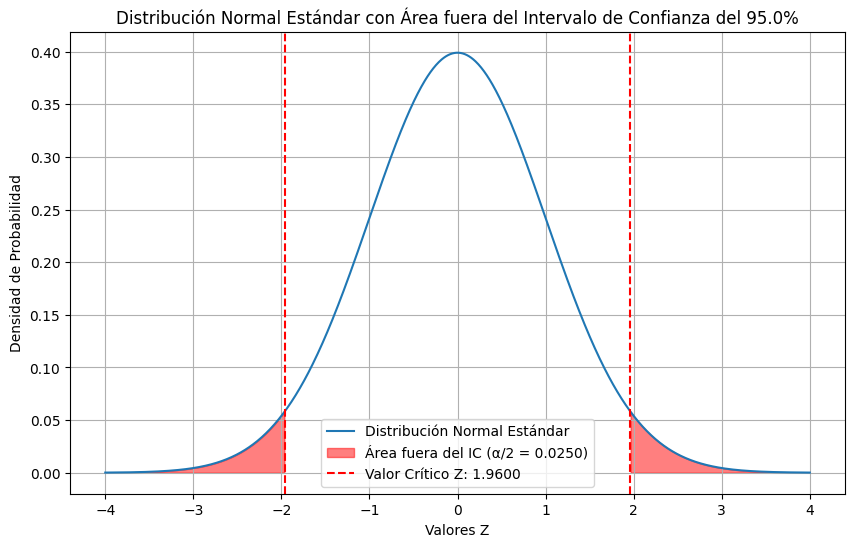

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza del 95.0% para la media poblacional se encuentra entre los valores Z críticos de ±1.9600.


In [ ]:
# Ejercicio 4. Construcción de un intervalo de confianza del 95 % para la duración media poblacional.

# Para intervalos de confianza, utilizamos las fórmulas estándar con explicaciones claras
# sobre el nivel de confianza y parámetros utilizados.

# Datos proporcionados:
n_ej4 = 25  # Tamaño de la muestra
media_muestra_ej4 = 12  # Media de la muestra en horas
desviacion_estandar_poblacional_ej4 = 1.5  # Desviación estándar poblacional en horas
nivel_confianza_ej4 = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha) para el Ejercicio 4
alfa_ej4 = 1 - nivel_confianza_ej4
alfa_dos_colas_ej4 = alfa_ej4 / 2

# 1. Identificar el estadístico de prueba y su distribución.
# Aunque el tamaño de la muestra (n=25) es pequeño, se conoce la desviación estándar poblacional (sigma).
# En este caso, se utiliza el estadístico Z y la distribución normal estándar.
# Si sigma fuera desconocida y n <= 30, usaríamos la distribución t.

# 2. Determinar el valor crítico.
# Para un intervalo de confianza del 95%, necesitamos el valor Z tal que el 2.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej4 = 0.025).
# Usamos scipy.stats.norm.ppf().
from scipy.stats import norm

valor_critico_z_ej4 = norm.ppf(1 - alfa_dos_colas_ej4) # Valor crítico positivo
valor_critico_z_negativo_ej4 = norm.ppf(alfa_dos_colas_ej4) # Valor crítico negativo


print(f"--- Ejercicio 4 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej4}")
print(f"Nivel de Significancia (alpha): {alfa_ej4}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej4*100}%: {valor_critico_z_ej4:.4f}")

# 3. Calcular el error estándar de la media.
# Fórmula: Error Estándar = Desviación Estándar Poblacional / sqrt(n)
import numpy as np
error_estandar_ej4 = desviacion_estandar_poblacional_ej4 / np.sqrt(n_ej4)

print(f"Error Estándar de la Media: {error_estandar_ej4:.4f}")

# 4. Calcular el margen de error.
# Fórmula: Margen de Error = Valor Crítico Z * Error Estándar
margen_error_ej4 = valor_critico_z_ej4 * error_estandar_ej4

print(f"Margen de Error: {margen_error_ej4:.4f}")

# 5. Construir el intervalo de confianza.
# Fórmula: Intervalo de Confianza = [Media Muestral - Margen de Error, Media Muestral + Margen de Error]
limite_inferior_ej4 = media_muestra_ej4 - margen_error_ej4
limite_superior_ej4 = media_muestra_ej4 + margen_error_ej4

print(f"Intervalo de Confianza del {nivel_confianza_ej4*100}% para la media poblacional: [{limite_inferior_ej4:.4f}, {limite_superior_ej4:.4f}]")

# Interpretación del Intervalo de Confianza:
# Podemos afirmar con un 95% de confianza que la verdadera duración promedio (media poblacional)
# de las baterías se encuentra entre {limite_inferior_ej4:.4f} horas y {limite_superior_ej4:.4f} horas.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej4 = np.linspace(-4, 4, 1000)
y_z_ej4 = norm.pdf(x_z_ej4, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej4, y_z_ej4, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej4 = x_z_ej4[x_z_ej4 > valor_critico_z_ej4]
y_fuera_ic_derecha_ej4 = norm.pdf(x_fuera_ic_derecha_ej4, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej4, y_fuera_ic_derecha_ej4, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej4:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej4 = x_z_ej4[x_z_ej4 < valor_critico_z_negativo_ej4]
y_fuera_ic_izquierda_ej4 = norm.pdf(x_fuera_ic_izquierda_ej4, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej4, y_fuera_ic_izquierda_ej4, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej4, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej4:.4f}')
plt.axvline(valor_critico_z_negativo_ej4, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej4*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej4*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej4*100}% para la media poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej4:.4f}.")

# Ejercicio 5
Un fertilizante se probó en 40 plantas, observándose un crecimiento promedio de 20 cm. Si la desviación estándar poblacional del crecimiento es de 4 cm, construye un intervalo de confianza del 95

--- Ejercicio 5 ---
Nivel de Confianza: 0.95
Nivel de Significancia (alpha): 0.050000000000000044
Valor Crítico Z para un intervalo de confianza del 95.0%: 1.9600
Error Estándar de la Media: 0.6325
Margen de Error: 1.2396
Intervalo de Confianza del 95.0% para la media poblacional: [18.7604, 21.2396]


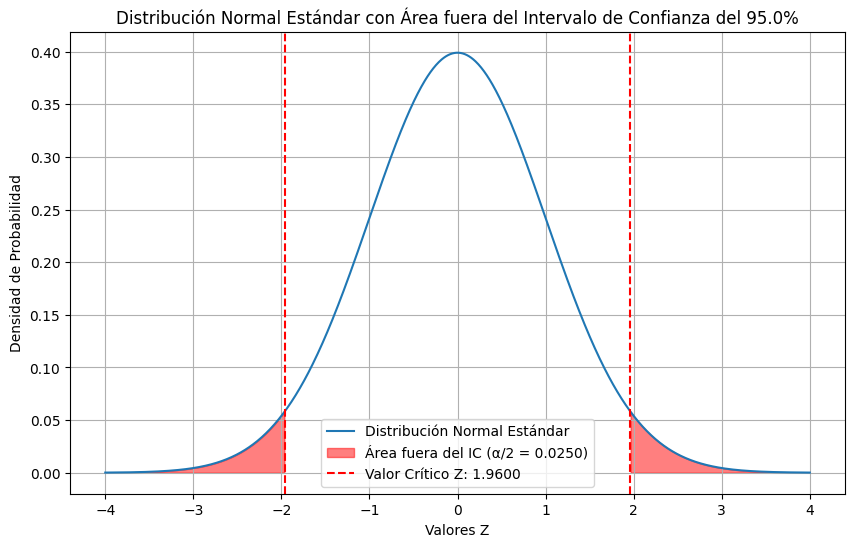

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza del 95.0% para la media poblacional se encuentra entre los valores Z críticos de ±1.9600.


In [ ]:
# Ejercicio 5. Construcción de un intervalo de confianza del 95 % para el crecimiento promedio poblacional.

# Para intervalos de confianza, utilizamos las fórmulas estándar con explicaciones claras
# sobre el nivel de confianza y parámetros utilizados.

# Datos proporcionados:
n_ej5 = 40  # Tamaño de la muestra
media_muestra_ej5 = 20  # Media de la muestra en cm
desviacion_estandar_poblacional_ej5 = 4  # Desviación estándar poblacional en cm
nivel_confianza_ej5 = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha) para el Ejercicio 5
alfa_ej5 = 1 - nivel_confianza_ej5
alfa_dos_colas_ej5 = alfa_ej5 / 2

# 1. Identificar el estadístico de prueba y su distribución.
# Dado que se conoce la desviación estándar poblacional (sigma) y el tamaño de la muestra (n=40) es grande,
# utilizamos el estadístico Z y la distribución normal estándar.

# 2. Determinar el valor crítico.
# Para un intervalo de confianza del 95%, necesitamos el valor Z tal que el 2.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej5 = 0.025).
# Usamos scipy.stats.norm.ppf().
from scipy.stats import norm

valor_critico_z_ej5 = norm.ppf(1 - alfa_dos_colas_ej5) # Valor crítico positivo
valor_critico_z_negativo_ej5 = norm.ppf(alfa_dos_colas_ej5) # Valor crítico negativo


print(f"--- Ejercicio 5 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej5}")
print(f"Nivel de Significancia (alpha): {alfa_ej5}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej5*100}%: {valor_critico_z_ej5:.4f}")

# 3. Calcular el error estándar de la media.
# Es la desviación estándar de la distribución muestral de la media.
# Fórmula: Error Estándar = Desviación Estándar Poblacional / sqrt(n)
import numpy as np
error_estandar_ej5 = desviacion_estandar_poblacional_ej5 / np.sqrt(n_ej5)

print(f"Error Estándar de la Media: {error_estandar_ej5:.4f}")

# 4. Calcular el margen de error.
# Fórmula: Margen de Error = Valor Crítico Z * Error Estándar
margen_error_ej5 = valor_critico_z_ej5 * error_estandar_ej5

print(f"Margen de Error: {margen_error_ej5:.4f}")

# 5. Construir el intervalo de confianza.
# Fórmula: Intervalo de Confianza = [Media Muestral - Margen de Error, Media Muestral + Margen de Error]
limite_inferior_ej5 = media_muestra_ej5 - margen_error_ej5
limite_superior_ej5 = media_muestra_ej5 + margen_error_ej5

print(f"Intervalo de Confianza del {nivel_confianza_ej5*100}% para la media poblacional: [{limite_inferior_ej5:.4f}, {limite_superior_ej5:.4f}]")

# Interpretación del Intervalo de Confianza:
# Podemos afirmar con un 95% de confianza que el verdadero crecimiento promedio (media poblacional)
# de las plantas se encuentra entre {limite_inferior_ej5:.4f} cm y {limite_superior_ej5:.4f} cm.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej5 = np.linspace(-4, 4, 1000)
y_z_ej5 = norm.pdf(x_z_ej5, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej5, y_z_ej5, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej5 = x_z_ej5[x_z_ej5 > valor_critico_z_ej5]
y_fuera_ic_derecha_ej5 = norm.pdf(x_fuera_ic_derecha_ej5, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej5, y_fuera_ic_derecha_ej5, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej5:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej5 = x_z_ej5[x_z_ej5 < valor_critico_z_negativo_ej5]
y_fuera_ic_izquierda_ej5 = norm.pdf(x_fuera_ic_izquierda_ej5, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej5, y_fuera_ic_izquierda_ej5, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej5, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej5:.4f}')
plt.axvline(valor_critico_z_negativo_ej5, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej5*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej5*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej5*100}% para la media poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej5:.4f}.")

# Ejercicio 6
Una cadena de cafeterías desea estimar la temperatura promedio (°C) del café que sirve a sus clientes. Se tomó una muestra aleatoria de 12 tazas donde la media fue de 84°C, y la desviación estándar 5°C. Con un nivel de confianza del 95 % calcule el intervalo de confianza para la temperatura media poblacional del café.

--- Ejercicio 6 ---
Nivel de Confianza: 0.95
Nivel de Significancia (alpha): 0.050000000000000044
Grados de Libertad (df): 11
Valor Crítico t para un intervalo de confianza del 95.0%: 2.2010
Error Estándar de la Media: 1.4434
Margen de Error: 3.1768
Intervalo de Confianza del 95.0% para la media poblacional: [80.8232, 87.1768]


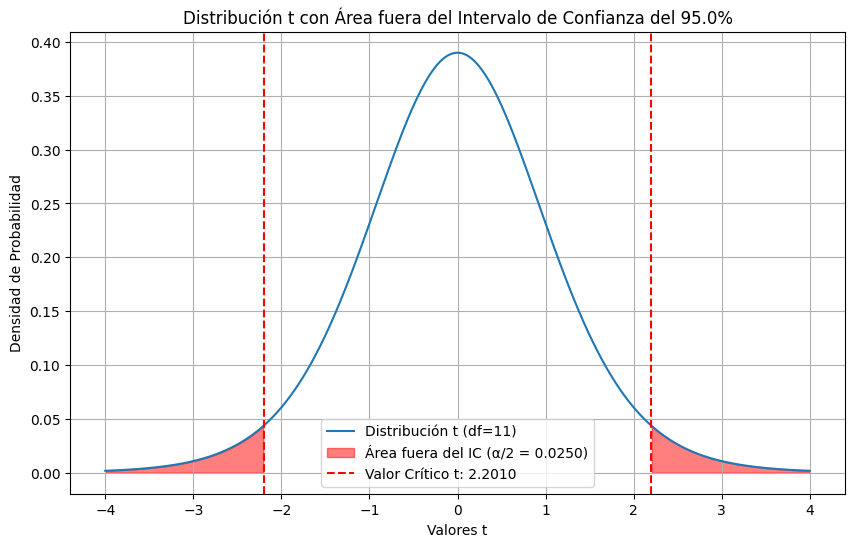

Este gráfico muestra la distribución t con 11 grados de libertad. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza calculado se basa en la distribución de muestreo de la media, que sigue una distribución t en este caso.


In [ ]:
# Ejercicio 6. Construcción de un intervalo de confianza del 95 % para la temperatura media poblacional.

# Para intervalos de confianza con muestra pequeña y desviación estándar poblacional desconocida,
# utilizamos la distribución t de Student.

# Datos proporcionados:
n_ej6 = 12  # Tamaño de la muestra (n < 30)
media_muestra_ej6 = 84  # Media de la muestra en °C
desviacion_estandar_muestra_ej6 = 5  # Desviación estándar de la muestra en °C
nivel_confianza_ej6 = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha) para el Ejercicio 6
alfa_ej6 = 1 - nivel_confianza_ej6
alfa_dos_colas_ej6 = alfa_ej6 / 2

# Grados de libertad (df) para la distribución t
# df = n - 1
grados_libertad_ej6 = n_ej6 - 1

# 1. Identificar el estadístico de prueba y su distribución.
# Como la desviación estándar poblacional es desconocida y el tamaño de la muestra (n=12) es pequeño,
# utilizamos el estadístico t y la distribución t de Student.

# 2. Determinar el valor crítico.
# Para un intervalo de confianza del 95% con n-1 grados de libertad, necesitamos el valor t
# tal que el 2.5% del área esté en cada cola de la distribución t (alfa_dos_colas_ej6 = 0.025).
# Usamos la función ppf de scipy.stats.t para encontrar el valor t
# que deja (1 - alfa_dos_colas_ej6) de área a la izquierda.
from scipy.stats import t

valor_critico_t_ej6 = t.ppf(1 - alfa_dos_colas_ej6, grados_libertad_ej6) # Valor crítico positivo

print(f"--- Ejercicio 6 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej6}")
print(f"Nivel de Significancia (alpha): {alfa_ej6}")
print(f"Grados de Libertad (df): {grados_libertad_ej6}")
print(f"Valor Crítico t para un intervalo de confianza del {nivel_confianza_ej6*100}%: {valor_critico_t_ej6:.4f}")

# 3. Calcular el error estándar de la media.
# En este caso, usamos la desviación estándar de la muestra.
# Fórmula: Error Estándar = Desviación Estándar de la Muestra / sqrt(n)
import numpy as np
error_estandar_ej6 = desviacion_estandar_muestra_ej6 / np.sqrt(n_ej6)

print(f"Error Estándar de la Media: {error_estandar_ej6:.4f}")

# 4. Calcular el margen de error.
# Fórmula: Margen de Error = Valor Crítico t * Error Estándar
margen_error_ej6 = valor_critico_t_ej6 * error_estandar_ej6

print(f"Margen de Error: {margen_error_ej6:.4f}")

# 5. Construir el intervalo de confianza.
# Fórmula: Intervalo de Confianza = [Media Muestral - Margen de Error, Media Muestral + Margen de Error]
limite_inferior_ej6 = media_muestra_ej6 - margen_error_ej6
limite_superior_ej6 = media_muestra_ej6 + margen_error_ej6

print(f"Intervalo de Confianza del {nivel_confianza_ej6*100}% para la media poblacional: [{limite_inferior_ej6:.4f}, {limite_superior_ej6:.4f}]")

# Interpretación del Intervalo de Confianza:
# Podemos afirmar con un 95% de confianza que la verdadera temperatura promedio (media poblacional)
# del café servido por la cadena de cafeterías se encuentra entre {limite_inferior_ej6:.4f} °C y {limite_superior_ej6:.4f} °C.

# Graficar la distribución t y la región de rechazo (Adaptación para Intervalo de Confianza)
# Aunque es un intervalo de confianza, podemos visualizar dónde caerían los valores críticos t.
import matplotlib.pyplot as plt
from scipy.stats import t

# Generar puntos para la curva t
x_t = np.linspace(-4, 4, 1000)
y_t = t.pdf(x_t, grados_libertad_ej6) # PDF de la distribución t con los grados de libertad correctos

plt.figure(figsize=(10, 6))
plt.plot(x_t, y_t, label=f'Distribución t (df={grados_libertad_ej6})')

# Sombrear la región de "no confianza" (análoga a la región de rechazo en prueba de hipótesis)
# Usamos el valor crítico t positivo y negativo
valor_critico_t_negativo_ej6 = -valor_critico_t_ej6

# Rellenar la cola derecha
x_no_confianza_derecha = x_t[x_t > valor_critico_t_ej6]
y_no_confianza_derecha = t.pdf(x_no_confianza_derecha, grados_libertad_ej6)
plt.fill_between(x_no_confianza_derecha, y_no_confianza_derecha, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej6:.4f})')

# Rellenar la cola izquierda
x_no_confianza_izquierda = x_t[x_t < valor_critico_t_negativo_ej6]
y_no_confianza_izquierda = t.pdf(x_no_confianza_izquierda, grados_libertad_ej6)
plt.fill_between(x_no_confianza_izquierda, y_no_confianza_izquierda, color='red', alpha=0.5)

# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_t_ej6, color='red', linestyle='--', label=f'Valor Crítico t: {valor_critico_t_ej6:.4f}')
plt.axvline(valor_critico_t_negativo_ej6, color='red', linestyle='--')

# Configurar el gráfico
plt.title(f'Distribución t con Área fuera del Intervalo de Confianza del {nivel_confianza_ej6*100}%')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución t con {grados_libertad_ej6} grados de libertad. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej6*100}%.")
print(f"El intervalo de confianza calculado se basa en la distribución de muestreo de la media, que sigue una distribución t en este caso.")

# Ejercicio 7
Un fabricante prueba la duración (horas) de la batería de un nuevo modelo de smartphone bajo uso estándar. Tomó una muestra aleatoria de 15 dispositivos donde obtuvo una media de 8 horas con una desviación estándar de 1.2 horas. Con un nivel de confianza del 90 % determine el intervalo de confianza para la duración media real de la batería.

--- Ejercicio 7 ---
Nivel de Confianza: 0.9
Nivel de Significancia (alpha): 0.09999999999999998
Grados de Libertad (df): 14
Valor Crítico t para un intervalo de confianza del 90.0%: 1.7613
Error Estándar de la Media: 0.3098
Margen de Error: 0.5457
Intervalo de Confianza del 90.0% para la media poblacional: [7.4543, 8.5457]


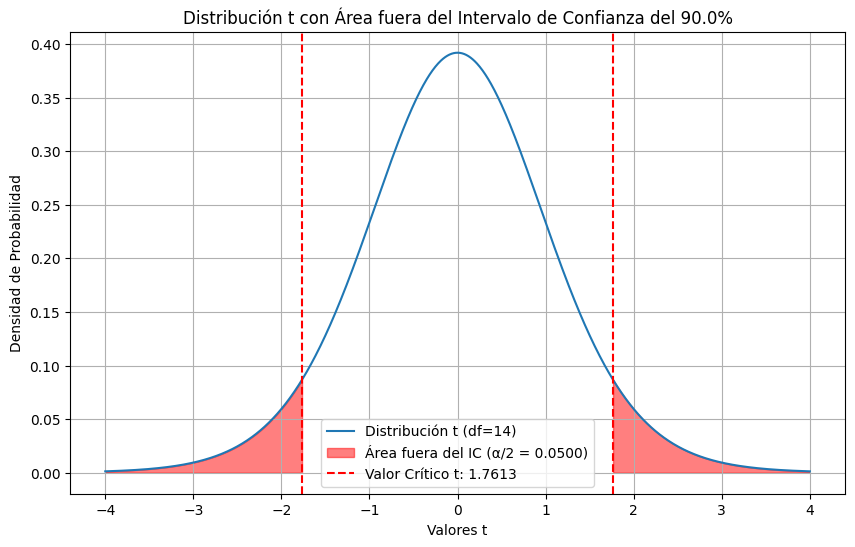

Este gráfico muestra la distribución t con 14 grados de libertad. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 90.0%.
El intervalo de confianza calculado se basa en la distribución de muestreo de la media, que sigue una distribución t en este caso.


In [ ]:
# Ejercicio 7. Construcción de un intervalo de confianza del 90 % para la duración media real de la batería.

# Para intervalos de confianza con muestra pequeña y desviación estándar poblacional desconocida,
# utilizamos la distribución t de Student.

# Datos proporcionados:
n_ej7 = 15  # Tamaño de la muestra (n < 30)
media_muestra_ej7 = 8  # Media de la muestra en horas
desviacion_estandar_muestra_ej7 = 1.2  # Desviación estándar de la muestra en horas
nivel_confianza_ej7 = 0.90  # Nivel de confianza deseado

# Nivel de significancia (alpha) para el Ejercicio 7
alfa_ej7 = 1 - nivel_confianza_ej7
alfa_dos_colas_ej7 = alfa_ej7 / 2

# Grados de libertad (df) para la distribución t
# df = n - 1
grados_libertad_ej7 = n_ej7 - 1

# 1. Identificar el estadístico de prueba y su distribución.
# Como la desviación estándar poblacional es desconocida y el tamaño de la muestra (n=15) es pequeño,
# utilizamos el estadístico t y la distribución t de Student.

# 2. Determinar el valor crítico.
# Para un intervalo de confianza del 90% con n-1 grados de libertad, necesitamos el valor t
# tal que el 5% del área esté en cada cola de la distribución t (alfa_dos_colas_ej7 = 0.05).
# Usamos la función ppf de scipy.stats.t para encontrar el valor t
# que deja (1 - alfa_dos_colas_ej7) de área a la izquierda.
from scipy.stats import t

valor_critico_t_ej7 = t.ppf(1 - alfa_dos_colas_ej7, grados_libertad_ej7) # Valor crítico positivo

print(f"--- Ejercicio 7 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej7}")
print(f"Nivel de Significancia (alpha): {alfa_ej7}")
print(f"Grados de Libertad (df): {grados_libertad_ej7}")
print(f"Valor Crítico t para un intervalo de confianza del {nivel_confianza_ej7*100}%: {valor_critico_t_ej7:.4f}")

# 3. Calcular el error estándar de la media.
# En este caso, usamos la desviación estándar de la muestra.
# Fórmula: Error Estándar = Desviación Estándar de la Muestra / sqrt(n)
import numpy as np
error_estandar_ej7 = desviacion_estandar_muestra_ej7 / np.sqrt(n_ej7)

print(f"Error Estándar de la Media: {error_estandar_ej7:.4f}")

# 4. Calcular el margen de error.
# Fórmula: Margen de Error = Valor Crítico t * Error Estándar
margen_error_ej7 = valor_critico_t_ej7 * error_estandar_ej7

print(f"Margen de Error: {margen_error_ej7:.4f}")

# 5. Construir el intervalo de confianza.
# Fórmula: Intervalo de Confianza = [Media Muestral - Margen de Error, Media Muestral + Margen de Error]
limite_inferior_ej7 = media_muestra_ej7 - margen_error_ej7
limite_superior_ej7 = media_muestra_ej7 + margen_error_ej7

print(f"Intervalo de Confianza del {nivel_confianza_ej7*100}% para la media poblacional: [{limite_inferior_ej7:.4f}, {limite_superior_ej7:.4f}]")

# Interpretación del Intervalo de Confianza:
# Podemos afirmar con un 90% de confianza que la verdadera duración promedio (media poblacional)
# de la batería del smartphone se encuentra entre {limite_inferior_ej7:.4f} horas y {limite_superior_ej7:.4f} horas.

# Graficar la distribución t y la región de rechazo (Adaptación para Intervalo de Confianza)
# Aunque es un intervalo de confianza, podemos visualizar dónde caerían los valores críticos t.
import matplotlib.pyplot as plt
from scipy.stats import t

# Generar puntos para la curva t
x_t_ej7 = np.linspace(-4, 4, 1000)
y_t_ej7 = t.pdf(x_t_ej7, grados_libertad_ej7) # PDF de la distribución t con los grados de libertad correctos

plt.figure(figsize=(10, 6))
plt.plot(x_t_ej7, y_t_ej7, label=f'Distribución t (df={grados_libertad_ej7})')

# Sombrear la región de "no confianza" (análoga a la región de rechazo en prueba de hipótesis)
# Usamos el valor crítico t positivo y negativo
valor_critico_t_negativo_ej7 = -valor_critico_t_ej7

# Rellenar la cola derecha
x_no_confianza_derecha_ej7 = x_t_ej7[x_t_ej7 > valor_critico_t_ej7]
y_no_confianza_derecha_ej7 = t.pdf(x_no_confianza_derecha_ej7, grados_libertad_ej7)
plt.fill_between(x_no_confianza_derecha_ej7, y_no_confianza_derecha_ej7, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej7:.4f})')

# Rellenar la cola izquierda
x_no_confianza_izquierda_ej7 = x_t_ej7[x_t_ej7 < valor_critico_t_negativo_ej7]
y_no_confianza_izquierda_ej7 = t.pdf(x_no_confianza_izquierda_ej7, grados_libertad_ej7)
plt.fill_between(x_no_confianza_izquierda_ej7, y_no_confianza_izquierda_ej7, color='red', alpha=0.5)

# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_t_ej7, color='red', linestyle='--', label=f'Valor Crítico t: {valor_critico_t_ej7:.4f}')
plt.axvline(valor_critico_t_negativo_ej7, color='red', linestyle='--')

# Configurar el gráfico
plt.title(f'Distribución t con Área fuera del Intervalo de Confianza del {nivel_confianza_ej7*100}%')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución t con {grados_libertad_ej7} grados de libertad. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej7*100}%.")
print(f"El intervalo de confianza calculado se basa en la distribución de muestreo de la media, que sigue una distribución t en este caso.")

# Ejercicio 8
Un equipo agrícola estudia el efecto de un fertilizante experimental en la altura (cm) de plántulas de maíz. Se tomó una muestra aleatoria de 10 plantas con una media de 25 cm y una desviación estándar de 3 cm. Construya el intervalo de confianza para la altura media poblacional de las plántulas con un nivel de confianza del 99 %.

--- Ejercicio 8 ---
Nivel de Confianza: 0.99
Nivel de Significancia (alpha): 0.010000000000000009
Grados de Libertad (df): 9
Valor Crítico t para un intervalo de confianza del 99.0%: 3.2498
Error Estándar de la Media: 0.9487
Margen de Error: 3.0831
Intervalo de Confianza del 99.0% para la media poblacional: [21.9169, 28.0831]


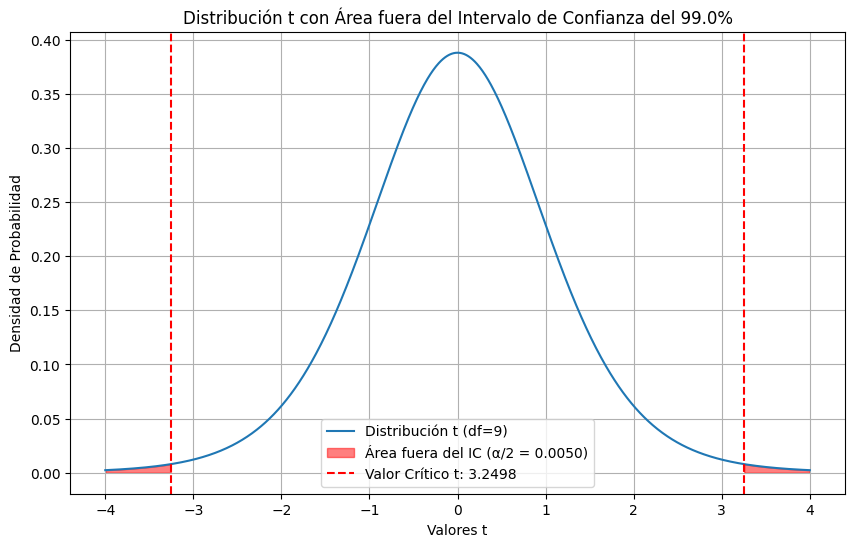

Este gráfico muestra la distribución t con 9 grados de libertad. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 99.0%.
El intervalo de confianza calculado se basa en la distribución de muestreo de la media, que sigue una distribución t en este caso.


In [ ]:
# Ejercicio 8. Construcción de un intervalo de confianza del 99 % para la altura media poblacional de las plántulas.

# Para intervalos de confianza con muestra pequeña y desviación estándar poblacional desconocida,
# utilizamos la distribución t de Student.

# Datos proporcionados:
n_ej8 = 10  # Tamaño de la muestra (n < 30)
media_muestra_ej8 = 25  # Media de la muestra en cm
desviacion_estandar_muestra_ej8 = 3  # Desviación estándar de la muestra en cm
nivel_confianza_ej8 = 0.99  # Nivel de confianza deseado

# Nivel de significancia (alpha) para el Ejercicio 8
alfa_ej8 = 1 - nivel_confianza_ej8
alfa_dos_colas_ej8 = alfa_ej8 / 2

# Grados de libertad (df) para la distribución t
# df = n - 1
grados_libertad_ej8 = n_ej8 - 1

# 1. Identificar el estadístico de prueba y su distribución.
# Como la desviación estándar poblacional es desconocida y el tamaño de la muestra (n=10) es pequeño,
# utilizamos el estadístico t y la distribución t de Student.

# 2. Determinar el valor crítico.
# Para un intervalo de confianza del 99% con n-1 grados de libertad, necesitamos el valor t
# tal que el 0.5% del área esté en cada cola de la distribución t (alfa_dos_colas_ej8 = 0.005).
# Usamos la función ppf de scipy.stats.t para encontrar el valor t
# que deja (1 - alfa_dos_colas_ej8) de área a la izquierda.
from scipy.stats import t

valor_critico_t_ej8 = t.ppf(1 - alfa_dos_colas_ej8, grados_libertad_ej8) # Valor crítico positivo

print(f"--- Ejercicio 8 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej8}")
print(f"Nivel de Significancia (alpha): {alfa_ej8}")
print(f"Grados de Libertad (df): {grados_libertad_ej8}")
print(f"Valor Crítico t para un intervalo de confianza del {nivel_confianza_ej8*100}%: {valor_critico_t_ej8:.4f}")

# 3. Calcular el error estándar de la media.
# En este caso, usamos la desviación estándar de la muestra.
# Fórmula: Error Estándar = Desviación Estándar de la Muestra / sqrt(n)
import numpy as np
error_estandar_ej8 = desviacion_estandar_muestra_ej8 / np.sqrt(n_ej8)

print(f"Error Estándar de la Media: {error_estandar_ej8:.4f}")

# 4. Calcular el margen de error.
# Fórmula: Margen de Error = Valor Crítico t * Error Estándar
margen_error_ej8 = valor_critico_t_ej8 * error_estandar_ej8

print(f"Margen de Error: {margen_error_ej8:.4f}")

# 5. Construir el intervalo de confianza.
# Fórmula: Intervalo de Confianza = [Media Muestral - Margen de Error, Media Muestral + Margen de Error]
limite_inferior_ej8 = media_muestra_ej8 - margen_error_ej8
limite_superior_ej8 = media_muestra_ej8 + margen_error_ej8

print(f"Intervalo de Confianza del {nivel_confianza_ej8*100}% para la media poblacional: [{limite_inferior_ej8:.4f}, {limite_superior_ej8:.4f}]")

# Interpretación del Intervalo de Confianza:
# Podemos afirmar con un 99% de confianza que la verdadera altura promedio (media poblacional)
# de las plántulas de maíz se encuentra entre {limite_inferior_ej8:.4f} cm y {limite_superior_ej8:.4f} cm.

# Graficar la distribución t y la región de rechazo (Adaptación para Intervalo de Confianza)
# Aunque es un intervalo de confianza, podemos visualizar dónde caerían los valores críticos t.
import matplotlib.pyplot as plt
from scipy.stats import t

# Generar puntos para la curva t
x_t_ej8 = np.linspace(-4, 4, 1000)
y_t_ej8 = t.pdf(x_t_ej8, grados_libertad_ej8) # PDF de la distribución t con los grados de libertad correctos

plt.figure(figsize=(10, 6))
plt.plot(x_t_ej8, y_t_ej8, label=f'Distribución t (df={grados_libertad_ej8})')

# Sombrear la región de "no confianza" (análoga a la región de rechazo en prueba de hipótesis)
# Usamos el valor crítico t positivo y negativo
valor_critico_t_negativo_ej8 = -valor_critico_t_ej8

# Rellenar la cola derecha
x_no_confianza_derecha_ej8 = x_t_ej8[x_t_ej8 > valor_critico_t_ej8]
y_no_confianza_derecha_ej8 = t.pdf(x_no_confianza_derecha_ej8, grados_libertad_ej8)
plt.fill_between(x_no_confianza_derecha_ej8, y_no_confianza_derecha_ej8, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej8:.4f})')

# Rellenar la cola izquierda
x_no_confianza_izquierda_ej8 = x_t_ej8[x_t_ej8 < valor_critico_t_negativo_ej8]
y_no_confianza_izquierda_ej8 = t.pdf(x_no_confianza_izquierda_ej8, grados_libertad_ej8)
plt.fill_between(x_no_confianza_izquierda_ej8, y_no_confianza_izquierda_ej8, color='red', alpha=0.5)

# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_t_ej8, color='red', linestyle='--', label=f'Valor Crítico t: {valor_critico_t_ej8:.4f}')
plt.axvline(valor_critico_t_negativo_ej8, color='red', linestyle='--')

# Configurar el gráfico
plt.title(f'Distribución t con Área fuera del Intervalo de Confianza del {nivel_confianza_ej8*100}%')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución t con {grados_libertad_ej8} grados de libertad. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej8*100}%.")
print(f"El intervalo de confianza calculado se basa en la distribución de muestreo de la media, que sigue una distribución t en este caso.")

# Ejercicio 9
Una pizzería quiere verificar si su tiempo promedio de entrega (minutos) es menor a 35 minutos. Se tuvo en cuenta una muestra aleatoria de 20 entregas recientes las cuales tuvieron una media de 30 minutos y una desviación estándar de 4 minutos. Estime el intervalo de confianza para el tiempo medio de entrega con un nivel de confianza del 95 %.

--- Ejercicio 9 ---
Nivel de Confianza: 0.95
Nivel de Significancia (alpha): 0.050000000000000044
Grados de Libertad (df): 19
Valor Crítico t para un intervalo de confianza del 95.0%: 2.0930
Error Estándar de la Media: 0.8944
Margen de Error: 1.8721
Intervalo de Confianza del 95.0% para la media poblacional: [28.1279, 31.8721]


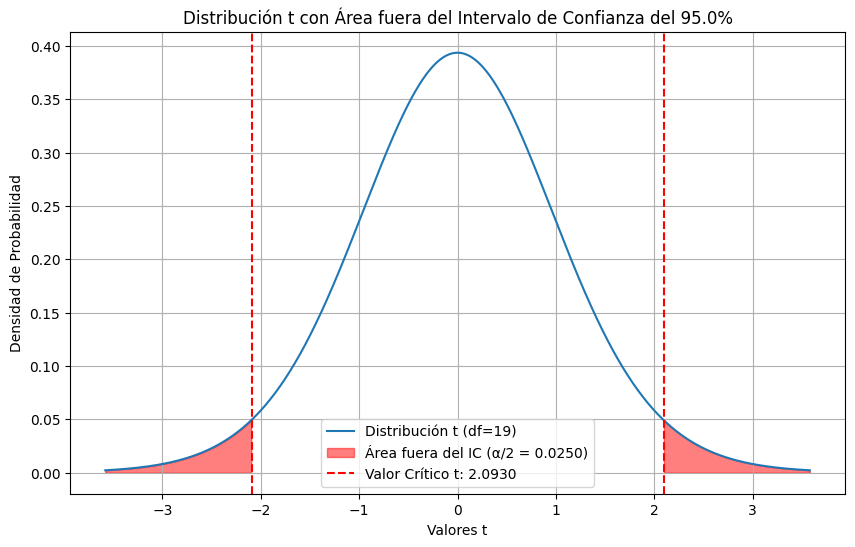

Este gráfico muestra la distribución t con 19 grados de libertad. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza calculado se basa en la distribución de muestreo de la media, que sigue una distribución t en este caso.


In [ ]:
# Ejercicio 9. Construcción de un intervalo de confianza del 95 % para el tiempo medio de entrega.

# Para intervalos de confianza con muestra pequeña y desviación estándar poblacional desconocida,
# utilizamos la distribución t de Student.

# Datos proporcionados:
n_ej9 = 20  # Tamaño de la muestra (n < 30)
media_muestra_ej9 = 30  # Media de la muestra en minutos
desviacion_estandar_muestra_ej9 = 4  # Desviación estándar de la muestra en minutos
nivel_confianza_ej9 = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha) para el Ejercicio 9
alfa_ej9 = 1 - nivel_confianza_ej9
alfa_dos_colas_ej9 = alfa_ej9 / 2

# Grados de libertad (df) para la distribución t
# df = n - 1
grados_libertad_ej9 = n_ej9 - 1

# 1. Identificar el estadístico de prueba y su distribución.
# Como la desviación estándar poblacional es desconocida y el tamaño de la muestra (n=20) es pequeño,
# utilizamos el estadístico t y la distribución t de Student.

# 2. Determinar el valor crítico.
# Para un intervalo de confianza del 95% con n-1 grados de libertad, necesitamos el valor t
# tal que el 2.5% del área esté en cada cola de la distribución t (alfa_dos_colas_ej9 = 0.025).
# Usamos la función ppf de scipy.stats.t para encontrar el valor t
# que deja (1 - alfa_dos_colas_ej9) de área a la izquierda.
from scipy.stats import t

valor_critico_t_ej9 = t.ppf(1 - alfa_dos_colas_ej9, grados_libertad_ej9) # Valor crítico positivo

print(f"--- Ejercicio 9 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej9}")
print(f"Nivel de Significancia (alpha): {alfa_ej9}")
print(f"Grados de Libertad (df): {grados_libertad_ej9}")
print(f"Valor Crítico t para un intervalo de confianza del {nivel_confianza_ej9*100}%: {valor_critico_t_ej9:.4f}")

# 3. Calcular el error estándar de la media.
# En este caso, usamos la desviación estándar de la muestra.
# Fórmula: Error Estándar = Desviación Estándar de la Muestra / sqrt(n)
import numpy as np
error_estandar_ej9 = desviacion_estandar_muestra_ej9 / np.sqrt(n_ej9)

print(f"Error Estándar de la Media: {error_estandar_ej9:.4f}")

# 4. Calcular el margen de error.
# Fórmula: Margen de Error = Valor Crítico t * Error Estándar
margen_error_ej9 = valor_critico_t_ej9 * error_estandar_ej9

print(f"Margen de Error: {margen_error_ej9:.4f}")

# 5. Construir el intervalo de confianza.
# Fórmula: Intervalo de Confianza = [Media Muestral - Margen de Error, Media Muestral + Margen de Error]
limite_inferior_ej9 = media_muestra_ej9 - margen_error_ej9
limite_superior_ej9 = media_muestra_ej9 + margen_error_ej9

print(f"Intervalo de Confianza del {nivel_confianza_ej9*100}% para la media poblacional: [{limite_inferior_ej9:.4f}, {limite_superior_ej9:.4f}]")

# Interpretación del Intervalo de Confianza:
# Podemos afirmar con un 95% de confianza que el verdadero tiempo promedio de entrega (media poblacional)
# de la pizzería se encuentra entre {limite_inferior_ej9:.4f} minutos y {limite_superior_ej9:.4f} minutos.

# Opcional: Graficar la distribución t y la región de "no confianza"
import matplotlib.pyplot as plt
from scipy.stats import t

# Generar puntos para la curva t
x_t_ej9 = np.linspace(t.ppf(0.001, grados_libertad_ej9), t.ppf(0.999, grados_libertad_ej9), 1000) # Rango más amplio para la gráfica
y_t_ej9 = t.pdf(x_t_ej9, grados_libertad_ej9) # PDF de la distribución t con los grados de libertad correctos

plt.figure(figsize=(10, 6))
plt.plot(x_t_ej9, y_t_ej9, label=f'Distribución t (df={grados_libertad_ej9})')

# Sombrear la región de "no confianza" (análoga a la región de rechazo en prueba de hipótesis)
# Usamos el valor crítico t positivo y negativo
valor_critico_t_negativo_ej9 = -valor_critico_t_ej9

# Rellenar la cola derecha
x_no_confianza_derecha_ej9 = x_t_ej9[x_t_ej9 > valor_critico_t_ej9]
y_no_confianza_derecha_ej9 = t.pdf(x_no_confianza_derecha_ej9, grados_libertad_ej9)
plt.fill_between(x_no_confianza_derecha_ej9, y_no_confianza_derecha_ej9, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej9:.4f})')

# Rellenar la cola izquierda
x_no_confianza_izquierda_ej9 = x_t_ej9[x_t_ej9 < valor_critico_t_negativo_ej9]
y_no_confianza_izquierda_ej9 = t.pdf(x_no_confianza_izquierda_ej9, grados_libertad_ej9)
plt.fill_between(x_no_confianza_izquierda_ej9, y_no_confianza_izquierda_ej9, color='red', alpha=0.5)

# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_t_ej9, color='red', linestyle='--', label=f'Valor Crítico t: {valor_critico_t_ej9:.4f}')
plt.axvline(valor_critico_t_negativo_ej9, color='red', linestyle='--')

# Configurar el gráfico
plt.title(f'Distribución t con Área fuera del Intervalo de Confianza del {nivel_confianza_ej9*100}%')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución t con {grados_libertad_ej9} grados de libertad. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej9*100}%.")
print(f"El intervalo de confianza calculado se basa en la distribución de muestreo de la media, que sigue una distribución t en este caso.")

# Ejercicio 10
La biblioteca de una universidad necesita estimar el peso promedio (kg) de los libros de matemáticas. Tomó una muestra aleatoria de 8 libros los cuales tuvieron una media de 1.5 kg y una desviación estándar de 0.3 kg. Calcule el intervalo de confianza para el peso medio poblacional de los libros con un nivel de confianza del 95 %.

--- Ejercicio 10 ---
Nivel de Confianza: 0.95
Nivel de Significancia (alpha): 0.050000000000000044
Grados de Libertad (df): 7
Valor Crítico t para un intervalo de confianza del 95.0%: 2.3646
Error Estándar de la Media: 0.1061
Margen de Error: 0.2508
Intervalo de Confianza del 95.0% para la media poblacional: [1.2492, 1.7508]


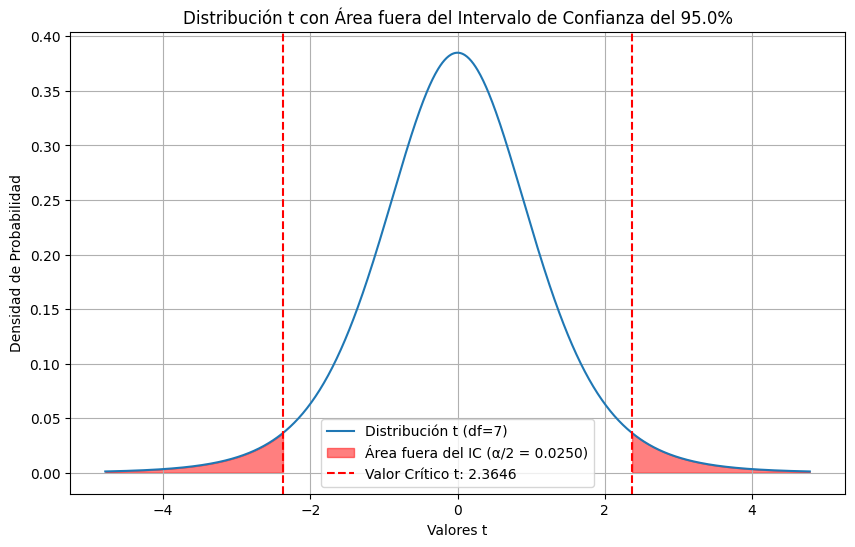

Este gráfico muestra la distribución t con 7 grados de libertad. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza calculado se basa en la distribución de muestreo de la media, que sigue una distribución t en este caso.


In [ ]:
# Ejercicio 10. Construcción de un intervalo de confianza del 95 % para el peso medio poblacional de los libros.

# Para intervalos de confianza con muestra pequeña y desviación estándar poblacional desconocida,
# utilizamos la distribución t de Student.

# Datos proporcionados:
n_ej10 = 8  # Tamaño de la muestra (n < 30)
media_muestra_ej10 = 1.5  # Media de la muestra en kg
desviacion_estandar_muestra_ej10 = 0.3  # Desviación estándar de la muestra en kg
nivel_confianza_ej10 = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha) para el Ejercicio 10
alfa_ej10 = 1 - nivel_confianza_ej10
alfa_dos_colas_ej10 = alfa_ej10 / 2

# Grados de libertad (df) para la distribución t
# df = n - 1
grados_libertad_ej10 = n_ej10 - 1

# 1. Identificar el estadístico de prueba y su distribución.
# Como la desviación estándar poblacional es desconocida y el tamaño de la muestra (n=8) es pequeño,
# utilizamos el estadístico t y la distribución t de Student.

# 2. Determinar el valor crítico.
# Para un intervalo de confianza del 95% con n-1 grados de libertad, necesitamos el valor t
# tal que el 2.5% del área esté en cada cola de la distribución t (alfa_dos_colas_ej10 = 0.025).
# Usamos la función ppf de scipy.stats.t para encontrar el valor t
# que deja (1 - alfa_dos_colas_ej10) de área a la izquierda.
from scipy.stats import t

valor_critico_t_ej10 = t.ppf(1 - alfa_dos_colas_ej10, grados_libertad_ej10) # Valor crítico positivo

print(f"--- Ejercicio 10 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej10}")
print(f"Nivel de Significancia (alpha): {alfa_ej10}")
print(f"Grados de Libertad (df): {grados_libertad_ej10}")
print(f"Valor Crítico t para un intervalo de confianza del {nivel_confianza_ej10*100}%: {valor_critico_t_ej10:.4f}")

# 3. Calcular el error estándar de la media.
# En este caso, usamos la desviación estándar de la muestra.
# Fórmula: Error Estándar = Desviación Estándar de la Muestra / sqrt(n)
import numpy as np
error_estandar_ej10 = desviacion_estandar_muestra_ej10 / np.sqrt(n_ej10)

print(f"Error Estándar de la Media: {error_estandar_ej10:.4f}")

# 4. Calcular el margen de error.
# Fórmula: Margen de Error = Valor Crítico t * Error Estándar
margen_error_ej10 = valor_critico_t_ej10 * error_estandar_ej10

print(f"Margen de Error: {margen_error_ej10:.4f}")

# 5. Construir el intervalo de confianza.
# Fórmula: Intervalo de Confianza = [Media Muestral - Margen de Error, Media Muestral + Margen de Error]
limite_inferior_ej10 = media_muestra_ej10 - margen_error_ej10
limite_superior_ej10 = media_muestra_ej10 + margen_error_ej10

print(f"Intervalo de Confianza del {nivel_confianza_ej10*100}% para la media poblacional: [{limite_inferior_ej10:.4f}, {limite_superior_ej10:.4f}]")

# Interpretación del Intervalo de Confianza:
# Podemos afirmar con un 95% de confianza que el verdadero peso promedio (media poblacional)
# de los libros de matemáticas se encuentra entre {limite_inferior_ej10:.4f} kg y {limite_superior_ej10:.4f} kg.

# Graficar la distribución t y la región de rechazo (Adaptación para Intervalo de Confianza)
# Aunque es un intervalo de confianza, podemos visualizar dónde caerían los valores críticos t.
import matplotlib.pyplot as plt
from scipy.stats import t

# Generar puntos para la curva t
x_t_ej10 = np.linspace(t.ppf(0.001, grados_libertad_ej10), t.ppf(0.999, grados_libertad_ej10), 1000) # Rango más amplio para la gráfica
y_t_ej10 = t.pdf(x_t_ej10, grados_libertad_ej10) # PDF de la distribución t con los grados de libertad correctos

plt.figure(figsize=(10, 6))
plt.plot(x_t_ej10, y_t_ej10, label=f'Distribución t (df={grados_libertad_ej10})')

# Sombrear la región de "no confianza" (análoga a la región de rechazo en prueba de hipótesis)
# Usamos el valor crítico t positivo y negativo
valor_critico_t_negativo_ej10 = -valor_critico_t_ej10

# Rellenar la cola derecha
x_no_confianza_derecha_ej10 = x_t_ej10[x_t_ej10 > valor_critico_t_ej10]
y_no_confianza_derecha_ej10 = t.pdf(x_no_confianza_derecha_ej10, grados_libertad_ej10)
plt.fill_between(x_no_confianza_derecha_ej10, y_no_confianza_derecha_ej10, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej10:.4f})')

# Rellenar la cola izquierda
x_no_confianza_izquierda_ej10 = x_t_ej10[x_t_ej10 < valor_critico_t_negativo_ej10]
y_no_confianza_izquierda_ej10 = t.pdf(x_no_confianza_izquierda_ej10, grados_libertad_ej10)
plt.fill_between(x_no_confianza_izquierda_ej10, y_no_confianza_izquierda_ej10, color='red', alpha=0.5)

# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_t_ej10, color='red', linestyle='--', label=f'Valor Crítico t: {valor_critico_t_ej10:.4f}')
plt.axvline(valor_critico_t_negativo_ej10, color='red', linestyle='--')

# Configurar el gráfico
plt.title(f'Distribución t con Área fuera del Intervalo de Confianza del {nivel_confianza_ej10*100}%')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución t con {grados_libertad_ej10} grados de libertad. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej10*100}%.")
print(f"El intervalo de confianza calculado se basa en la distribución de muestreo de la media, que sigue una distribución t en este caso.")

# Ejercicio 11

El departamento de salud planea una encuesta para estimar la proporción de residentes vacunados contra la influenza. En un estudio piloto, el 72 % de una muestra mostró estar vacunado. Determine el tamaño de muestra necesario para estimar esta proporción con un margen de error del 3 % y un nivel de confianza del 95 %. Si no se tuviera el estudio piloto, ¿cuál sería el tamaño requerido?

--- Ejercicio 11 ---
Nivel de Confianza: 0.95
Margen de Error deseado: 0.03
Valor Crítico Z para un intervalo de confianza del 95.0%: 1.9600

Caso 1: Con estimación previa (p_hat = 0.72)
Tamaño de muestra calculado: 860.4868
Tamaño de muestra requerido (redondeado hacia arriba): 861

Caso 2: Sin estimación previa (usando p = 0.5)
Tamaño de muestra calculado: 1067.0719
Tamaño de muestra requerido (redondeado hacia arriba): 1068


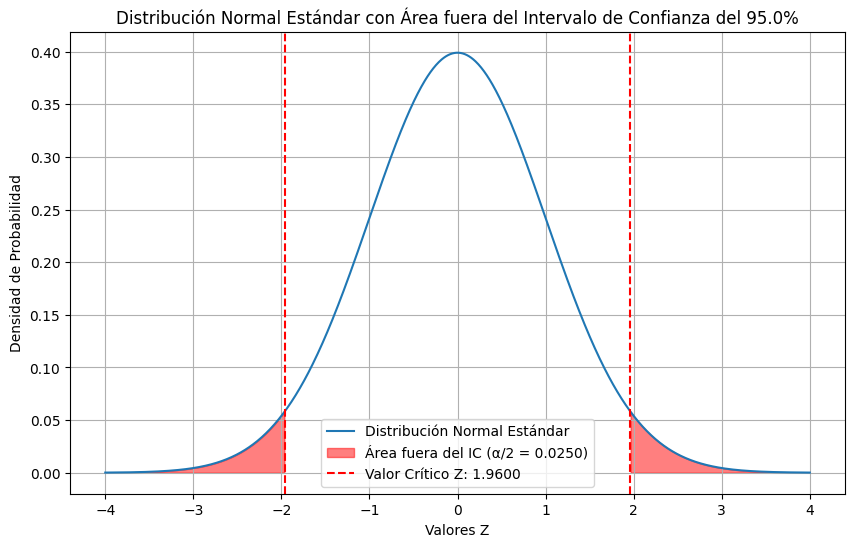

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza del 95.0% para la proporción poblacional se encuentra entre los valores Z críticos de ±1.9600.


In [ ]:
# Ejercicio 11. Cálculo del tamaño de muestra para estimar una proporción poblacional.

# Utilizamos la fórmula para el tamaño de muestra para proporciones, considerando si hay
# o no una estimación previa de la proporción (p).

# Datos proporcionados:
margen_error_ej11 = 0.03  # Margen de error deseado (3 %)
nivel_confianza_ej11 = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha)
alfa_ej11 = 1 - nivel_confianza_ej11
alfa_dos_colas_ej11 = alfa_ej11 / 2

# 1. Determinar el valor crítico Z para el nivel de confianza.
# Para un nivel de confianza del 95%, necesitamos el valor Z tal que el 2.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej11 = 0.025).
# Usamos scipy.stats.norm.ppf()
from scipy.stats import norm

valor_critico_z_ej11 = norm.ppf(1 - alfa_dos_colas_ej11) # Valor crítico positivo
valor_critico_z_negativo_ej11 = norm.ppf(alfa_dos_colas_ej11) # Valor crítico negativo


print(f"--- Ejercicio 11 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej11}")
print(f"Margen de Error deseado: {margen_error_ej11}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej11*100}%: {valor_critico_z_ej11:.4f}")

# Caso 1: Se tiene una estimación previa de la proporción (p).
# En este caso, p_hat (la proporción estimada) es 0.72 (72 %).
p_hat_ej11 = 0.72
q_hat_ej11 = 1 - p_hat_ej11

# Fórmula del tamaño de muestra con p_hat:
# n = (Z^2 * p_hat * q_hat) / E^2
n_con_p_hat_ej11 = (valor_critico_z_ej11**2 * p_hat_ej11 * q_hat_ej11) / (margen_error_ej11**2)

# El tamaño de muestra debe ser un número entero, por lo que redondeamos hacia arriba.
import math
n_con_p_hat_redondeado_ej11 = math.ceil(n_con_p_hat_ej11)

print(f"\nCaso 1: Con estimación previa (p_hat = {p_hat_ej11})")
print(f"Tamaño de muestra calculado: {n_con_p_hat_ej11:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_con_p_hat_redondeado_ej11}")

# Interpretación: Para estimar la proporción con un 95% de confianza y un margen de error del 3%,
# utilizando la estimación previa del 72%, se necesitan al menos {n_con_p_hat_redondeado_ej11} residentes en la muestra.


# Caso 2: No se tiene una estimación previa de la proporción.
# Cuando no hay una estimación previa, usamos p = 0.5 (y q = 0.5) para maximizar el producto p*q,
# lo que resulta en el tamaño de muestra más grande y conservador.
p_sin_p_hat_ej11 = 0.5
q_sin_p_hat_ej11 = 0.5

# Fórmula del tamaño de muestra sin p_hat:
# n = (Z^2 * 0.25) / E^2  (ya que p*q = 0.5 * 0.5 = 0.25)
n_sin_p_hat_ej11 = (valor_critico_z_ej11**2 * p_sin_p_hat_ej11 * q_sin_p_hat_ej11) / (margen_error_ej11**2)

# Redondeamos hacia arriba.
n_sin_p_hat_redondeado_ej11 = math.ceil(n_sin_p_hat_ej11)

print(f"\nCaso 2: Sin estimación previa (usando p = 0.5)")
print(f"Tamaño de muestra calculado: {n_sin_p_hat_ej11:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_sin_p_hat_redondeado_ej11}")

# Interpretación: Si no se tiene una estimación previa, para lograr el mismo nivel de confianza y margen de error,
# se necesitan al menos {n_sin_p_hat_redondeado_ej11} residentes en la muestra. Este es el tamaño de muestra
# más grande posible para estas condiciones.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej11 = np.linspace(-4, 4, 1000)
y_z_ej11 = norm.pdf(x_z_ej11, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej11, y_z_ej11, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej11 = x_z_ej11[x_z_ej11 > valor_critico_z_ej11]
y_fuera_ic_derecha_ej11 = norm.pdf(x_fuera_ic_derecha_ej11, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej11, y_fuera_ic_derecha_ej11, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej11:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej11 = x_z_ej11[x_z_ej11 < valor_critico_z_negativo_ej11]
y_fuera_ic_izquierda_ej11 = norm.pdf(x_fuera_ic_izquierda_ej11, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej11, y_fuera_ic_izquierda_ej11, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej11, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej11:.4f}')
plt.axvline(valor_critico_z_negativo_ej11, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej11*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej11*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej11*100}% para la proporción poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej11:.4f}.")

# Ejercicio 12
Una tienda en línea desea calcular la tasa de devoluciones de un producto. En datos históricos, el 7 % de los pedidos se devolvían. Calcule el tamaño de muestra necesario para estimar la proporción de devoluciones con un margen de error del 4 % y un nivel de confianza del 90 %.

--- Ejercicio 12 ---
Nivel de Confianza: 0.9
Margen de Error deseado: 0.04
Estimación previa de la proporción (p_hat): 0.07
Valor Crítico Z para un intervalo de confianza del 90.0%: 1.6449

Tamaño de muestra calculado: 110.0818
Tamaño de muestra requerido (redondeado hacia arriba): 111


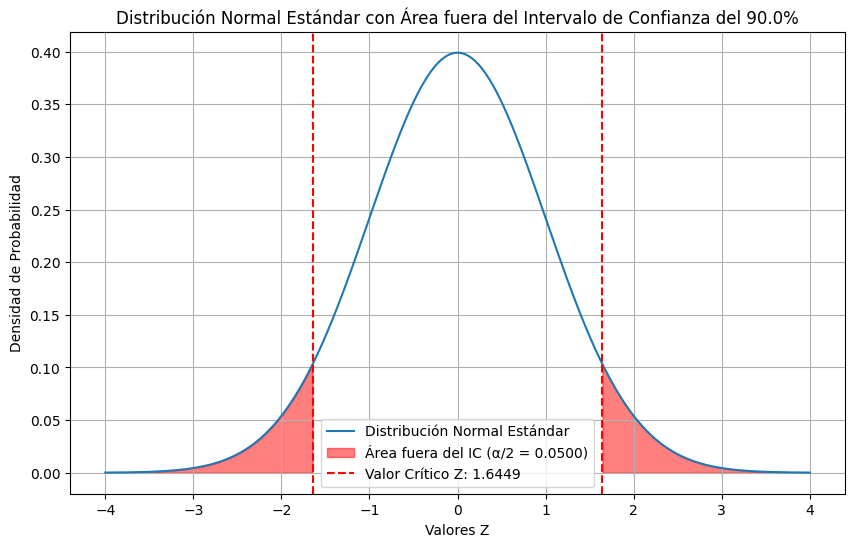

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 90.0%.
El intervalo de confianza del 90.0% para la proporción poblacional se encuentra entre los valores Z críticos de ±1.6449.


In [ ]:
# Ejercicio 12. Cálculo del tamaño de muestra para estimar una proporción poblacional.

# Utilizamos la fórmula para el tamaño de muestra para proporciones, considerando que tenemos
# una estimación previa de la proporción (p).

# Datos proporcionados:
margen_error_ej12 = 0.04  # Margen de error deseado (4 %)
nivel_confianza_ej12 = 0.90  # Nivel de confianza deseado
p_hat_ej12 = 0.07  # Estimación previa de la proporción (7 %)
q_hat_ej12 = 1 - p_hat_ej12 # Complemento de la proporción estimada

# Nivel de significancia (alpha)
alfa_ej12 = 1 - nivel_confianza_ej12
alfa_dos_colas_ej12 = alfa_ej12 / 2

# 1. Determinar el valor crítico Z para el nivel de confianza.
# Para un nivel de confianza del 90%, necesitamos el valor Z tal que el 5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej12 = 0.05).
# Usamos scipy.stats.norm.ppf()
from scipy.stats import norm

valor_critico_z_ej12 = norm.ppf(1 - alfa_dos_colas_ej12) # Valor crítico positivo
valor_critico_z_negativo_ej12 = norm.ppf(alfa_dos_colas_ej12) # Valor crítico negativo


print(f"--- Ejercicio 12 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej12}")
print(f"Margen de Error deseado: {margen_error_ej12}")
print(f"Estimación previa de la proporción (p_hat): {p_hat_ej12}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej12*100}%: {valor_critico_z_ej12:.4f}")

# 2. Calcular el tamaño de muestra necesario.
# Fórmula del tamaño de muestra con p_hat:
# n = (Z^2 * p_hat * q_hat) / E^2
n_con_p_hat_ej12 = (valor_critico_z_ej12**2 * p_hat_ej12 * q_hat_ej12) / (margen_error_ej12**2)

# El tamaño de muestra debe ser un número entero, por lo que redondeamos hacia arriba.
import math
n_con_p_hat_redondeado_ej12 = math.ceil(n_con_p_hat_ej12)

print(f"\nTamaño de muestra calculado: {n_con_p_hat_ej12:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_con_p_hat_redondeado_ej12}")

# Interpretación: Para estimar la proporción de devoluciones con un 90% de confianza y un margen de error del 4%,
# utilizando la estimación previa del 7%, se necesitan al menos {n_con_p_hat_redondeado_ej12} pedidos en la muestra.


# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej12 = np.linspace(-4, 4, 1000)
y_z_ej12 = norm.pdf(x_z_ej12, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej12, y_z_ej12, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej12 = x_z_ej12[x_z_ej12 > valor_critico_z_ej12]
y_fuera_ic_derecha_ej12 = norm.pdf(x_fuera_ic_derecha_ej12, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej12, y_fuera_ic_derecha_ej12, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej12:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej12 = x_z_ej12[x_z_ej12 < valor_critico_z_negativo_ej12]
y_fuera_ic_izquierda_ej12 = norm.pdf(x_fuera_ic_izquierda_ej12, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej12, y_fuera_ic_izquierda_ej12, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej12, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej12:.4f}')
plt.axvline(valor_critico_z_negativo_ej12, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej12*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej12*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej12*100}% para la proporción poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej12:.4f}.")

# Ejercicio 13
Un partido político quiere determinar la proporción de votantes que apoyan a su candidato. En una encuesta previa, el 42 % mostró apoyo. ¿Qué tamaño de muestra se necesita para estimar esta proporción con un margen de error del 2 % y un nivel de confianza del 99 %? Si no se usa la encuesta previa, ¿cómo cambia el resultado?

--- Ejercicio 13 ---
Nivel de Confianza: 0.99
Margen de Error deseado: 0.02
Valor Crítico Z para un intervalo de confianza del 99.0%: 2.5758

Caso 1: Con estimación previa (p_hat = 0.42)
Tamaño de muestra calculado: 4040.6520
Tamaño de muestra requerido (redondeado hacia arriba): 4041

Caso 2: Sin estimación previa (usando p = 0.5)
Tamaño de muestra calculado: 4146.8104
Tamaño de muestra requerido (redondeado hacia arriba): 4147


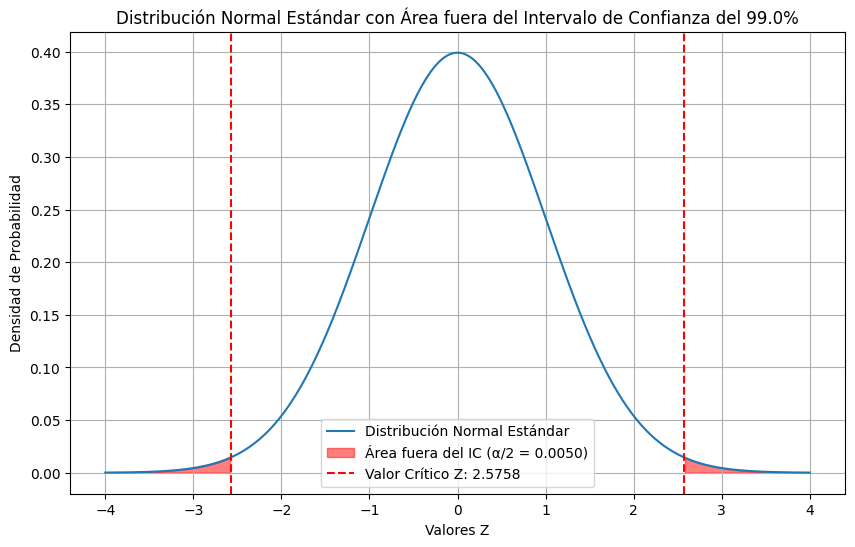

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 99.0%.
El intervalo de confianza del 99.0% para la proporción poblacional se encuentra entre los valores Z críticos de ±2.5758.


In [ ]:
# Ejercicio 13. Cálculo del tamaño de muestra para estimar una proporción poblacional.

# Utilizamos la fórmula para el tamaño de muestra para proporciones, considerando si hay
# o no una estimación previa de la proporción (p).

# Datos proporcionados:
margen_error_ej13 = 0.02  # Margen de error deseado (2 %)
nivel_confianza_ej13 = 0.99  # Nivel de confianza deseado

# Nivel de significancia (alpha)
alfa_ej13 = 1 - nivel_confianza_ej13
alfa_dos_colas_ej13 = alfa_ej13 / 2

# 1. Determinar el valor crítico Z para el nivel de confianza.
# Para un nivel de confianza del 99%, necesitamos el valor Z tal que el 0.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej13 = 0.005).
# Usamos scipy.stats.norm.ppf()
from scipy.stats import norm

valor_critico_z_ej13 = norm.ppf(1 - alfa_dos_colas_ej13) # Valor crítico positivo
valor_critico_z_negativo_ej13 = norm.ppf(alfa_dos_colas_ej13) # Valor crítico negativo


print(f"--- Ejercicio 13 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej13}")
print(f"Margen de Error deseado: {margen_error_ej13}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej13*100}%: {valor_critico_z_ej13:.4f}")

# Caso 1: Se tiene una estimación previa de la proporción (p).
# En este caso, p_hat (la proporción estimada) es 0.42 (42 %).
p_hat_ej13 = 0.42
q_hat_ej13 = 1 - p_hat_ej13

# Fórmula del tamaño de muestra con p_hat:
# n = (Z^2 * p_hat * q_hat) / E^2
n_con_p_hat_ej13 = (valor_critico_z_ej13**2 * p_hat_ej13 * q_hat_ej13) / (margen_error_ej13**2)

# El tamaño de muestra debe ser un número entero, por lo que redondeamos hacia arriba.
import math
n_con_p_hat_redondeado_ej13 = math.ceil(n_con_p_hat_ej13)

print(f"\nCaso 1: Con estimación previa (p_hat = {p_hat_ej13})")
print(f"Tamaño de muestra calculado: {n_con_p_hat_ej13:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_con_p_hat_redondeado_ej13}")

# Interpretación: Para estimar la proporción de votantes con un 99% de confianza y un margen de error del 2%,
# utilizando la estimación previa del 42%, se necesitan al menos {n_con_p_hat_redondeado_ej13} votantes en la muestra.


# Caso 2: No se tiene una estimación previa de la proporción.
# Cuando no hay una estimación previa, usamos p = 0.5 (y q = 0.5) para maximizar el producto p*q,
# lo que resulta en el tamaño de muestra más grande y conservador.
p_sin_p_hat_ej13 = 0.5
q_sin_p_hat_ej13 = 0.5

# Fórmula del tamaño de muestra sin p_hat:
# n = (Z^2 * 0.25) / E^2  (ya que p*q = 0.5 * 0.5 = 0.25)
n_sin_p_hat_ej13 = (valor_critico_z_ej13**2 * p_sin_p_hat_ej13 * q_sin_p_hat_ej13) / (margen_error_ej13**2)

# Redondeamos hacia arriba.
n_sin_p_hat_redondeado_ej13 = math.ceil(n_sin_p_hat_ej13)

print(f"\nCaso 2: Sin estimación previa (usando p = 0.5)")
print(f"Tamaño de muestra calculado: {n_sin_p_hat_ej13:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_sin_p_hat_redondeado_ej13}")

# Interpretación: Si no se tiene una estimación previa, para lograr el mismo nivel de confianza y margen de error,
# se necesitan al menos {n_sin_p_hat_redondeado_ej13} votantes en la muestra. Este es el tamaño de muestra
# más grande posible para estas condiciones.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej13 = np.linspace(-4, 4, 1000)
y_z_ej13 = norm.pdf(x_z_ej13, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej13, y_z_ej13, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej13 = x_z_ej13[x_z_ej13 > valor_critico_z_ej13]
y_fuera_ic_derecha_ej13 = norm.pdf(x_fuera_ic_derecha_ej13, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej13, y_fuera_ic_derecha_ej13, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej13:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej13 = x_z_ej13[x_z_ej13 < valor_critico_z_negativo_ej13]
y_fuera_ic_izquierda_ej13 = norm.pdf(x_fuera_ic_izquierda_ej13, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej13, y_fuera_ic_izquierda_ej13, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej13, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej13:.4f}')
plt.axvline(valor_critico_z_negativo_ej13, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej13*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej13*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej13*100}% para la proporción poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej13:.4f}.")

# Ejercicio 14
Un distrito escolar necesita medir el apoyo a una nueva política. En una encuesta informal, el 56 % de los padres estuvo de acuerdo. Calcule el tamaño de muestra requerido para estimar la proporción de apoyo con un margen de error del 5 % y confianza del 95 %. Además, justifique por qué se usa p = 0,5 si no hay datos preliminares.

--- Ejercicio 14 ---
Nivel de Confianza: 0.95
Margen de Error deseado: 0.05
Valor Crítico Z para un intervalo de confianza del 95.0%: 1.9600

Caso 1: Con estimación previa (p_hat = 0.56)
Tamaño de muestra calculado: 378.6142
Tamaño de muestra requerido (redondeado hacia arriba): 379

Caso 2: Sin estimación previa (usando p = 0.5)
Tamaño de muestra calculado: 384.1459
Tamaño de muestra requerido (redondeado hacia arriba): 385

Justificación del uso de p = 0.5 sin datos preliminares:
La fórmula para el tamaño de muestra para una proporción es n = (Z^2 * p * q) / E^2.
El producto p * q (donde q = 1 - p) alcanza su valor máximo cuando p = 0.5.
Si graficamos p*(1-p) para valores de p entre 0 y 1, vemos que el pico está en p = 0.5:
0.1 * 0.9 = 0.09
0.3 * 0.7 = 0.21
0.5 * 0.5 = 0.25  <- Máximo valor
0.7 * 0.3 = 0.21
0.9 * 0.1 = 0.09
Al usar p = 0.5, maximizamos el numerador de la fórmula del tamaño de muestra.
Esto nos da el tamaño de muestra más grande y, por lo tanto, más conservador,
garan

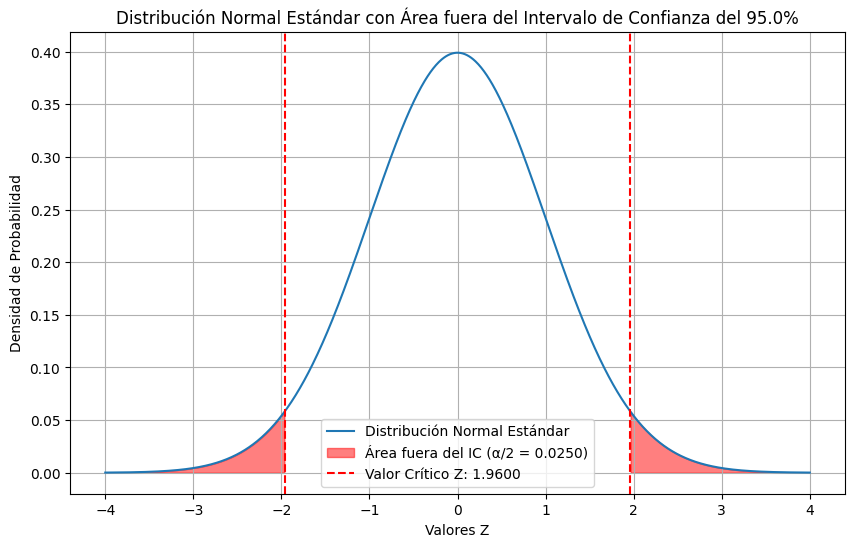

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza del 95.0% para la proporción poblacional se encuentra entre los valores Z críticos de ±1.9600.


In [ ]:
# Ejercicio 14. Cálculo del tamaño de muestra para estimar una proporción poblacional.

# Utilizamos la fórmula para el tamaño de muestra para proporciones, considerando si hay
# o no una estimación previa de la proporción (p).

# Datos proporcionados:
margen_error_ej14 = 0.05  # Margen de error deseado (5 %)
nivel_confianza_ej14 = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha)
alfa_ej14 = 1 - nivel_confianza_ej14
alfa_dos_colas_ej14 = alfa_ej14 / 2

# 1. Determinar el valor crítico Z para el nivel de confianza.
# Para un nivel de confianza del 95%, necesitamos el valor Z tal que el 2.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej14 = 0.025).
# Usamos scipy.stats.norm.ppf()
from scipy.stats import norm

valor_critico_z_ej14 = norm.ppf(1 - alfa_dos_colas_ej14) # Valor crítico positivo
valor_critico_z_negativo_ej14 = norm.ppf(alfa_dos_colas_ej14) # Valor crítico negativo


print(f"--- Ejercicio 14 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej14}")
print(f"Margen de Error deseado: {margen_error_ej14}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej14*100}%: {valor_critico_z_ej14:.4f}")

# Caso 1: Se tiene una estimación previa de la proporción (p).
# En este caso, p_hat (la proporción estimada) es 0.56 (56 %).
p_hat_ej14 = 0.56
q_hat_ej14 = 1 - p_hat_ej14

# Fórmula del tamaño de muestra con p_hat:
# n = (Z^2 * p_hat * q_hat) / E^2
n_con_p_hat_ej14 = (valor_critico_z_ej14**2 * p_hat_ej14 * q_hat_ej14) / (margen_error_ej14**2)

# El tamaño de muestra debe ser un número entero, por lo que redondeamos hacia arriba.
import math
n_con_p_hat_redondeado_ej14 = math.ceil(n_con_p_hat_ej14)

print(f"\nCaso 1: Con estimación previa (p_hat = {p_hat_ej14})")
print(f"Tamaño de muestra calculado: {n_con_p_hat_ej14:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_con_p_hat_redondeado_ej14}")

# Interpretación: Para estimar la proporción de apoyo con un 95% de confianza y un margen de error del 5%,
# utilizando la estimación previa del 56%, se necesitan al menos {n_con_p_hat_redondeado_ej14} padres en la muestra.


# Caso 2: No se tiene una estimación previa de la proporción.
# Cuando no hay una estimación previa, usamos p = 0.5 (y q = 0.5) para maximizar el producto p*q,
# lo que resulta en el tamaño de muestra más grande y conservador.
p_sin_p_hat_ej14 = 0.5
q_sin_p_hat_ej14 = 0.5

# Fórmula del tamaño de muestra sin p_hat:
# n = (Z^2 * 0.25) / E^2  (ya que p*q = 0.5 * 0.5 = 0.25)
n_sin_p_hat_ej14 = (valor_critico_z_ej14**2 * p_sin_p_hat_ej14 * q_sin_p_hat_ej14) / (margen_error_ej14**2)

# Redondeamos hacia arriba.
n_sin_p_hat_redondeado_ej14 = math.ceil(n_sin_p_hat_ej14)

print(f"\nCaso 2: Sin estimación previa (usando p = 0.5)")
print(f"Tamaño de muestra calculado: {n_sin_p_hat_ej14:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_sin_p_hat_redondeado_ej14}")

# Justificación del uso de p = 0.5 cuando no hay datos preliminares:
print("\nJustificación del uso de p = 0.5 sin datos preliminares:")
print("La fórmula para el tamaño de muestra para una proporción es n = (Z^2 * p * q) / E^2.")
print("El producto p * q (donde q = 1 - p) alcanza su valor máximo cuando p = 0.5.")
print("Si graficamos p*(1-p) para valores de p entre 0 y 1, vemos que el pico está en p = 0.5:")
print("0.1 * 0.9 = 0.09")
print("0.3 * 0.7 = 0.21")
print("0.5 * 0.5 = 0.25  <- Máximo valor")
print("0.7 * 0.3 = 0.21")
print("0.9 * 0.1 = 0.09")
print("Al usar p = 0.5, maximizamos el numerador de la fórmula del tamaño de muestra.")
print("Esto nos da el tamaño de muestra más grande y, por lo tanto, más conservador,")
print("garantizando que el margen de error deseado se alcance o se supere,")
print("independientemente de la verdadera proporción poblacional.")


# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej14 = np.linspace(-4, 4, 1000)
y_z_ej14 = norm.pdf(x_z_ej14, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej14, y_z_ej14, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej14 = x_z_ej14[x_z_ej14 > valor_critico_z_ej14]
y_fuera_ic_derecha_ej14 = norm.pdf(x_fuera_ic_derecha_ej14, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej14, y_fuera_ic_derecha_ej14, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej14:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej14 = x_z_ej14[x_z_ej14 < valor_critico_z_negativo_ej14]
y_fuera_ic_izquierda_ej14 = norm.pdf(x_fuera_ic_izquierda_ej14, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej14, y_fuera_ic_izquierda_ej14, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej14, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej14:.4f}')
plt.axvline(valor_critico_z_negativo_ej14, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej14*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej14*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej14*100}% para la proporción poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej14:.4f}.")

# Ejercicio 15
Un hospital planea un estudio para estimar la proporción de pacientes que mejoran con un tratamiento. En una prueba preliminar, el 69 % mostró mejoría. Determine el tamaño de muestra necesario para un margen de error del 4 % y confianza del 95 %. Si se desea ser conservador (usar p = 0,5), ¿cuál sería el tamaño?

--- Ejercicio 15 ---
Nivel de Confianza: 0.95
Margen de Error deseado: 0.04
Valor Crítico Z para un intervalo de confianza del 95.0%: 1.9600

Caso 1: Con estimación previa (p_hat = 0.69)
Tamaño de muestra calculado: 513.5550
Tamaño de muestra requerido (redondeado hacia arriba): 514

Caso 2: Sin estimación previa (usando p = 0.5 - conservador)
Tamaño de muestra calculado: 600.2279
Tamaño de muestra requerido (redondeado hacia arriba): 601


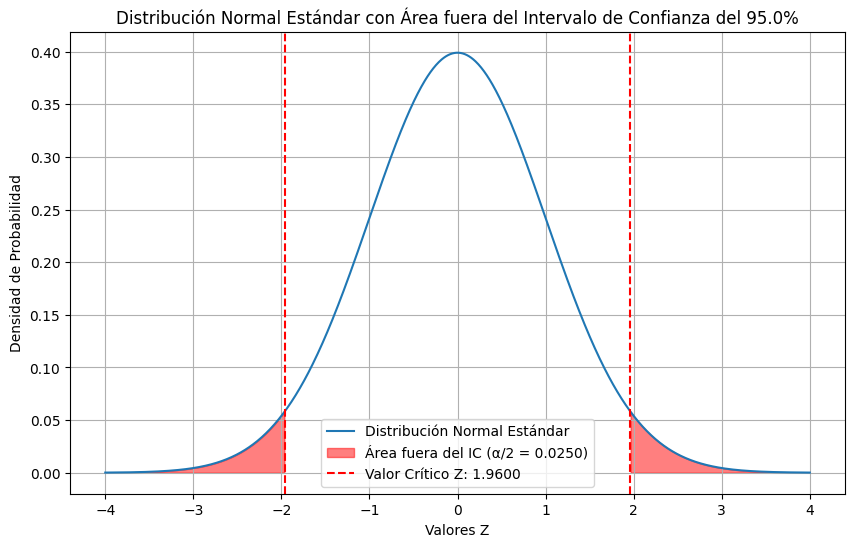

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza del 95.0% para la proporción poblacional se encuentra entre los valores Z críticos de ±1.9600.


In [ ]:
# Ejercicio 15. Cálculo del tamaño de muestra para estimar una proporción poblacional.

# Utilizamos la fórmula para el tamaño de muestra para proporciones, considerando si hay
# o no una estimación previa de la proporción (p).

# Datos proporcionados:
margen_error_ej15 = 0.04  # Margen de error deseado (4 %)
nivel_confianza_ej15 = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha)
alfa_ej15 = 1 - nivel_confianza_ej15
alfa_dos_colas_ej15 = alfa_ej15 / 2

# 1. Determinar el valor crítico Z para el nivel de confianza.
# Para un nivel de confianza del 95%, necesitamos el valor Z tal que el 2.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej15 = 0.025).
# Usamos scipy.stats.norm.ppf()
from scipy.stats import norm

valor_critico_z_ej15 = norm.ppf(1 - alfa_dos_colas_ej15) # Valor crítico positivo
valor_critico_z_negativo_ej15 = norm.ppf(alfa_dos_colas_ej15) # Valor crítico negativo


print(f"--- Ejercicio 15 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej15}")
print(f"Margen de Error deseado: {margen_error_ej15}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej15*100}%: {valor_critico_z_ej15:.4f}")

# Caso 1: Se tiene una estimación previa de la proporción (p).
# En este caso, p_hat (la proporción estimada) es 0.69 (69 %).
p_hat_ej15 = 0.69
q_hat_ej15 = 1 - p_hat_ej15

# Fórmula del tamaño de muestra con p_hat:
# n = (Z^2 * p_hat * q_hat) / E^2
n_con_p_hat_ej15 = (valor_critico_z_ej15**2 * p_hat_ej15 * q_hat_ej15) / (margen_error_ej15**2)

# El tamaño de muestra debe ser un número entero, por lo que redondeamos hacia arriba.
import math
n_con_p_hat_redondeado_ej15 = math.ceil(n_con_p_hat_ej15)

print(f"\nCaso 1: Con estimación previa (p_hat = {p_hat_ej15})")
print(f"Tamaño de muestra calculado: {n_con_p_hat_ej15:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_con_p_hat_redondeado_ej15}")

# Interpretación: Para estimar la proporción de pacientes que mejoran con un 95% de confianza
# y un margen de error del 4%, utilizando la estimación previa del 69%,
# se necesitan al menos {n_con_p_hat_redondeado_ej15} pacientes en la muestra.


# Caso 2: No se tiene una estimación previa de la proporción (conservador).
# Cuando no hay una estimación previa, usamos p = 0.5 (y q = 0.5) para maximizar el producto p*q,
# lo que resulta en el tamaño de muestra más grande y conservador.
p_sin_p_hat_ej15 = 0.5
q_sin_p_hat_ej15 = 0.5

# Fórmula del tamaño de muestra sin p_hat:
# n = (Z^2 * 0.25) / E^2  (ya que p*q = 0.5 * 0.5 = 0.25)
n_sin_p_hat_ej15 = (valor_critico_z_ej15**2 * p_sin_p_hat_ej15 * q_sin_p_hat_ej15) / (margen_error_ej15**2)

# Redondeamos hacia arriba.
n_sin_p_hat_redondeado_ej15 = math.ceil(n_sin_p_hat_ej15)

print(f"\nCaso 2: Sin estimación previa (usando p = 0.5 - conservador)")
print(f"Tamaño de muestra calculado: {n_sin_p_hat_ej15:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_sin_p_hat_redondeado_ej15}")

# Interpretación: Si se desea ser conservador y no se tiene una estimación previa, para lograr
# el mismo nivel de confianza y margen de error, se necesitan al menos
# {n_sin_p_hat_redondeado_ej15} pacientes en la muestra. Este es el tamaño de muestra
# más grande posible para estas condiciones.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej15 = np.linspace(-4, 4, 1000)
y_z_ej15 = norm.pdf(x_z_ej15, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej15, y_z_ej15, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej15 = x_z_ej15[x_z_ej15 > valor_critico_z_ej15]
y_fuera_ic_derecha_ej15 = norm.pdf(x_fuera_ic_derecha_ej15, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej15, y_fuera_ic_derecha_ej15, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej15:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej15 = x_z_ej15[x_z_ej15 < valor_critico_z_negativo_ej15]
y_fuera_ic_izquierda_ej15 = norm.pdf(x_fuera_ic_izquierda_ej15, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej15, y_fuera_ic_izquierda_ej15, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej15, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej15:.4f}')
plt.axvline(valor_critico_z_negativo_ej15, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej15*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej15*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej15*100}% para la proporción poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej15:.4f}.")

# Ejercicio 16
Un hospital quiere estimar el tiempo promedio (en minutos) que los pacientes esperan en urgencias. Por estudios previos, se sabe que la desviación estándar poblacional es σ = 8 minutos. Calcule el tamaño de muestra necesario para estimar la media poblacional con un margen de error de 2 minutos y un nivel de confianza del 95 %.

--- Ejercicio 16 ---
Nivel de Confianza: 0.95
Margen de Error deseado: 2
Desviación Estándar Poblacional (sigma): 8
Valor Crítico Z para un intervalo de confianza del 95.0%: 1.9600

Tamaño de muestra calculado: 61.4633
Tamaño de muestra requerido (redondeado hacia arriba): 62


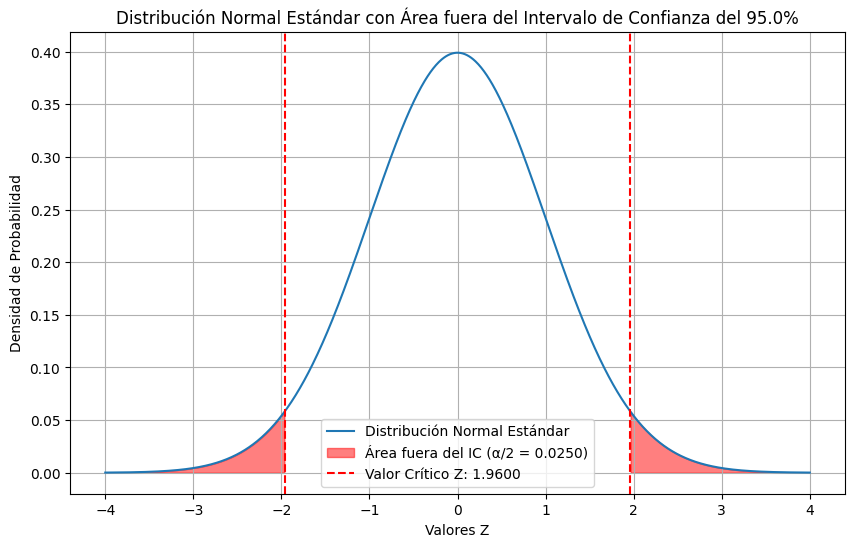

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza del 95.0% para la media poblacional se encuentra entre los valores Z críticos de ±1.9600.


In [ ]:
# Ejercicio 16. Cálculo del tamaño de muestra para estimar una media poblacional (sigma conocida).

# Utilizamos la fórmula para el tamaño de muestra para medias cuando se conoce la desviación estándar poblacional.

# Datos proporcionados:
desviacion_estandar_poblacional_ej16 = 8  # Desviación estándar poblacional en minutos
margen_error_ej16 = 2  # Margen de error deseado en minutos
nivel_confianza_ej16 = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha)
alfa_ej16 = 1 - nivel_confianza_ej16
alfa_dos_colas_ej16 = alfa_ej16 / 2

# 1. Determinar el valor crítico Z para el nivel de confianza.
# Para un nivel de confianza del 95%, necesitamos el valor Z tal que el 2.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej16 = 0.025).
# Usamos scipy.stats.norm.ppf()
from scipy.stats import norm

valor_critico_z_ej16 = norm.ppf(1 - alfa_dos_colas_ej16) # Valor crítico positivo
valor_critico_z_negativo_ej16 = norm.ppf(alfa_dos_colas_ej16) # Valor crítico negativo


print(f"--- Ejercicio 16 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej16}")
print(f"Margen de Error deseado: {margen_error_ej16}")
print(f"Desviación Estándar Poblacional (sigma): {desviacion_estandar_poblacional_ej16}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej16*100}%: {valor_critico_z_ej16:.4f}")

# 2. Calcular el tamaño de muestra necesario.
# Fórmula del tamaño de muestra para medias (sigma conocida):
# n = (Z^2 * sigma^2) / E^2
n_ej16 = (valor_critico_z_ej16**2 * desviacion_estandar_poblacional_ej16**2) / (margen_error_ej16**2)

# El tamaño de muestra debe ser un número entero, por lo que redondeamos hacia arriba.
import math
n_redondeado_ej16 = math.ceil(n_ej16)

print(f"\nTamaño de muestra calculado: {n_ej16:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_redondeado_ej16}")

# Interpretación: Para estimar el tiempo promedio de espera en urgencias con un 95% de confianza
# y un margen de error de 2 minutos, se necesitan al menos {n_redondeado_ej16} pacientes en la muestra.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej16 = np.linspace(-4, 4, 1000)
y_z_ej16 = norm.pdf(x_z_ej16, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej16, y_z_ej16, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej16 = x_z_ej16[x_z_ej16 > valor_critico_z_ej16]
y_fuera_ic_derecha_ej16 = norm.pdf(x_fuera_ic_derecha_ej16, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej16, y_fuera_ic_derecha_ej16, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej16:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej16 = x_z_ej16[x_z_ej16 < valor_critico_z_negativo_ej16]
y_fuera_ic_izquierda_ej16 = norm.pdf(x_fuera_ic_izquierda_ej16, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej16, y_fuera_ic_izquierda_ej16, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej16, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej16:.4f}')
plt.axvline(valor_critico_z_negativo_ej16, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej16*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej16*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej16*100}% para la media poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej16:.4f}.")

# Ejercicio 17
Una compañía eléctrica analiza el consumo mensual promedio (en kWh) de sus clientes residenciales. La desviación estándar histórica es σ = 50 kWh. Determine el tamaño de muestra requerido para un margen de error de 10 kWh y un nivel de confianza del 90 %.

--- Ejercicio 17 ---
Nivel de Confianza: 0.9
Margen de Error deseado: 10
Desviación Estándar Poblacional (sigma): 50
Valor Crítico Z para un intervalo de confianza del 90.0%: 1.6449

Tamaño de muestra calculado: 67.6386
Tamaño de muestra requerido (redondeado hacia arriba): 68


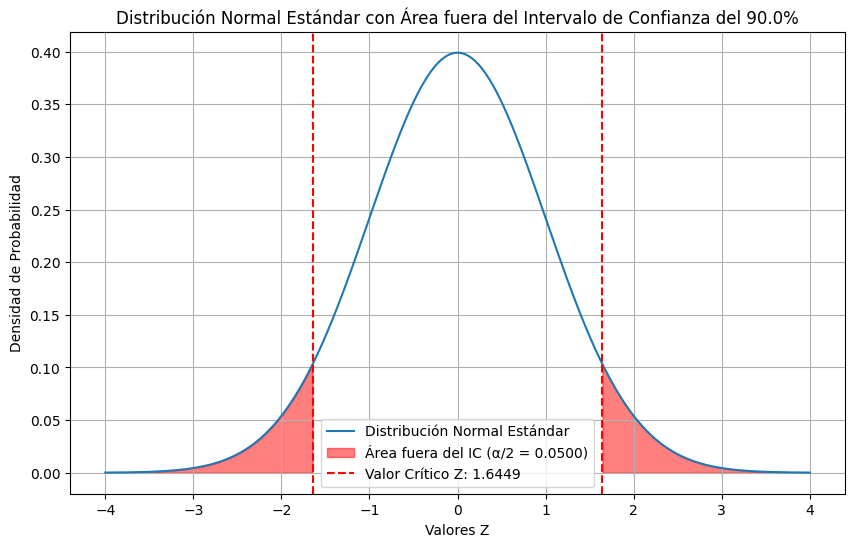

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 90.0%.
El intervalo de confianza del 90.0% para la media poblacional se encuentra entre los valores Z críticos de ±1.6449.


In [ ]:
# Ejercicio 17. Cálculo del tamaño de muestra para estimar una media poblacional (sigma conocida).

# Utilizamos la fórmula para el tamaño de muestra para medias cuando se conoce la desviación estándar poblacional.

# Datos proporcionados:
desviacion_estandar_poblacional_ej17 = 50  # Desviación estándar poblacional en kWh
margen_error_ej17 = 10  # Margen de error deseado en kWh
nivel_confianza_ej17 = 0.90  # Nivel de confianza deseado

# Nivel de significancia (alpha)
alfa_ej17 = 1 - nivel_confianza_ej17
alfa_dos_colas_ej17 = alfa_ej17 / 2

# 1. Determinar el valor crítico Z para el nivel de confianza.
# Para un nivel de confianza del 90%, necesitamos el valor Z tal que el 5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej17 = 0.05).
# Usamos scipy.stats.norm.ppf()
from scipy.stats import norm

valor_critico_z_ej17 = norm.ppf(1 - alfa_dos_colas_ej17) # Valor crítico positivo
valor_critico_z_negativo_ej17 = norm.ppf(alfa_dos_colas_ej17) # Valor crítico negativo


print(f"--- Ejercicio 17 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej17}")
print(f"Margen de Error deseado: {margen_error_ej17}")
print(f"Desviación Estándar Poblacional (sigma): {desviacion_estandar_poblacional_ej17}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej17*100}%: {valor_critico_z_ej17:.4f}")

# 2. Calcular el tamaño de muestra necesario.
# Fórmula del tamaño de muestra para medias (sigma conocida):
# n = (Z^2 * sigma^2) / E^2
n_ej17 = (valor_critico_z_ej17**2 * desviacion_estandar_poblacional_ej17**2) / (margen_error_ej17**2)

# El tamaño de muestra debe ser un número entero, por lo que redondeamos hacia arriba.
import math
n_redondeado_ej17 = math.ceil(n_ej17)

print(f"\nTamaño de muestra calculado: {n_ej17:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_redondeado_ej17}")

# Interpretación: Para estimar el consumo mensual promedio con un 90% de confianza
# y un margen de error de 10 kWh, se necesitan al menos {n_redondeado_ej17} clientes residenciales en la muestra.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej17 = np.linspace(-4, 4, 1000)
y_z_ej17 = norm.pdf(x_z_ej17, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej17, y_z_ej17, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej17 = x_z_ej17[x_z_ej17 > valor_critico_z_ej17]
y_fuera_ic_derecha_ej17 = norm.pdf(x_fuera_ic_derecha_ej17, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej17, y_fuera_ic_derecha_ej17, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej17:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej17 = x_z_ej17[x_z_ej17 < valor_critico_z_negativo_ej17]
y_fuera_ic_izquierda_ej17 = norm.pdf(x_fuera_ic_izquierda_ej17, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej17, y_fuera_ic_izquierda_ej17, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej17, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej17:.4f}')
plt.axvline(valor_critico_z_negativo_ej17, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej17*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej17*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej17*100}% para la media poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej17:.4f}.")

# Ejercicio 18
Una empresa de logística necesita estimar el peso promedio (en kg) de los paquetes que transporta. Según datos anteriores, σ = 1,2 kg. ¿Qué tamaño de muestra se necesita para un margen de error de 0.5 kg y un nivel de confianza del 99 %?

--- Ejercicio 18 ---
Nivel de Confianza: 0.99
Margen de Error deseado: 0.5
Desviación Estándar Poblacional (sigma): 1.2
Valor Crítico Z para un intervalo de confianza del 99.0%: 2.5758

Tamaño de muestra calculado: 38.2170
Tamaño de muestra requerido (redondeado hacia arriba): 39


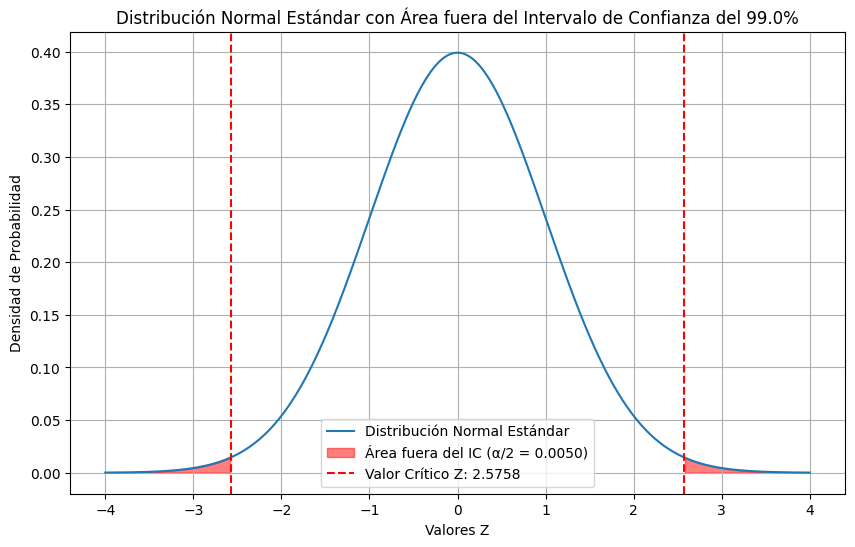

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 99.0%.
El intervalo de confianza del 99.0% para la media poblacional se encuentra entre los valores Z críticos de ±2.5758.


In [ ]:
# Ejercicio 18. Cálculo del tamaño de muestra para estimar una media poblacional (sigma conocida).

# Utilizamos la fórmula para el tamaño de muestra para medias cuando se conoce la desviación estándar poblacional.

# Datos proporcionados:
desviacion_estandar_poblacional_ej18 = 1.2  # Desviación estándar poblacional en kg
margen_error_ej18 = 0.5  # Margen de error deseado en kg
nivel_confianza_ej18 = 0.99  # Nivel de confianza deseado

# Nivel de significancia (alpha)
alfa_ej18 = 1 - nivel_confianza_ej18
alfa_dos_colas_ej18 = alfa_ej18 / 2

# 1. Determinar el valor crítico Z para el nivel de confianza.
# Para un nivel de confianza del 99%, necesitamos el valor Z tal que el 0.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej18 = 0.005).
# Usamos scipy.stats.norm.ppf()
from scipy.stats import norm

valor_critico_z_ej18 = norm.ppf(1 - alfa_dos_colas_ej18) # Valor crítico positivo
valor_critico_z_negativo_ej18 = norm.ppf(alfa_dos_colas_ej18) # Valor crítico negativo


print(f"--- Ejercicio 18 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej18}")
print(f"Margen de Error deseado: {margen_error_ej18}")
print(f"Desviación Estándar Poblacional (sigma): {desviacion_estandar_poblacional_ej18}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej18*100}%: {valor_critico_z_ej18:.4f}")

# 2. Calcular el tamaño de muestra necesario.
# Fórmula del tamaño de muestra para medias (sigma conocida):
# n = (Z^2 * sigma^2) / E^2
n_ej18 = (valor_critico_z_ej18**2 * desviacion_estandar_poblacional_ej18**2) / (margen_error_ej18**2)

# El tamaño de muestra debe ser un número entero, por lo que redondeamos hacia arriba.
import math
n_redondeado_ej18 = math.ceil(n_ej18)

print(f"\nTamaño de muestra calculado: {n_ej18:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_redondeado_ej18}")

# Interpretación: Para estimar el peso promedio de los paquetes con un 99% de confianza
# y un margen de error de 0.5 kg, se necesitan al menos {n_redondeado_ej18} paquetes en la muestra.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej18 = np.linspace(-4, 4, 1000)
y_z_ej18 = norm.pdf(x_z_ej18, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej18, y_z_ej18, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej18 = x_z_ej18[x_z_ej18 > valor_critico_z_ej18]
y_fuera_ic_derecha_ej18 = norm.pdf(x_fuera_ic_derecha_ej18, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej18, y_fuera_ic_derecha_ej18, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej18:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej18 = x_z_ej18[x_z_ej18 < valor_critico_z_negativo_ej18]
y_fuera_ic_izquierda_ej18 = norm.pdf(x_fuera_ic_izquierda_ej18, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej18, y_fuera_ic_izquierda_ej18, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej18, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej18:.4f}')
plt.axvline(valor_critico_z_negativo_ej18, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej18*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej18*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej18*100}% para la media poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej18:.4f}.")

# Ejercicio 19
Un consultor quiere estimar la duración promedio (en minutos) de las reuniones en una empresa. La desviación estándar registrada es σ = 5 minutos. Calcule el tamaño de muestra para un margen de error de 1.5 minutos y un nivel de confianza del 95 %.

--- Ejercicio 19 ---
Nivel de Confianza: 0.95
Margen de Error deseado: 1.5
Desviación Estándar Poblacional (sigma): 5
Valor Crítico Z para un intervalo de confianza del 95.0%: 1.9600

Tamaño de muestra calculado: 42.6829
Tamaño de muestra requerido (redondeado hacia arriba): 43


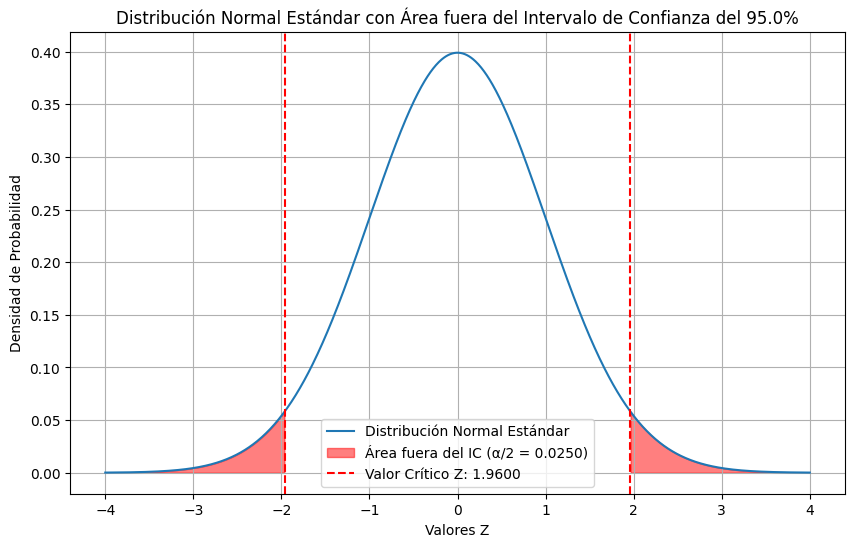

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 95.0%.
El intervalo de confianza del 95.0% para la media poblacional se encuentra entre los valores Z críticos de ±1.9600.


In [ ]:
# Ejercicio 19. Cálculo del tamaño de muestra para estimar una media poblacional (sigma conocida).

# Utilizamos la fórmula para el tamaño de muestra para medias cuando se conoce la desviación estándar poblacional.

# Datos proporcionados:
desviacion_estandar_poblacional_ej19 = 5  # Desviación estándar poblacional en minutos
margen_error_ej19 = 1.5  # Margen de error deseado en minutos
nivel_confianza_ej19 = 0.95  # Nivel de confianza deseado

# Nivel de significancia (alpha)
alfa_ej19 = 1 - nivel_confianza_ej19
alfa_dos_colas_ej19 = alfa_ej19 / 2

# 1. Determinar el valor crítico Z para el nivel de confianza.
# Para un nivel de confianza del 95%, necesitamos el valor Z tal que el 2.5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej19 = 0.025).
# Usamos scipy.stats.norm.ppf()
from scipy.stats import norm

valor_critico_z_ej19 = norm.ppf(1 - alfa_dos_colas_ej19) # Valor crítico positivo
valor_critico_z_negativo_ej19 = norm.ppf(alfa_dos_colas_ej19) # Valor crítico negativo


print(f"--- Ejercicio 19 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej19}")
print(f"Margen de Error deseado: {margen_error_ej19}")
print(f"Desviación Estándar Poblacional (sigma): {desviacion_estandar_poblacional_ej19}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej19*100}%: {valor_critico_z_ej19:.4f}")

# 2. Calcular el tamaño de muestra necesario.
# Fórmula del tamaño de muestra para medias (sigma conocida):
# n = (Z^2 * sigma^2) / E^2
n_ej19 = (valor_critico_z_ej19**2 * desviacion_estandar_poblacional_ej19**2) / (margen_error_ej19**2)

# El tamaño de muestra debe ser un número entero, por lo que redondeamos hacia arriba.
import math
n_redondeado_ej19 = math.ceil(n_ej19)

print(f"\nTamaño de muestra calculado: {n_ej19:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_redondeado_ej19}")

# Interpretación: Para estimar la duración promedio de las reuniones con un 95% de confianza
# y un margen de error de 1.5 minutos, se necesitan al menos {n_redondeado_ej19} reuniones en la muestra.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej19 = np.linspace(-4, 4, 1000)
y_z_ej19 = norm.pdf(x_z_ej19, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej19, y_z_ej19, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej19 = x_z_ej19[x_z_ej19 > valor_critico_z_ej19]
y_fuera_ic_derecha_ej19 = norm.pdf(x_fuera_ic_derecha_ej19, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej19, y_fuera_ic_derecha_ej19, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej19:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej19 = x_z_ej19[x_z_ej19 < valor_critico_z_negativo_ej19]
y_fuera_ic_izquierda_ej19 = norm.pdf(x_fuera_ic_izquierda_ej19, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej19, y_fuera_ic_izquierda_ej19, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej19, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej19:.4f}')
plt.axvline(valor_critico_z_negativo_ej19, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej19*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej19*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej19*100}% para la media poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej19:.4f}.")

# Ejercicio 20
El ministerio de educación estudia el puntaje promedio (escala de 0 a 100) de un examen estandarizado. La desviación estándar histórica es σ = 12. Determine el tamaño de muestra necesario para un margen de error de 3 puntos y un nivel de confianza del 90 %.

--- Ejercicio 20 ---
Nivel de Confianza: 0.9
Margen de Error deseado: 3
Desviación Estándar Poblacional (sigma): 12
Valor Crítico Z para un intervalo de confianza del 90.0%: 1.6449

Tamaño de muestra calculado: 43.2887
Tamaño de muestra requerido (redondeado hacia arriba): 44


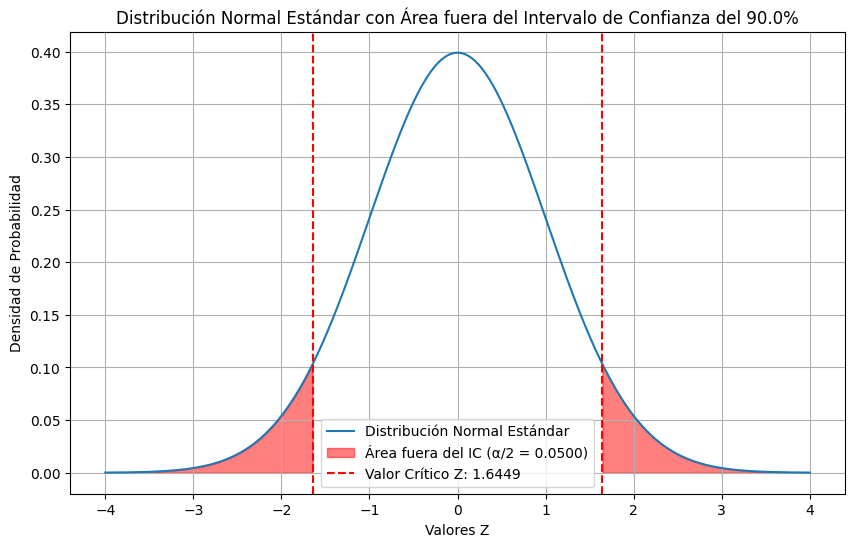

Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del 90.0%.
El intervalo de confianza del 90.0% para la media poblacional se encuentra entre los valores Z críticos de ±1.6449.


In [ ]:
# Ejercicio 20. Cálculo del tamaño de muestra para estimar una media poblacional (sigma conocida).

# Utilizamos la fórmula para el tamaño de muestra para medias cuando se conoce la desviación estándar poblacional.

# Datos proporcionados:
desviacion_estandar_poblacional_ej20 = 12  # Desviación estándar poblacional en puntos
margen_error_ej20 = 3  # Margen de error deseado en puntos
nivel_confianza_ej20 = 0.90  # Nivel de confianza deseado

# Nivel de significancia (alpha)
alfa_ej20 = 1 - nivel_confianza_ej20
alfa_dos_colas_ej20 = alfa_ej20 / 2

# 1. Determinar el valor crítico Z para el nivel de confianza.
# Para un nivel de confianza del 90%, necesitamos el valor Z tal que el 5% del área
# esté en cada cola de la distribución normal estándar (alfa_dos_colas_ej20 = 0.05).
# Usamos scipy.stats.norm.ppf()
from scipy.stats import norm

valor_critico_z_ej20 = norm.ppf(1 - alfa_dos_colas_ej20) # Valor crítico positivo
valor_critico_z_negativo_ej20 = norm.ppf(alfa_dos_colas_ej20) # Valor crítico negativo


print(f"--- Ejercicio 20 ---")
print(f"Nivel de Confianza: {nivel_confianza_ej20}")
print(f"Margen de Error deseado: {margen_error_ej20}")
print(f"Desviación Estándar Poblacional (sigma): {desviacion_estandar_poblacional_ej20}")
print(f"Valor Crítico Z para un intervalo de confianza del {nivel_confianza_ej20*100}%: {valor_critico_z_ej20:.4f}")

# 2. Calcular el tamaño de muestra necesario.
# Fórmula del tamaño de muestra para medias (sigma conocida):
# n = (Z^2 * sigma^2) / E^2
n_ej20 = (valor_critico_z_ej20**2 * desviacion_estandar_poblacional_ej20**2) / (margen_error_ej20**2)

# El tamaño de muestra debe ser un número entero, por lo que redondeamos hacia arriba.
import math
n_redondeado_ej20 = math.ceil(n_ej20)

print(f"\nTamaño de muestra calculado: {n_ej20:.4f}")
print(f"Tamaño de muestra requerido (redondeado hacia arriba): {n_redondeado_ej20}")

# Interpretación: Para estimar el puntaje promedio del examen estandarizado con un 90% de confianza
# y un margen de error de 3 puntos, se necesitan al menos {n_redondeado_ej20} estudiantes en la muestra.

# Graficar la distribución Z y la región fuera del intervalo de confianza
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej20 = np.linspace(-4, 4, 1000)
y_z_ej20 = norm.pdf(x_z_ej20, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej20, y_z_ej20, label='Distribución Normal Estándar')

# Sombrear la región fuera del intervalo de confianza (análoga a la región de rechazo)
# Usamos los valores críticos Z positivo y negativo

# Rellenar la cola derecha (valores Z mayores que el crítico positivo)
x_fuera_ic_derecha_ej20 = x_z_ej20[x_z_ej20 > valor_critico_z_ej20]
y_fuera_ic_derecha_ej20 = norm.pdf(x_fuera_ic_derecha_ej20, 0, 1)
plt.fill_between(x_fuera_ic_derecha_ej20, y_fuera_ic_derecha_ej20, color='red', alpha=0.5, label=f'Área fuera del IC (α/2 = {alfa_dos_colas_ej20:.4f})')

# Rellenar la cola izquierda (valores Z menores que el crítico negativo)
x_fuera_ic_izquierda_ej20 = x_z_ej20[x_z_ej20 < valor_critico_z_negativo_ej20]
y_fuera_ic_izquierda_ej20 = norm.pdf(x_fuera_ic_izquierda_ej20, 0, 1)
plt.fill_between(x_fuera_ic_izquierda_ej20, y_fuera_ic_izquierda_ej20, color='red', alpha=0.5)


# Marcar los valores críticos en el eje x
plt.axvline(valor_critico_z_ej20, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej20:.4f}')
plt.axvline(valor_critico_z_negativo_ej20, color='red', linestyle='--')


# Configurar el gráfico
plt.title(f'Distribución Normal Estándar con Área fuera del Intervalo de Confianza del {nivel_confianza_ej20*100}%')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo corresponden a las regiones fuera del intervalo de confianza del {nivel_confianza_ej20*100}%.")
print(f"El intervalo de confianza del {nivel_confianza_ej20*100}% para la media poblacional se encuentra entre los valores Z críticos de ±{valor_critico_z_ej20:.4f}.")

# Ejercicio 21
Una empresa afirma que sus paquetes de cereal tienen un peso promedio de 500 g. Se sospecha que la máquina está descalibrada y subllenando. Se toma una muestra de 40 paquetes, obteniendo una media de 495 g. La desviación estándar poblacional es σ = 15 g. Con un nivel de significancia α = 0,05.
•       Plantee las hipótesis nula y alternativa.
•       Calcule el estadístico Z.
•       Determine la región crítica y la región de rechazo.
•       Concluya si se rechaza H0.

--- Ejercicio 21 ---
Media poblacional bajo H0 (mu0): 500 g
Tamaño de la muestra (n): 40
Media de la muestra: 495 g
Desviación estándar poblacional (sigma): 15 g
Nivel de significancia (alfa): 0.05

1. Establecimiento de Hipótesis:
Hipótesis Nula (H0): μ = 500 g
Hipótesis Alternativa (H1): μ < 500 g (Prueba de una cola a la izquierda)

2. Nivel de Significancia (α): 0.05

3. Estadístico de Prueba y Distribución:
Estadístico de Prueba: Z
Distribución Muestral: Distribución Normal Estándar

4. Regla de Decisión:
Valor Crítico Z (para α = 0.05 en la cola izquierda): -1.6449
Regla: Rechazar H0 si Z < -1.6449

5. Cálculo del Estadístico de Prueba:
Error Estándar de la Media: 2.3717
Estadístico de Prueba Z: -2.1082
P-valor: 0.0175

6. Decisión Estadística y Conclusión:
Decisión: Rechazar H0 (ya que Z = -2.1082 < Valor Crítico Z = -1.6449)
O, Rechazar H0 (ya que p-valor = 0.0175 <= α = 0.05)
Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de 0.05, para afirm

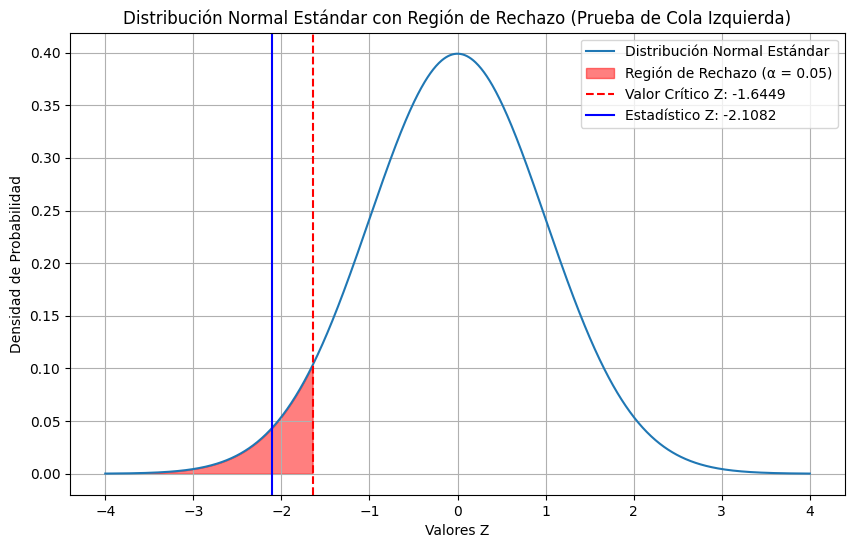


Este gráfico muestra la distribución normal estándar. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = 0.05.
Si el estadístico de prueba Z (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.
En este caso, el estadístico Z (-2.1082) se encuentra dentro de la región de rechazo.


In [ ]:
# Ejercicio 21. Prueba de hipótesis para la media poblacional (sigma conocida - Z-test).

# Procedimiento sistemático para la prueba de hipótesis:

# Datos proporcionados:
mu0 = 500  # Media poblacional bajo la hipótesis nula (peso afirmado por la empresa) en g
n = 40  # Tamaño de la muestra
media_muestra = 495  # Media de la muestra en g
sigma = 15  # Desviación estándar poblacional en g
alfa = 0.05  # Nivel de significancia

print(f"--- Ejercicio 21 ---")
print(f"Media poblacional bajo H0 (mu0): {mu0} g")
print(f"Tamaño de la muestra (n): {n}")
print(f"Media de la muestra: {media_muestra} g")
print(f"Desviación estándar poblacional (sigma): {sigma} g")
print(f"Nivel de significancia (alfa): {alfa}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la media poblacional es igual al valor afirmado.
# La hipótesis alternativa (H1) refleja la sospecha de subllenado, es decir, que la media poblacional es menor.
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): μ = {mu0} g")
print(f"Hipótesis Alternativa (H1): μ < {mu0} g (Prueba de una cola a la izquierda)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa = 0.05.
print(f"\n2. Nivel de Significancia (α): {alfa}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Como se conoce la desviación estándar poblacional (sigma) y el tamaño de la muestra (n=40) es grande (o al menos >= 30),
# utilizamos el estadístico Z y la distribución normal estándar.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: Z")
print("Distribución Muestral: Distribución Normal Estándar")

# 4. Formular la regla de decisión.
# Para una prueba de una cola a la izquierda con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba Z es menor que el valor crítico Z para alfa.
# El valor crítico Z para una cola a la izquierda se encuentra usando norm.ppf(alfa).
from scipy.stats import norm

valor_critico_z = norm.ppf(alfa)

print("\n4. Regla de Decisión:")
print(f"Valor Crítico Z (para α = {alfa} en la cola izquierda): {valor_critico_z:.4f}")
print(f"Regla: Rechazar H0 si Z < {valor_critico_z:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el error estándar de la media (sigma / sqrt(n)).
import numpy as np
error_estandar = sigma / np.sqrt(n)

# Calcular el estadístico de prueba Z.
# Fórmula: Z = (media_muestra - mu0) / error_estandar
estadistico_z = (media_muestra - mu0) / error_estandar

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Error Estándar de la Media: {error_estandar:.4f}")
print(f"Estadístico de Prueba Z: {estadistico_z:.4f}")

# Calcular el p-valor (probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado,
# asumiendo que H0 es verdadera). Para una prueba de cola izquierda, es el área a la izquierda del estadístico Z.
p_valor = norm.cdf(estadistico_z)

print(f"P-valor: {p_valor:.4f}")


# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_z < valor_critico_z:
    print(f"Decisión: Rechazar H0 (ya que Z = {estadistico_z:.4f} < Valor Crítico Z = {valor_critico_z:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor:.4f} <= α = {alfa})")
    print("Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de 0.05, para afirmar que el peso promedio de los paquetes de cereal es menor a 500 g.")
else:
    print(f"Decisión: No rechazar H0 (ya que Z = {estadistico_z:.4f} >= Valor Crítico Z = {valor_critico_z:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor:.4f} > α = {alfa})")
    print("Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de 0.05, para afirmar que el peso promedio de los paquetes de cereal es menor a 500 g.")


# Graficar la distribución normal estándar, el valor crítico Z y el estadístico de prueba Z
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z = np.linspace(-4, 4, 1000)
y_z = norm.pdf(x_z, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z, y_z, label='Distribución Normal Estándar')

# Sombrear la región de rechazo (área a la izquierda del valor crítico Z)
x_rechazo = x_z[x_z < valor_critico_z]
y_rechazo = norm.pdf(x_rechazo, 0, 1)
plt.fill_between(x_rechazo, y_rechazo, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa})')

# Marcar el valor crítico Z
plt.axvline(valor_critico_z, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z:.4f}')

# Marcar el estadístico de prueba Z
plt.axvline(estadistico_z, color='blue', linestyle='-', label=f'Estadístico Z: {estadistico_z:.4f}')


# Configurar el gráfico
plt.title('Distribución Normal Estándar con Región de Rechazo (Prueba de Cola Izquierda)')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución normal estándar. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa}.")
print(f"Si el estadístico de prueba Z (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico Z ({estadistico_z:.4f}) se encuentra {'dentro' if estadistico_z < valor_critico_z else 'fuera'} de la región de rechazo.")

# Ejercicio 22
Un fabricante de baterías asegura que su producto dura en promedio 1200 horas. Un cliente alega que la duración es menor. Una muestra de 50 baterías muestra una media de 1180 horas. Se conoce σ = 100 horas. Con un nnivel de significancia de α = 0,01.
•       Plantee las hipótesis nula y alternativa.
•       Calcule el estadístico Z.
•       Determine la región crítica y la región de rechazo.
•       Concluya si se rechaza H0.

--- Ejercicio 22 ---
Media poblacional bajo H0 (mu0): 1200 horas
Tamaño de la muestra (n): 50
Media de la muestra: 1180 horas
Desviación estándar poblacional (sigma): 100 horas
Nivel de significancia (alfa): 0.01

1. Establecimiento de Hipótesis:
Hipótesis Nula (H0): μ = 1200 horas
Hipótesis Alternativa (H1): μ < 1200 horas (Prueba de una cola a la izquierda)

2. Nivel de Significancia (α): 0.01

3. Estadístico de Prueba y Distribución:
Estadístico de Prueba: Z
Distribución Muestral: Distribución Normal Estándar

4. Regla de Decisión:
Valor Crítico Z (para α = 0.01 en la cola izquierda): -2.3263
Regla: Rechazar H0 si Z < -2.3263

5. Cálculo del Estadístico de Prueba:
Error Estándar de la Media: 14.1421
Estadístico de Prueba Z: -1.4142
P-valor: 0.0786

6. Decisión Estadística y Conclusión:
Decisión: No rechazar H0 (ya que Z = -1.4142 >= Valor Crítico Z = -2.3263)
O, No rechazar H0 (ya que p-valor = 0.0786 > α = 0.01)
Conclusión: No existe suficiente evidencia estadística, con un nivel d

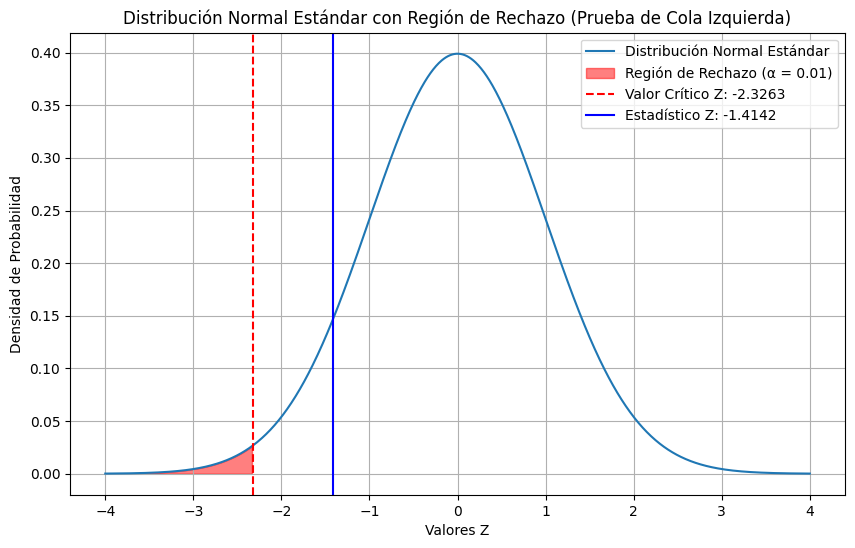


Este gráfico muestra la distribución normal estándar. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = 0.01.
Si el estadístico de prueba Z (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.
En este caso, el estadístico Z (-1.4142) se encuentra fuera de la región de rechazo.


In [ ]:
# Ejercicio 22. Prueba de hipótesis para la media poblacional (sigma conocida - Z-test).

# Procedimiento sistemático para la prueba de hipótesis:

# Datos proporcionados:
mu0_ej22 = 1200  # Media poblacional bajo la hipótesis nula (duración afirmada) en horas
n_ej22 = 50  # Tamaño de la muestra
media_muestra_ej22 = 1180  # Media de la muestra en horas
sigma_ej22 = 100  # Desviación estándar poblacional en horas
alfa_ej22 = 0.01  # Nivel de significancia

print(f"--- Ejercicio 22 ---")
print(f"Media poblacional bajo H0 (mu0): {mu0_ej22} horas")
print(f"Tamaño de la muestra (n): {n_ej22}")
print(f"Media de la muestra: {media_muestra_ej22} horas")
print(f"Desviación estándar poblacional (sigma): {sigma_ej22} horas")
print(f"Nivel de significancia (alfa): {alfa_ej22}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la media poblacional es igual al valor afirmado.
# La hipótesis alternativa (H1) refleja la alegación del cliente (duración es menor).
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): μ = {mu0_ej22} horas")
print(f"Hipótesis Alternativa (H1): μ < {mu0_ej22} horas (Prueba de una cola a la izquierda)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej22 = 0.01.
print(f"\n2. Nivel de Significancia (α): {alfa_ej22}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Como se conoce la desviación estándar poblacional (sigma) y el tamaño de la muestra (n=50) es grande,
# utilizamos el estadístico Z y la distribución normal estándar.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: Z")
print("Distribución Muestral: Distribución Normal Estándar")

# 4. Formular la regla de decisión.
# Para una prueba de una cola a la izquierda con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba Z es menor que el valor crítico Z para alfa.
# El valor crítico Z para una cola a la izquierda se encuentra usando norm.ppf(alfa).
from scipy.stats import norm

valor_critico_z_ej22 = norm.ppf(alfa_ej22)

print("\n4. Regla de Decisión:")
print(f"Valor Crítico Z (para α = {alfa_ej22} en la cola izquierda): {valor_critico_z_ej22:.4f}")
print(f"Regla: Rechazar H0 si Z < {valor_critico_z_ej22:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el error estándar de la media (sigma / sqrt(n)).
import numpy as np
error_estandar_ej22 = sigma_ej22 / np.sqrt(n_ej22)

# Calcular el estadístico de prueba Z.
# Fórmula: Z = (media_muestra - mu0) / error_estandar
estadistico_z_ej22 = (media_muestra_ej22 - mu0_ej22) / error_estandar_ej22

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Error Estándar de la Media: {error_estandar_ej22:.4f}")
print(f"Estadístico de Prueba Z: {estadistico_z_ej22:.4f}")

# Calcular el p-valor (probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado,
# asumiendo que H0 es verdadera). Para una prueba de cola izquierda, es el área a la izquierda del estadístico Z.
p_valor_ej22 = norm.cdf(estadistico_z_ej22)

print(f"P-valor: {p_valor_ej22:.4f}")


# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_z_ej22 < valor_critico_z_ej22:
    print(f"Decisión: Rechazar H0 (ya que Z = {estadistico_z_ej22:.4f} < Valor Crítico Z = {valor_critico_z_ej22:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej22:.4f} <= α = {alfa_ej22})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej22}, para afirmar que la duración promedio de las baterías es menor a {mu0_ej22} horas.")
else:
    print(f"Decisión: No rechazar H0 (ya que Z = {estadistico_z_ej22:.4f} >= Valor Crítico Z = {valor_critico_z_ej22:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej22:.4f} > α = {alfa_ej22})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej22}, para afirmar que la duración promedio de las baterías es menor a {mu0_ej22} horas. No podemos rechazar la afirmación del fabricante.")


# Graficar la distribución normal estándar, el valor crítico Z y el estadístico de prueba Z
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej22 = np.linspace(-4, 4, 1000)
y_z_ej22 = norm.pdf(x_z_ej22, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej22, y_z_ej22, label='Distribución Normal Estándar')

# Sombrear la región de rechazo (área a la izquierda del valor crítico Z)
x_rechazo_ej22 = x_z_ej22[x_z_ej22 < valor_critico_z_ej22]
y_rechazo_ej22 = norm.pdf(x_rechazo_ej22, 0, 1)
plt.fill_between(x_rechazo_ej22, y_rechazo_ej22, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa_ej22})')

# Marcar el valor crítico Z
plt.axvline(valor_critico_z_ej22, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej22:.4f}')

# Marcar el estadístico de prueba Z
plt.axvline(estadistico_z_ej22, color='blue', linestyle='-', label=f'Estadístico Z: {estadistico_z_ej22:.4f}')


# Configurar el gráfico
plt.title('Distribución Normal Estándar con Región de Rechazo (Prueba de Cola Izquierda)')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución normal estándar. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa_ej22}.")
print(f"Si el estadístico de prueba Z (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico Z ({estadistico_z_ej22:.4f}) se encuentra {'dentro' if estadistico_z_ej22 < valor_critico_z_ej22 else 'fuera'} de la región de rechazo.")

# Ejercicio 23
Un profesor afirma que el promedio de su clase en un examen nacional es diferente al promedio nacional de 75 puntos. Una muestra de 36 estudiantes de su clase tiene una media de 78. La desviación estándar poblacional es σ = 12. Con un nivel de significancia: α = 0,05.
•       Plantee las hipótesis nula y alternativa.
•       Calcule el estadístico Z.
•       Determine la región crítica y la región de rechazo.
•       Concluya si se rechaza H0.

--- Ejercicio 23 ---
Media poblacional bajo H0 (mu0): 75 puntos
Tamaño de la muestra (n): 36
Media de la muestra: 78 puntos
Desviación estándar poblacional (sigma): 12 puntos
Nivel de significancia (alfa): 0.05

1. Establecimiento de Hipótesis:
Hipótesis Nula (H0): μ = 75 puntos
Hipótesis Alternativa (H1): μ ≠ 75 puntos (Prueba de dos colas)

2. Nivel de Significancia (α): 0.05

3. Estadístico de Prueba y Distribución:
Estadístico de Prueba: Z
Distribución Muestral: Distribución Normal Estándar

4. Regla de Decisión:
Valor Crítico Z (para α/2 = 0.025 en cada cola): ±1.9600
Regla: Rechazar H0 si |Z| > 1.9600 (o si Z < -1.9600 o Z > 1.9600)

5. Cálculo del Estadístico de Prueba:
Error Estándar de la Media: 2.0000
Estadístico de Prueba Z: 1.5000
P-valor: 0.1336

6. Decisión Estadística y Conclusión:
Decisión: No rechazar H0 (ya que |Z| = 1.5000 <= Valor Crítico Z = 1.9600)
O, No rechazar H0 (ya que p-valor = 0.1336 > α = 0.05)
Conclusión: No existe suficiente evidencia estadística, con un

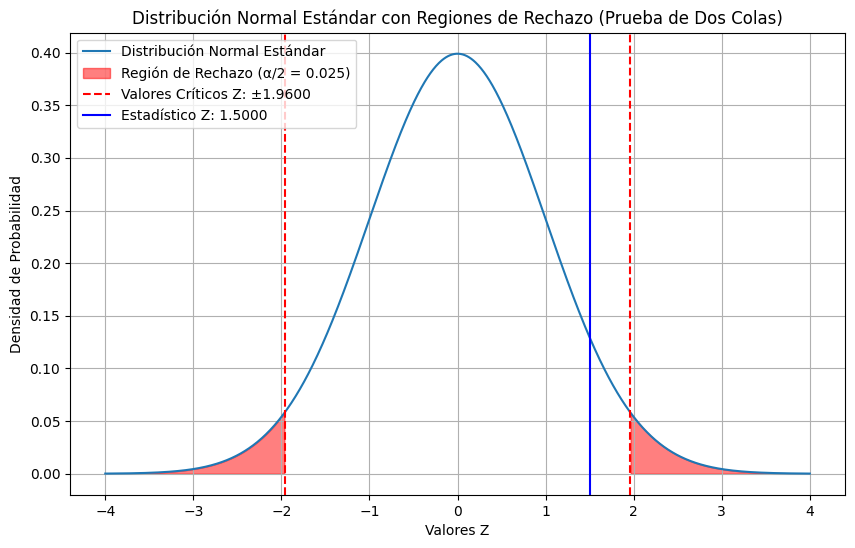


Este gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo son las regiones de rechazo para un nivel de significancia α = 0.05.
Si el estadístico de prueba Z (línea azul) cae dentro de alguna de las regiones de rechazo, se rechaza la hipótesis nula.
En este caso, el estadístico Z (1.5000) se encuentra fuera de la región de rechazo.


In [ ]:
# Ejercicio 23. Prueba de hipótesis para la media poblacional (sigma conocida - Z-test).

# Procedimiento sistemático para la prueba de hipótesis:

# Datos proporcionados:
mu0_ej23 = 75  # Media poblacional bajo la hipótesis nula (promedio nacional) en puntos
n_ej23 = 36  # Tamaño de la muestra
media_muestra_ej23 = 78  # Media de la muestra en puntos
sigma_ej23 = 12  # Desviación estándar poblacional en puntos
alfa_ej23 = 0.05  # Nivel de significancia

print(f"--- Ejercicio 23 ---")
print(f"Media poblacional bajo H0 (mu0): {mu0_ej23} puntos")
print(f"Tamaño de la muestra (n): {n_ej23}")
print(f"Media de la muestra: {media_muestra_ej23} puntos")
print(f"Desviación estándar poblacional (sigma): {sigma_ej23} puntos")
print(f"Nivel de significancia (alfa): {alfa_ej23}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la media poblacional es igual al promedio nacional.
# La hipótesis alternativa (H1) refleja la afirmación del profesor (promedio es diferente).
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): μ = {mu0_ej23} puntos")
print(f"Hipótesis Alternativa (H1): μ ≠ {mu0_ej23} puntos (Prueba de dos colas)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej23 = 0.05.
print(f"\n2. Nivel de Significancia (α): {alfa_ej23}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Como se conoce la desviación estándar poblacional (sigma) y el tamaño de la muestra (n=36) es grande,
# utilizamos el estadístico Z y la distribución normal estándar.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: Z")
print("Distribución Muestral: Distribución Normal Estándar")

# 4. Formular la regla de decisión.
# Para una prueba de dos colas con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el valor absoluto del estadístico de prueba Z es mayor que el valor crítico Z para alfa/2.
# Los valores críticos Z para una prueba de dos colas se encuentran usando norm.ppf(alfa/2) y norm.ppf(1-alfa/2).
from scipy.stats import norm

alfa_dos_colas_ej23 = alfa_ej23 / 2
valor_critico_z_superior_ej23 = norm.ppf(1 - alfa_dos_colas_ej23) # Valor crítico positivo
valor_critico_z_inferior_ej23 = norm.ppf(alfa_dos_colas_ej23) # Valor crítico negativo


print("\n4. Regla de Decisión:")
print(f"Valor Crítico Z (para α/2 = {alfa_dos_colas_ej23} en cada cola): ±{valor_critico_z_superior_ej23:.4f}")
print(f"Regla: Rechazar H0 si |Z| > {valor_critico_z_superior_ej23:.4f} (o si Z < {valor_critico_z_inferior_ej23:.4f} o Z > {valor_critico_z_superior_ej23:.4f})")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el error estándar de la media (sigma / sqrt(n)).
import numpy as np
error_estandar_ej23 = sigma_ej23 / np.sqrt(n_ej23)

# Calcular el estadístico de prueba Z.
# Fórmula: Z = (media_muestra - mu0) / error_estandar
estadistico_z_ej23 = (media_muestra_ej23 - mu0_ej23) / error_estandar_ej23

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Error Estándar de la Media: {error_estandar_ej23:.4f}")
print(f"Estadístico de Prueba Z: {estadistico_z_ej23:.4f}")

# Calcular el p-valor (probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado,
# asumiendo que H0 es verdadera). Para una prueba de dos colas, es 2 * (área en la cola más cercana al estadístico Z).
# En este caso, como Z es positivo, es 2 * (área a la derecha de Z).
p_valor_ej23 = 2 * (1 - norm.cdf(abs(estadistico_z_ej23)))


print(f"P-valor: {p_valor_ej23:.4f}")


# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if abs(estadistico_z_ej23) > valor_critico_z_superior_ej23:
    print(f"Decisión: Rechazar H0 (ya que |Z| = {abs(estadistico_z_ej23):.4f} > Valor Crítico Z = {valor_critico_z_superior_ej23:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej23:.4f} <= α = {alfa_ej23})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej23}, para afirmar que el promedio de la clase es diferente al promedio nacional de {mu0_ej23} puntos.")
else:
    print(f"Decisión: No rechazar H0 (ya que |Z| = {abs(estadistico_z_ej23):.4f} <= Valor Crítico Z = {valor_critico_z_superior_ej23:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej23:.4f} > α = {alfa_ej23})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej23}, para afirmar que el promedio de la clase es diferente al promedio nacional de {mu0_ej23} puntos. No podemos rechazar la hipótesis de que sea igual.")


# Graficar la distribución normal estándar, los valores críticos Z y el estadístico de prueba Z
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej23 = np.linspace(-4, 4, 1000)
y_z_ej23 = norm.pdf(x_z_ej23, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej23, y_z_ej23, label='Distribución Normal Estándar')

# Sombrear la región de rechazo (áreas en ambas colas)
x_rechazo_derecha_ej23 = x_z_ej23[x_z_ej23 > valor_critico_z_superior_ej23]
y_rechazo_derecha_ej23 = norm.pdf(x_rechazo_derecha_ej23, 0, 1)
plt.fill_between(x_rechazo_derecha_ej23, y_rechazo_derecha_ej23, color='red', alpha=0.5, label=f'Región de Rechazo (α/2 = {alfa_dos_colas_ej23})')

x_rechazo_izquierda_ej23 = x_z_ej23[x_z_ej23 < valor_critico_z_inferior_ej23]
y_rechazo_izquierda_ej23 = norm.pdf(x_rechazo_izquierda_ej23, 0, 1)
plt.fill_between(x_rechazo_izquierda_ej23, y_rechazo_izquierda_ej23, color='red', alpha=0.5)

# Marcar los valores críticos Z
plt.axvline(valor_critico_z_superior_ej23, color='red', linestyle='--', label=f'Valores Críticos Z: ±{valor_critico_z_superior_ej23:.4f}')
plt.axvline(valor_critico_z_inferior_ej23, color='red', linestyle='--')

# Marcar el estadístico de prueba Z
plt.axvline(estadistico_z_ej23, color='blue', linestyle='-', label=f'Estadístico Z: {estadistico_z_ej23:.4f}')


# Configurar el gráfico
plt.title('Distribución Normal Estándar con Regiones de Rechazo (Prueba de Dos Colas)')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución normal estándar. Las áreas sombreadas en rojo son las regiones de rechazo para un nivel de significancia α = {alfa_ej23}.")
print(f"Si el estadístico de prueba Z (línea azul) cae dentro de alguna de las regiones de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico Z ({estadistico_z_ej23:.4f}) se encuentra {'dentro' if abs(estadistico_z_ej23) > valor_critico_z_superior_ej23 else 'fuera'} de la región de rechazo.")

# Ejercicio 24
Un laboratorio afirma que su medicamento reduce la presión arterial en 10 mmHg en promedio. Un estudio con 25 pacientes muestra una reducción promedio de 8 mmHg, con σ = 3 mmHg. Con un nivel de significancia α = 0,05.
•       Plantee las hipótesis nula y alternativa.
•       Calcule el estadístico Z.
•       Determine la región crítica y la región de rechazo.
•       Concluya si se rechaza H0.

--- Ejercicio 24 ---
Media poblacional bajo H0 (mu0): 10 mmHg
Tamaño de la muestra (n): 25
Media de la muestra: 8 mmHg
Desviación estándar poblacional (sigma): 3 mmHg
Nivel de significancia (alfa): 0.05

1. Establecimiento de Hipótesis:
Hipótesis Nula (H0): μ = 10 mmHg
Hipótesis Alternativa (H1): μ < 10 mmHg (Prueba de una cola a la izquierda)

2. Nivel de Significancia (α): 0.05

3. Estadístico de Prueba y Distribución:
Estadístico de Prueba: Z
Distribución Muestral: Distribución Normal Estándar

4. Regla de Decisión:
Valor Crítico Z (para α = 0.05 en la cola izquierda): -1.6449
Regla: Rechazar H0 si Z < -1.6449

5. Cálculo del Estadístico de Prueba:
Error Estándar de la Media: 0.6000
Estadístico de Prueba Z: -3.3333
P-valor: 0.0004

6. Decisión Estadística y Conclusión:
Decisión: Rechazar H0 (ya que Z = -3.3333 < Valor Crítico Z = -1.6449)
O, Rechazar H0 (ya que p-valor = 0.0004 <= α = 0.05)
Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de 0.05, p

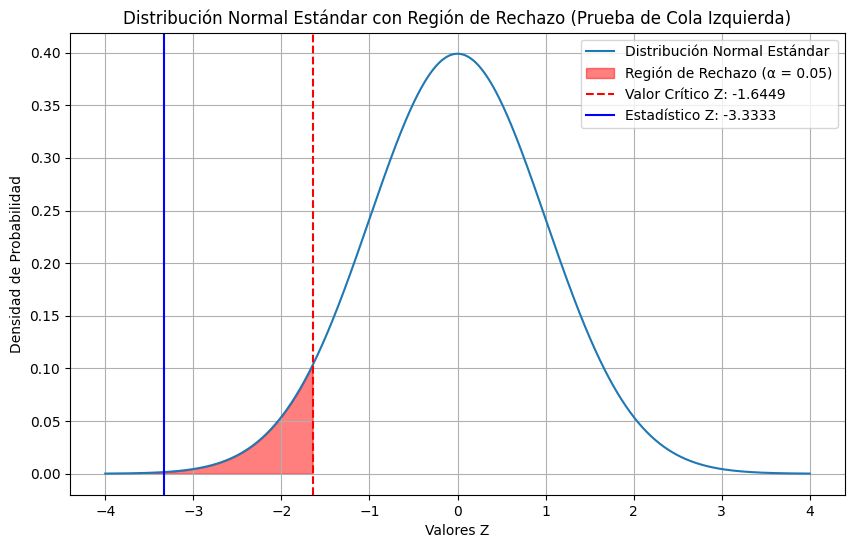


Este gráfico muestra la distribución normal estándar. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = 0.05.
Si el estadístico de prueba Z (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.
En este caso, el estadístico Z (-3.3333) se encuentra dentro de la región de rechazo.


In [ ]:
# Ejercicio 24. Prueba de hipótesis para la media poblacional (sigma conocida - Z-test).

# Procedimiento sistemático para la prueba de hipótesis:

# Datos proporcionados:
mu0_ej24 = 10  # Media poblacional bajo la hipótesis nula (reducción afirmada) en mmHg
n_ej24 = 25  # Tamaño de la muestra
media_muestra_ej24 = 8  # Media de la muestra (reducción observada) en mmHg
sigma_ej24 = 3  # Desviación estándar poblacional en mmHg
alfa_ej24 = 0.05  # Nivel de significancia

print(f"--- Ejercicio 24 ---")
print(f"Media poblacional bajo H0 (mu0): {mu0_ej24} mmHg")
print(f"Tamaño de la muestra (n): {n_ej24}")
print(f"Media de la muestra: {media_muestra_ej24} mmHg")
print(f"Desviación estándar poblacional (sigma): {sigma_ej24} mmHg")
print(f"Nivel de significancia (alfa): {alfa_ej24}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la media poblacional es igual al valor afirmado.
# La hipótesis alternativa (H1) es que la reducción promedio es diferente del valor afirmado (prueba de dos colas)
# o menor que el valor afirmado (si se sospecha que la reducción es menor).
# Basado en la redacción, "Un estudio con 25 pacientes muestra una reducción promedio de 8 mmHg",
# y la afirmación es de 10 mmHg, parece que se está investigando si la reducción es menor.
# Asumiremos una prueba de una cola a la izquierda, ya que la media muestral es menor que la media hipotetizada.
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): μ = {mu0_ej24} mmHg")
print(f"Hipótesis Alternativa (H1): μ < {mu0_ej24} mmHg (Prueba de una cola a la izquierda)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej24 = 0.05.
print(f"\n2. Nivel de Significancia (α): {alfa_ej24}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Como se conoce la desviación estándar poblacional (sigma), aunque el tamaño de la muestra (n=25) es pequeño,
# utilizamos el estadístico Z y la distribución normal estándar.
# (Si sigma fuera desconocida y n <= 30, usaríamos la distribución t).
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: Z")
print("Distribución Muestral: Distribución Normal Estándar")

# 4. Formular la regla de decisión.
# Para una prueba de una cola a la izquierda con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba Z es menor que el valor crítico Z para alfa.
# El valor crítico Z para una cola a la izquierda se encuentra usando norm.ppf(alfa).
from scipy.stats import norm

valor_critico_z_ej24 = norm.ppf(alfa_ej24)

print("\n4. Regla de Decisión:")
print(f"Valor Crítico Z (para α = {alfa_ej24} en la cola izquierda): {valor_critico_z_ej24:.4f}")
print(f"Regla: Rechazar H0 si Z < {valor_critico_z_ej24:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el error estándar de la media (sigma / sqrt(n)).
import numpy as np
error_estandar_ej24 = sigma_ej24 / np.sqrt(n_ej24)

# Calcular el estadístico de prueba Z.
# Fórmula: Z = (media_muestra - mu0) / error_estandar
estadistico_z_ej24 = (media_muestra_ej24 - mu0_ej24) / error_estandar_ej24

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Error Estándar de la Media: {error_estandar_ej24:.4f}")
print(f"Estadístico de Prueba Z: {estadistico_z_ej24:.4f}")

# Calcular el p-valor (probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado,
# asumiendo que H0 es verdadera). Para una prueba de cola izquierda, es el área a la izquierda del estadístico Z.
p_valor_ej24 = norm.cdf(estadistico_z_ej24)

print(f"P-valor: {p_valor_ej24:.4f}")


# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_z_ej24 < valor_critico_z_ej24:
    print(f"Decisión: Rechazar H0 (ya que Z = {estadistico_z_ej24:.4f} < Valor Crítico Z = {valor_critico_z_ej24:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej24:.4f} <= α = {alfa_ej24})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej24}, para afirmar que la reducción promedio de la presión arterial con el medicamento es menor a {mu0_ej24} mmHg.")
else:
    print(f"Decisión: No rechazar H0 (ya que Z = {estadistico_z_ej24:.4f} >= Valor Crítico Z = {valor_critico_z_ej24:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej24:.4f} > α = {alfa_ej24})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej24}, para afirmar que la reducción promedio de la presión arterial con el medicamento es menor a {mu0_ej24} mmHg. No podemos rechazar la afirmación del laboratorio.")


# Graficar la distribución normal estándar, el valor crítico Z y el estadístico de prueba Z
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej24 = np.linspace(-4, 4, 1000)
y_z_ej24 = norm.pdf(x_z_ej24, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej24, y_z_ej24, label='Distribución Normal Estándar')

# Sombrear la región de rechazo (área a la izquierda del valor crítico Z)
x_rechazo_ej24 = x_z_ej24[x_z_ej24 < valor_critico_z_ej24]
y_rechazo_ej24 = norm.pdf(x_rechazo_ej24, 0, 1)
plt.fill_between(x_rechazo_ej24, y_rechazo_ej24, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa_ej24})')

# Marcar el valor crítico Z
plt.axvline(valor_critico_z_ej24, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej24:.4f}')

# Marcar el estadístico de prueba Z
plt.axvline(estadistico_z_ej24, color='blue', linestyle='-', label=f'Estadístico Z: {estadistico_z_ej24:.4f}')


# Configurar el gráfico
plt.title('Distribución Normal Estándar con Región de Rechazo (Prueba de Cola Izquierda)')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución normal estándar. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa_ej24}.")
print(f"Si el estadístico de prueba Z (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico Z ({estadistico_z_ej24:.4f}) se encuentra {'dentro' if estadistico_z_ej24 < valor_critico_z_ej24 else 'fuera'} de la región de rechazo.")

# Ejercicio 25
Una máquina llena botellas de 500 mL. Una auditoría revela que, en 60 botellas, la media es 498 mL. Se sabe que σ = 5 mL. Con un nivel de significancia: α = 0,01.
•       Plantee las hipótesis nula y alternativa.
•       Calcule el estadístico Z.
•       Determine la región crítica y la región de rechazo.
•       Concluya si se rechaza H0.

--- Ejercicio 25 ---
Media poblacional bajo H0 (mu0): 500 mL
Tamaño de la muestra (n): 60
Media de la muestra: 498 mL
Desviación estándar poblacional (sigma): 5 mL
Nivel de significancia (alfa): 0.01

1. Establecimiento de Hipótesis:
Hipótesis Nula (H0): μ = 500 mL
Hipótesis Alternativa (H1): μ < 500 mL (Prueba de una cola a la izquierda)

2. Nivel de Significancia (α): 0.01

3. Estadístico de Prueba y Distribución:
Estadístico de Prueba: Z
Distribución Muestral: Distribución Normal Estándar

4. Regla de Decisión:
Valor Crítico Z (para α = 0.01 en la cola izquierda): -2.3263
Regla: Rechazar H0 si Z < -2.3263

5. Cálculo del Estadístico de Prueba:
Error Estándar de la Media: 0.6455
Estadístico de Prueba Z: -3.0984
P-valor: 0.0010

6. Decisión Estadística y Conclusión:
Decisión: Rechazar H0 (ya que Z = -3.0984 < Valor Crítico Z = -2.3263)
O, Rechazar H0 (ya que p-valor = 0.0010 <= α = 0.01)
Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de 0.01, para a

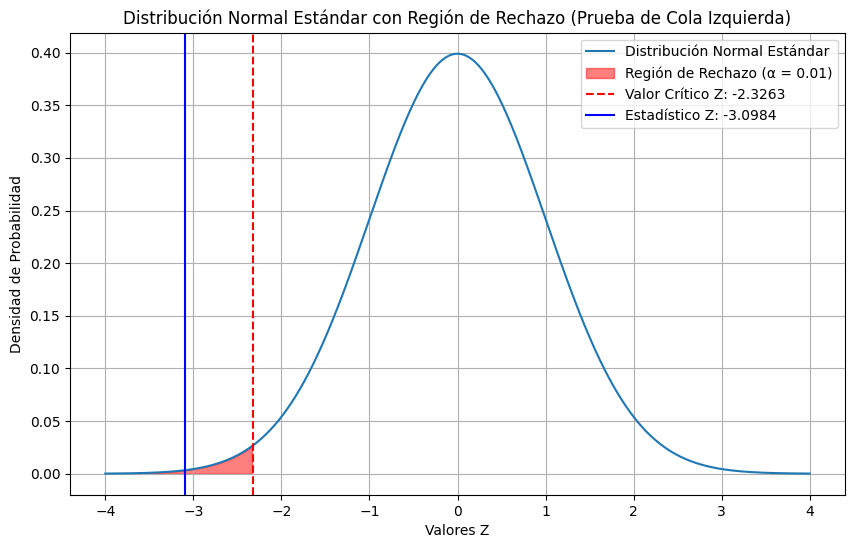


Este gráfico muestra la distribución normal estándar. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = 0.01.
Si el estadístico de prueba Z (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.
En este caso, el estadístico Z (-3.0984) se encuentra dentro de la región de rechazo.


In [ ]:
# Ejercicio 25. Prueba de hipótesis para la media poblacional (sigma conocida - Z-test).

# Procedimiento sistemático para la prueba de hipótesis:

# Datos proporcionados:
mu0_ej25 = 500  # Media poblacional bajo la hipótesis nula (volumen afirmado) en mL
n_ej25 = 60  # Tamaño de la muestra
media_muestra_ej25 = 498  # Media de la muestra en mL
sigma_ej25 = 5  # Desviación estándar poblacional en mL
alfa_ej25 = 0.01  # Nivel de significancia

print(f"--- Ejercicio 25 ---")
print(f"Media poblacional bajo H0 (mu0): {mu0_ej25} mL")
print(f"Tamaño de la muestra (n): {n_ej25}")
print(f"Media de la muestra: {media_muestra_ej25} mL")
print(f"Desviación estándar poblacional (sigma): {sigma_ej25} mL")
print(f"Nivel de significancia (alfa): {alfa_ej25}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la media poblacional es igual al volumen afirmado.
# La hipótesis alternativa (H1) refleja la sospecha de que la media es diferente (prueba de dos colas)
# o menor (si se sospecha subllenado) o mayor (si se sospecha sobrellenado).
# Basado en la redacción, "la media es 498 mL", que es menor que 500 mL, parece que se sospecha subllenado.
# Asumiremos una prueba de una cola a la izquierda.
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): μ = {mu0_ej25} mL")
print(f"Hipótesis Alternativa (H1): μ < {mu0_ej25} mL (Prueba de una cola a la izquierda)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej25 = 0.01.
print(f"\n2. Nivel de Significancia (α): {alfa_ej25}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Como se conoce la desviación estándar poblacional (sigma) y el tamaño de la muestra (n=60) es grande,
# utilizamos el estadístico Z y la distribución normal estándar.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: Z")
print("Distribución Muestral: Distribución Normal Estándar")

# 4. Formular la regla de decisión.
# Para una prueba de una cola a la izquierda con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba Z es menor que el valor crítico Z para alfa.
# El valor crítico Z para una cola a la izquierda se encuentra usando norm.ppf(alfa).
from scipy.stats import norm

valor_critico_z_ej25 = norm.ppf(alfa_ej25)

print("\n4. Regla de Decisión:")
print(f"Valor Crítico Z (para α = {alfa_ej25} en la cola izquierda): {valor_critico_z_ej25:.4f}")
print(f"Regla: Rechazar H0 si Z < {valor_critico_z_ej25:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el error estándar de la media (sigma / sqrt(n)).
import numpy as np
error_estandar_ej25 = sigma_ej25 / np.sqrt(n_ej25)

# Calcular el estadístico de prueba Z.
# Fórmula: Z = (media_muestra - mu0) / error_estandar
estadistico_z_ej25 = (media_muestra_ej25 - mu0_ej25) / error_estandar_ej25

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Error Estándar de la Media: {error_estandar_ej25:.4f}")
print(f"Estadístico de Prueba Z: {estadistico_z_ej25:.4f}")

# Calcular el p-valor (probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado,
# asumiendo que H0 es verdadera). Para una prueba de cola izquierda, es el área a la izquierda del estadístico Z.
p_valor_ej25 = norm.cdf(estadistico_z_ej25)

print(f"P-valor: {p_valor_ej25:.4f}")

# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_z_ej25 < valor_critico_z_ej25:
    print(f"Decisión: Rechazar H0 (ya que Z = {estadistico_z_ej25:.4f} < Valor Crítico Z = {valor_critico_z_ej25:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej25:.4f} <= α = {alfa_ej25})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej25}, para afirmar que la media de llenado de las botellas es menor a {mu0_ej25} mL.")
else:
    print(f"Decisión: No rechazar H0 (ya que Z = {estadistico_z_ej25:.4f} >= Valor Crítico Z = {valor_critico_z_ej25:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej25:.4f} > α = {alfa_ej25})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej25}, para afirmar que la media de llenado de las botellas es menor a {mu0_ej25} mL. No podemos rechazar la afirmación de que la media es {mu0_ej25} mL.")


# Graficar la distribución normal estándar, el valor crítico Z y el estadístico de prueba Z
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generar puntos para la curva normal estándar
x_z_ej25 = np.linspace(-4, 4, 1000)
y_z_ej25 = norm.pdf(x_z_ej25, 0, 1) # PDF de la distribución normal estándar

plt.figure(figsize=(10, 6))
plt.plot(x_z_ej25, y_z_ej25, label='Distribución Normal Estándar')

# Sombrear la región de rechazo (área a la izquierda del valor crítico Z)
x_rechazo_ej25 = x_z_ej25[x_z_ej25 < valor_critico_z_ej25]
y_rechazo_ej25 = norm.pdf(x_rechazo_ej25, 0, 1)
plt.fill_between(x_rechazo_ej25, y_rechazo_ej25, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa_ej25})')

# Marcar el valor crítico Z
plt.axvline(valor_critico_z_ej25, color='red', linestyle='--', label=f'Valor Crítico Z: {valor_critico_z_ej25:.4f}')

# Marcar el estadístico de prueba Z
plt.axvline(estadistico_z_ej25, color='blue', linestyle='-', label=f'Estadístico Z: {estadistico_z_ej25:.4f}')


# Configurar el gráfico
plt.title('Distribución Normal Estándar con Región de Rechazo (Prueba de Cola Izquierda)')
plt.xlabel('Valores Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución normal estándar. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa_ej25}.")
print(f"Si el estadístico de prueba Z (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico Z ({estadistico_z_ej25:.4f}) se encuentra {'dentro' if estadistico_z_ej25 < valor_critico_z_ej25 else 'fuera'} de la región de rechazo.")

# Ejercicio 26
Un restaurante afirma que su tiempo promedio de entrega a domicilio es 25 minutos. Un cliente sospecha que es mayor. Se registran 15 entregas, obteniendo una media de 28 minutos y desviación estándar muestral s = 4 minutos. Con un nivel de significancia de α = 0,05.
•       Plantee las hipótesis nula y alternativa.
•       Calcule el estadístico t.
•       Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
•       Concluya si se rechaza H0.

--- Ejercicio 26 ---
Media poblacional bajo H0 (mu0): 25 minutos
Tamaño de la muestra (n): 15
Media de la muestra: 28 minutos
Desviación estándar de la muestra (s): 4 minutos
Nivel de significancia (alfa): 0.05

1. Establecimiento de Hipótesis:
Hipótesis Nula (H0): μ = 25 minutos
Hipótesis Alternativa (H1): μ > 25 minutos (Prueba de una cola a la derecha)

2. Nivel de Significancia (α): 0.05

3. Estadístico de Prueba y Distribución:
Estadístico de Prueba: t
Distribución Muestral: Distribución t de Student
Grados de Libertad (df): n - 1 = 14

4. Regla de Decisión:
Grados de Libertad (df): 14
Valor Crítico t (para α = 0.05 en la cola derecha con df=14): 1.7613
Regla: Rechazar H0 si t > 1.7613

5. Cálculo del Estadístico de Prueba:
Error Estándar de la Media: 1.0328
Estadístico de Prueba t: 2.9047
P-valor: 0.0058

6. Decisión Estadística y Conclusión:
Decisión: Rechazar H0 (ya que t = 2.9047 > Valor Crítico t = 1.7613)
O, Rechazar H0 (ya que p-valor = 0.0058 <= α = 0.05)
Conclusión: Exist

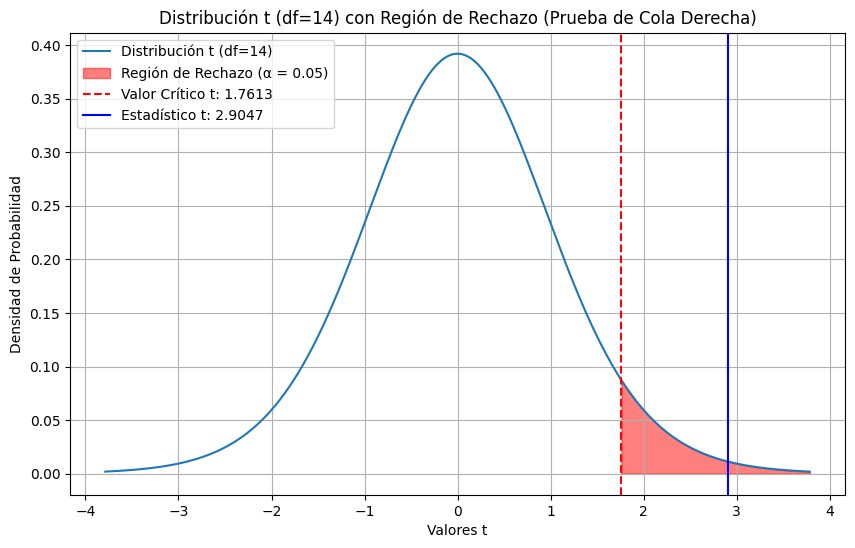


Este gráfico muestra la distribución t con 14 grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = 0.05.
Si el estadístico de prueba t (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.
En este caso, el estadístico t (2.9047) se encuentra dentro de la región de rechazo.


In [ ]:
# Ejercicio 26. Prueba de hipótesis para la media poblacional (sigma desconocida - t-test).

# Procedimiento sistemático para la prueba de hipótesis (usando t-test):

# Datos proporcionados:
mu0_ej26 = 25  # Media poblacional bajo la hipótesis nula (tiempo promedio afirmado) en minutos
n_ej26 = 15  # Tamaño de la muestra (n < 30)
media_muestra_ej26 = 28  # Media de la muestra en minutos
desviacion_estandar_muestra_ej26 = 4  # Desviación estándar de la muestra en minutos
alfa_ej26 = 0.05  # Nivel de significancia

print(f"--- Ejercicio 26 ---")
print(f"Media poblacional bajo H0 (mu0): {mu0_ej26} minutos")
print(f"Tamaño de la muestra (n): {n_ej26}")
print(f"Media de la muestra: {media_muestra_ej26} minutos")
print(f"Desviación estándar de la muestra (s): {desviacion_estandar_muestra_ej26} minutos")
print(f"Nivel de significancia (alfa): {alfa_ej26}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la media poblacional es igual al valor afirmado.
# La hipótesis alternativa (H1) refleja la sospecha del cliente (tiempo de entrega es mayor).
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): μ = {mu0_ej26} minutos")
print(f"Hipótesis Alternativa (H1): μ > {mu0_ej26} minutos (Prueba de una cola a la derecha)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej26 = 0.05.
print(f"\n2. Nivel de Significancia (α): {alfa_ej26}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Como la desviación estándar poblacional es desconocida y el tamaño de la muestra (n=15) es pequeño,
# utilizamos el estadístico t y la distribución t de Student.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: t")
print("Distribución Muestral: Distribución t de Student")
print(f"Grados de Libertad (df): n - 1 = {n_ej26 - 1}")


# 4. Formular la regla de decisión.
# Para una prueba de una cola a la derecha con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba t es mayor que el valor crítico t para alfa con n-1 grados de libertad.
# El valor crítico t para una cola a la derecha se encuentra usando t.ppf(1 - alfa, df).
from scipy.stats import t

grados_libertad_ej26 = n_ej26 - 1
valor_critico_t_ej26 = t.ppf(1 - alfa_ej26, grados_libertad_ej26)


print("\n4. Regla de Decisión:")
print(f"Grados de Libertad (df): {grados_libertad_ej26}")
print(f"Valor Crítico t (para α = {alfa_ej26} en la cola derecha con df={grados_libertad_ej26}): {valor_critico_t_ej26:.4f}")
print(f"Regla: Rechazar H0 si t > {valor_critico_t_ej26:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el error estándar de la media (s / sqrt(n)).
import numpy as np
error_estandar_ej26 = desviacion_estandar_muestra_ej26 / np.sqrt(n_ej26)

# Calcular el estadístico de prueba t.
# Fórmula: t = (media_muestra - mu0) / error_estandar
estadistico_t_ej26 = (media_muestra_ej26 - mu0_ej26) / error_estandar_ej26

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Error Estándar de la Media: {error_estandar_ej26:.4f}")
print(f"Estadístico de Prueba t: {estadistico_t_ej26:.4f}")

# Calcular el p-valor (probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado,
# asumiendo que H0 es verdadera). Para una prueba de cola derecha, es el área a la derecha del estadístico t.
p_valor_ej26 = 1 - t.cdf(estadistico_t_ej26, grados_libertad_ej26)


print(f"P-valor: {p_valor_ej26:.4f}")


# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_t_ej26 > valor_critico_t_ej26:
    print(f"Decisión: Rechazar H0 (ya que t = {estadistico_t_ej26:.4f} > Valor Crítico t = {valor_critico_t_ej26:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej26:.4f} <= α = {alfa_ej26})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej26}, para afirmar que el tiempo promedio de entrega a domicilio es mayor a {mu0_ej26} minutos.")
else:
    print(f"Decisión: No rechazar H0 (ya que t = {estadistico_t_ej26:.4f} <= Valor Crítico t = {valor_critico_t_ej26:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej26:.4f} > α = {alfa_ej26})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej26}, para afirmar que el tiempo promedio de entrega a domicilio es mayor a {mu0_ej26} minutos. No podemos rechazar la afirmación del restaurante.")


# Graficar la distribución t, el valor crítico t y el estadístico de prueba t
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Generar puntos para la curva t
x_t_ej26 = np.linspace(t.ppf(0.001, grados_libertad_ej26), t.ppf(0.999, grados_libertad_ej26), 1000)
y_t_ej26 = t.pdf(x_t_ej26, grados_libertad_ej26) # PDF de la distribución t con los grados de libertad correctos

plt.figure(figsize=(10, 6))
plt.plot(x_t_ej26, y_t_ej26, label=f'Distribución t (df={grados_libertad_ej26})')

# Sombrear la región de rechazo (área a la derecha del valor crítico t)
x_rechazo_ej26 = x_t_ej26[x_t_ej26 > valor_critico_t_ej26]
y_rechazo_ej26 = t.pdf(x_rechazo_ej26, grados_libertad_ej26)
plt.fill_between(x_rechazo_ej26, y_rechazo_ej26, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa_ej26})')

# Marcar el valor crítico t
plt.axvline(valor_critico_t_ej26, color='red', linestyle='--', label=f'Valor Crítico t: {valor_critico_t_ej26:.4f}')

# Marcar el estadístico de prueba t
plt.axvline(estadistico_t_ej26, color='blue', linestyle='-', label=f'Estadístico t: {estadistico_t_ej26:.4f}')


# Configurar el gráfico
plt.title(f'Distribución t (df={grados_libertad_ej26}) con Región de Rechazo (Prueba de Cola Derecha)')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución t con {grados_libertad_ej26} grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa_ej26}.")
print(f"Si el estadístico de prueba t (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico t ({estadistico_t_ej26:.4f}) se encuentra {'dentro' if estadistico_t_ej26 > valor_critico_t_ej26 else 'fuera'} de la región de rechazo.")

# Ejercicio 27
Un colegio afirma que el promedio de su clase en matemáticas es 80/100. Una muestra de 12 estudiantes tiene una media de 75 y s = 8. Con un nivel de significancia de α = 0,01.
1.      Plantee las hipótesis nula y alternativa.
2.      Calcule el estadístico t.
3.      Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
4.      Concluya si se rechaza H0.

--- Ejercicio 27 ---
Media poblacional bajo H0 (mu0): 80
Tamaño de la muestra (n): 12
Media de la muestra: 75
Desviación estándar de la muestra (s): 8
Nivel de significancia (alfa): 0.01

1. Establecimiento de Hipótesis:
Hipótesis Nula (H0): μ = 80
Hipótesis Alternativa (H1): μ < 80 (Prueba de una cola a la izquierda)

2. Nivel de Significancia (α): 0.01

3. Estadístico de Prueba y Distribución:
Estadístico de Prueba: t
Distribución Muestral: Distribución t de Student
Grados de Libertad (df): n - 1 = 11

4. Regla de Decisión:
Grados de Libertad (df): 11
Valor Crítico t (para α = 0.01 en la cola izquierda con df=11): -2.7181
Regla: Rechazar H0 si t < -2.7181

5. Cálculo del Estadístico de Prueba:
Error Estándar de la Media: 2.3094
Estadístico de Prueba t: -2.1651
P-valor: 0.0266

6. Decisión Estadística y Conclusión:
Decisión: No rechazar H0 (ya que t = -2.1651 >= Valor Crítico t = -2.7181)
O, No rechazar H0 (ya que p-valor = 0.0266 > α = 0.01)
Conclusión: No existe suficiente evidencia

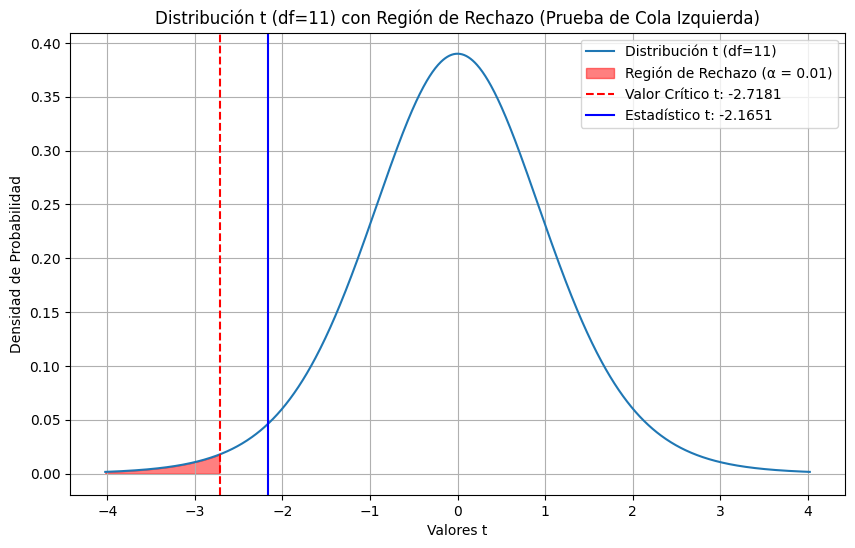


Este gráfico muestra la distribución t con 11 grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = 0.01.
Si el estadístico de prueba t (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.
En este caso, el estadístico t (-2.1651) se encuentra fuera de la región de rechazo.


In [ ]:
# Ejercicio 27. Prueba de hipótesis para la media poblacional (sigma desconocida - t-test).

# Procedimiento sistemático para la prueba de hipótesis (usando t-test):

# Datos proporcionados:
mu0_ej27 = 80  # Media poblacional bajo la hipótesis nula (promedio afirmado)
n_ej27 = 12  # Tamaño de la muestra (n < 30)
media_muestra_ej27 = 75  # Media de la muestra
desviacion_estandar_muestra_ej27 = 8  # Desviación estándar de la muestra
alfa_ej27 = 0.01  # Nivel de significancia

print(f"--- Ejercicio 27 ---")
print(f"Media poblacional bajo H0 (mu0): {mu0_ej27}")
print(f"Tamaño de la muestra (n): {n_ej27}")
print(f"Media de la muestra: {media_muestra_ej27}")
print(f"Desviación estándar de la muestra (s): {desviacion_estandar_muestra_ej27}")
print(f"Nivel de significancia (alfa): {alfa_ej27}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la media poblacional es igual al valor afirmado.
# La hipótesis alternativa (H1) es que el promedio es menor (dado que la media muestral es menor que mu0).
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): μ = {mu0_ej27}")
print(f"Hipótesis Alternativa (H1): μ < {mu0_ej27} (Prueba de una cola a la izquierda)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej27 = 0.01.
print(f"\n2. Nivel de Significancia (α): {alfa_ej27}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Como la desviación estándar poblacional es desconocida y el tamaño de la muestra (n=12) es pequeño,
# utilizamos el estadístico t y la distribución t de Student.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: t")
print("Distribución Muestral: Distribución t de Student")
print(f"Grados de Libertad (df): n - 1 = {n_ej27 - 1}")


# 4. Formular la regla de decisión.
# Para una prueba de una cola a la izquierda con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba t es menor que el valor crítico t para alfa con n-1 grados de libertad.
# El valor crítico t para una cola a la izquierda se encuentra usando t.ppf(alfa, df).
from scipy.stats import t

grados_libertad_ej27 = n_ej27 - 1
valor_critico_t_ej27 = t.ppf(alfa_ej27, grados_libertad_ej27)


print("\n4. Regla de Decisión:")
print(f"Grados de Libertad (df): {grados_libertad_ej27}")
print(f"Valor Crítico t (para α = {alfa_ej27} en la cola izquierda con df={grados_libertad_ej27}): {valor_critico_t_ej27:.4f}")
print(f"Regla: Rechazar H0 si t < {valor_critico_t_ej27:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el error estándar de la media (s / sqrt(n)).
import numpy as np
error_estandar_ej27 = desviacion_estandar_muestra_ej27 / np.sqrt(n_ej27)

# Calcular el estadístico de prueba t.
# Fórmula: t = (media_muestra - mu0) / error_estandar
estadistico_t_ej27 = (media_muestra_ej27 - mu0_ej27) / error_estandar_ej27

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Error Estándar de la Media: {error_estandar_ej27:.4f}")
print(f"Estadístico de Prueba t: {estadistico_t_ej27:.4f}")

# Calcular el p-valor (probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado,
# asumiendo que H0 es verdadera). Para una prueba de cola izquierda, es el área a la izquierda del estadístico t.
p_valor_ej27 = t.cdf(estadistico_t_ej27, grados_libertad_ej27)


print(f"P-valor: {p_valor_ej27:.4f}")


# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_t_ej27 < valor_critico_t_ej27:
    print(f"Decisión: Rechazar H0 (ya que t = {estadistico_t_ej27:.4f} < Valor Crítico t = {valor_critico_t_ej27:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej27:.4f} <= α = {alfa_ej27})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej27}, para afirmar que el promedio de la clase en matemáticas es menor a {mu0_ej27}.")
else:
    print(f"Decisión: No rechazar H0 (ya que t = {estadistico_t_ej27:.4f} >= Valor Crítico t = {valor_critico_t_ej27:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej27:.4f} > α = {alfa_ej27})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej27}, para afirmar que el promedio de la clase en matemáticas es menor a {mu0_ej27}. No podemos rechazar la afirmación del colegio.")


# Graficar la distribución t, el valor crítico t y el estadístico de prueba t
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Generar puntos para la curva t
x_t_ej27 = np.linspace(t.ppf(0.001, grados_libertad_ej27), t.ppf(0.999, grados_libertad_ej27), 1000)
y_t_ej27 = t.pdf(x_t_ej27, grados_libertad_ej27) # PDF de la distribución t con los grados de libertad correctos

plt.figure(figsize=(10, 6))
plt.plot(x_t_ej27, y_t_ej27, label=f'Distribución t (df={grados_libertad_ej27})')

# Sombrear la región de rechazo (área a la izquierda del valor crítico t)
x_rechazo_ej27 = x_t_ej27[x_t_ej27 < valor_critico_t_ej27]
y_rechazo_ej27 = t.pdf(x_rechazo_ej27, grados_libertad_ej27)
plt.fill_between(x_rechazo_ej27, y_rechazo_ej27, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa_ej27})')

# Marcar el valor crítico t
plt.axvline(valor_critico_t_ej27, color='red', linestyle='--', label=f'Valor Crítico t: {valor_critico_t_ej27:.4f}')

# Marcar el estadístico de prueba t
plt.axvline(estadistico_t_ej27, color='blue', linestyle='-', label=f'Estadístico t: {estadistico_t_ej27:.4f}')


# Configurar el gráfico
plt.title(f'Distribución t (df={grados_libertad_ej27}) con Región de Rechazo (Prueba de Cola Izquierda)')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución t con {grados_libertad_ej27} grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa_ej27}.")
print(f"Si el estadístico de prueba t (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico t ({estadistico_t_ej27:.4f}) se encuentra {'dentro' if estadistico_t_ej27 < valor_critico_t_ej27 else 'fuera'} de la región de rechazo.")

# Ejercicio 28
Un fabricante asegura que su auto consume 15 km/L. Una prueba con 10 autos muestra una media de 14 km/L y s = 1,2 km/L. Con un nivel de significancia de α = 0,05.
1.      Plantee las hipótesis nula y alternativa.
2.      Calcule el estadístico t.
3.      Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
4.      Concluya si se rechaza H0.

--- Ejercicio 28 ---
Media poblacional bajo H0 (mu0): 15 km/L
Tamaño de la muestra (n): 10
Media de la muestra: 14 km/L
Desviación estándar de la muestra (s): 1.2 km/L
Nivel de significancia (alfa): 0.05

1. Establecimiento de Hipótesis:
Hipótesis Nula (H0): μ = 15 km/L
Hipótesis Alternativa (H1): μ < 15 km/L (Prueba de una cola a la izquierda)

2. Nivel de Significancia (α): 0.05

3. Estadístico de Prueba y Distribución:
Estadístico de Prueba: t
Distribución Muestral: Distribución t de Student
Grados de Libertad (df): n - 1 = 9

4. Regla de Decisión:
Grados de Libertad (df): 9
Valor Crítico t (para α = 0.05 en la cola izquierda con df=9): -1.8331
Regla: Rechazar H0 si t < -1.8331

5. Cálculo del Estadístico de Prueba:
Error Estándar de la Media: 0.3795
Estadístico de Prueba t: -2.6352
P-valor: 0.0136

6. Decisión Estadística y Conclusión:
Decisión: Rechazar H0 (ya que t = -2.6352 < Valor Crítico t = -1.8331)
O, Rechazar H0 (ya que p-valor = 0.0136 <= α = 0.05)
Conclusión: Existe sufic

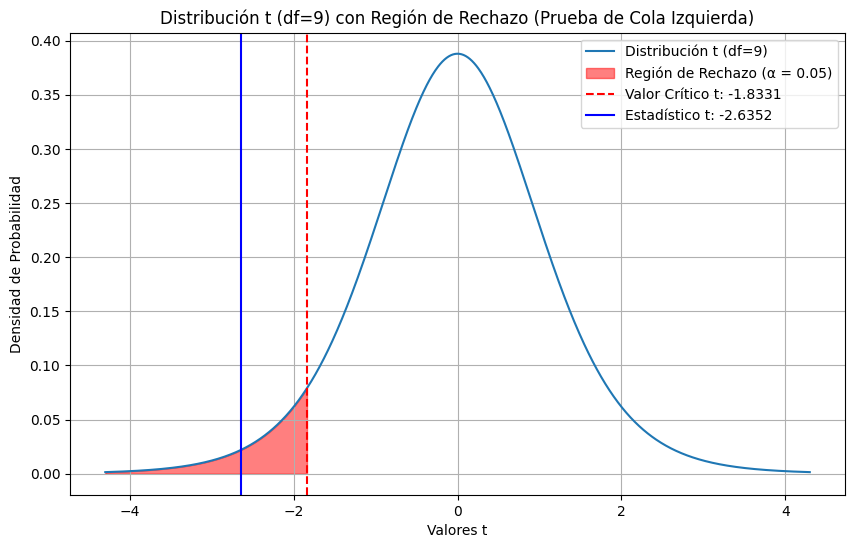


Este gráfico muestra la distribución t con 9 grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = 0.05.
Si el estadístico de prueba t (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.
En este caso, el estadístico t (-2.6352) se encuentra dentro de la región de rechazo.


In [ ]:
# Ejercicio 28. Prueba de hipótesis para la media poblacional (sigma desconocida - t-test).

# Procedimiento sistemático para la prueba de hipótesis (usando t-test):

# Datos proporcionados:
mu0_ej28 = 15  # Media poblacional bajo la hipótesis nula (consumo afirmado) en km/L
n_ej28 = 10  # Tamaño de la muestra (n < 30)
media_muestra_ej28 = 14  # Media de la muestra en km/L
desviacion_estandar_muestra_ej28 = 1.2  # Desviación estándar de la muestra en km/L
alfa_ej28 = 0.05  # Nivel de significancia

print(f"--- Ejercicio 28 ---")
print(f"Media poblacional bajo H0 (mu0): {mu0_ej28} km/L")
print(f"Tamaño de la muestra (n): {n_ej28}")
print(f"Media de la muestra: {media_muestra_ej28} km/L")
print(f"Desviación estándar de la muestra (s): {desviacion_estandar_muestra_ej28} km/L")
print(f"Nivel de significancia (alfa): {alfa_ej28}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la media poblacional es igual al valor afirmado.
# La hipótesis alternativa (H1) es que el consumo es menor (dado que la media muestral es menor que mu0).
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): μ = {mu0_ej28} km/L")
print(f"Hipótesis Alternativa (H1): μ < {mu0_ej28} km/L (Prueba de una cola a la izquierda)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej28 = 0.05.
print(f"\n2. Nivel de Significancia (α): {alfa_ej28}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Como la desviación estándar poblacional es desconocida y el tamaño de la muestra (n=10) es pequeño,
# utilizamos el estadístico t y la distribución t de Student.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: t")
print("Distribución Muestral: Distribución t de Student")
print(f"Grados de Libertad (df): n - 1 = {n_ej28 - 1}")


# 4. Formular la regla de decisión.
# Para una prueba de una cola a la izquierda con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba t es menor que el valor crítico t para alfa con n-1 grados de libertad.
# El valor crítico t para una cola a la izquierda se encuentra usando t.ppf(alfa, df).
from scipy.stats import t

grados_libertad_ej28 = n_ej28 - 1
valor_critico_t_ej28 = t.ppf(alfa_ej28, grados_libertad_ej28)


print("\n4. Regla de Decisión:")
print(f"Grados de Libertad (df): {grados_libertad_ej28}")
print(f"Valor Crítico t (para α = {alfa_ej28} en la cola izquierda con df={grados_libertad_ej28}): {valor_critico_t_ej28:.4f}")
print(f"Regla: Rechazar H0 si t < {valor_critico_t_ej28:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el error estándar de la media (s / sqrt(n)).
import numpy as np
error_estandar_ej28 = desviacion_estandar_muestra_ej28 / np.sqrt(n_ej28)

# Calcular el estadístico de prueba t.
# Fórmula: t = (media_muestra - mu0) / error_estandar
estadistico_t_ej28 = (media_muestra_ej28 - mu0_ej28) / error_estandar_ej28

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Error Estándar de la Media: {error_estandar_ej28:.4f}")
print(f"Estadístico de Prueba t: {estadistico_t_ej28:.4f}")

# Calcular el p-valor (probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado,
# asumiendo que H0 es verdadera). Para una prueba de cola izquierda, es el área a la izquierda del estadístico t.
p_valor_ej28 = t.cdf(estadistico_t_ej28, grados_libertad_ej28)


print(f"P-valor: {p_valor_ej28:.4f}")


# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_t_ej28 < valor_critico_t_ej28:
    print(f"Decisión: Rechazar H0 (ya que t = {estadistico_t_ej28:.4f} < Valor Crítico t = {valor_critico_t_ej28:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej28:.4f} <= α = {alfa_ej28})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej28}, para afirmar que el consumo promedio del auto es menor a {mu0_ej28} km/L.")
else:
    print(f"Decisión: No rechazar H0 (ya que t = {estadistico_t_ej28:.4f} >= Valor Crítico t = {valor_critico_t_ej28:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej28:.4f} > α = {alfa_ej28})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej28}, para afirmar que el consumo promedio del auto es menor a {mu0_ej28} km/L. No podemos rechazar la afirmación del fabricante.")


# Graficar la distribución t, el valor crítico t y el estadístico de prueba t
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Generar puntos para la curva t
x_t_ej28 = np.linspace(t.ppf(0.001, grados_libertad_ej28), t.ppf(0.999, grados_libertad_ej28), 1000)
y_t_ej28 = t.pdf(x_t_ej28, grados_libertad_ej28) # PDF de la distribución t con los grados de libertad correctos

plt.figure(figsize=(10, 6))
plt.plot(x_t_ej28, y_t_ej28, label=f'Distribución t (df={grados_libertad_ej28})')

# Sombrear la región de rechazo (área a la izquierda del valor crítico t)
x_rechazo_ej28 = x_t_ej28[x_t_ej28 < valor_critico_t_ej28]
y_rechazo_ej28 = t.pdf(x_rechazo_ej28, grados_libertad_ej28)
plt.fill_between(x_rechazo_ej28, y_rechazo_ej28, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa_ej28})')

# Marcar el valor crítico t
plt.axvline(valor_critico_t_ej28, color='red', linestyle='--', label=f'Valor Crítico t: {valor_critico_t_ej28:.4f}')

# Marcar el estadístico de prueba t
plt.axvline(estadistico_t_ej28, color='blue', linestyle='-', label=f'Estadístico t: {estadistico_t_ej28:.4f}')


# Configurar el gráfico
plt.title(f'Distribución t (df={grados_libertad_ej28}) con Región de Rechazo (Prueba de Cola Izquierda)')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución t con {grados_libertad_ej28} grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa_ej28}.")
print(f"Si el estadístico de prueba t (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico t ({estadistico_t_ej28:.4f}) se encuentra {'dentro' if estadistico_t_ej28 < valor_critico_t_ej28 else 'fuera'} de la región de rechazo.")

# Ejercicio 29
Un suplemento promete aumentar el nivel de hierro en la sangre en 2 mg/dL. En 8 pacientes, el aumento promedio fue 1.5 mg/dL con s = 0,6 mg/dL. Con un nivel de significancia de α = 0,10.

1.      Plantee las hipótesis nula y alternativa.
2.      Calcule el estadístico t.
3.      Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
4.      Concluya si se rechaza H0.

--- Ejercicio 29 ---
Media poblacional bajo H0 (mu0): 2 mg/dL
Tamaño de la muestra (n): 8
Media de la muestra: 1.5 mg/dL
Desviación estándar de la muestra (s): 0.6 mg/dL
Nivel de significancia (alfa): 0.1

1. Establecimiento de Hipótesis:
Hipótesis Nula (H0): μ = 2 mg/dL
Hipótesis Alternativa (H1): μ < 2 mg/dL (Prueba de una cola a la izquierda)

2. Nivel de Significancia (α): 0.1

3. Estadístico de Prueba y Distribución:
Estadístico de Prueba: t
Distribución Muestral: Distribución t de Student
Grados de Libertad (df): n - 1 = 7

4. Regla de Decisión:
Grados de Libertad (df): 7
Valor Crítico t (para α = 0.1 en la cola izquierda con df=7): -1.4149
Regla: Rechazar H0 si t < -1.4149

5. Cálculo del Estadístico de Prueba:
Error Estándar de la Media: 0.2121
Estadístico de Prueba t: -2.3570
P-valor: 0.0253

6. Decisión Estadística y Conclusión:
Decisión: Rechazar H0 (ya que t = -2.3570 < Valor Crítico t = -1.4149)
O, Rechazar H0 (ya que p-valor = 0.0253 <= α = 0.1)
Conclusión: Existe suficie

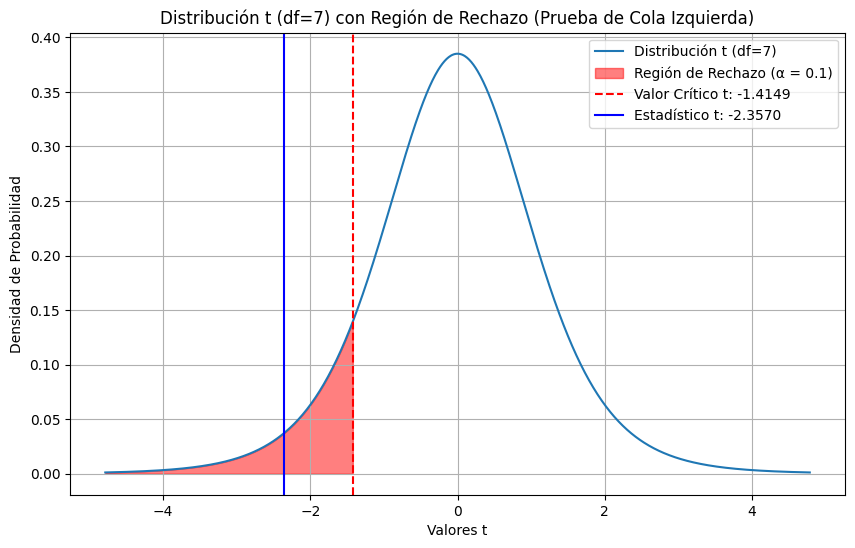


Este gráfico muestra la distribución t con 7 grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = 0.1.
Si el estadístico de prueba t (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.
En este caso, el estadístico t (-2.3570) se encuentra dentro de la región de rechazo.


In [2]:
# Ejercicio 29. Prueba de hipótesis para la media poblacional (sigma desconocida - t-test).

# Procedimiento sistemático para la prueba de hipótesis (usando t-test):

# Datos proporcionados:
mu0_ej29 = 2  # Media poblacional bajo la hipótesis nula (aumento prometido) en mg/dL
n_ej29 = 8  # Tamaño de la muestra (n < 30)
media_muestra_ej29 = 1.5  # Media de la muestra en mg/dL
desviacion_estandar_muestra_ej29 = 0.6  # Desviación estándar de la muestra en mg/dL
alfa_ej29 = 0.10  # Nivel de significancia

print(f"--- Ejercicio 29 ---")
print(f"Media poblacional bajo H0 (mu0): {mu0_ej29} mg/dL")
print(f"Tamaño de la muestra (n): {n_ej29}")
print(f"Media de la muestra: {media_muestra_ej29} mg/dL")
print(f"Desviación estándar de la muestra (s): {desviacion_estandar_muestra_ej29} mg/dL")
print(f"Nivel de significancia (alfa): {alfa_ej29}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la media poblacional es igual al valor prometido.
# La hipótesis alternativa (H1) es que el aumento promedio es menor (dado que la media muestral es menor que mu0).
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): μ = {mu0_ej29} mg/dL")
print(f"Hipótesis Alternativa (H1): μ < {mu0_ej29} mg/dL (Prueba de una cola a la izquierda)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej29 = 0.10.
print(f"\n2. Nivel de Significancia (α): {alfa_ej29}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Como la desviación estándar poblacional es desconocida y el tamaño de la muestra (n=8) es pequeño,
# utilizamos el estadístico t y la distribución t de Student.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: t")
print("Distribución Muestral: Distribución t de Student")
print(f"Grados de Libertad (df): n - 1 = {n_ej29 - 1}")


# 4. Formular la regla de decisión.
# Para una prueba de una cola a la izquierda con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba t es menor que el valor crítico t para alfa con n-1 grados de libertad.
# El valor crítico t para una cola a la izquierda se encuentra usando t.ppf(alfa, df).
from scipy.stats import t

grados_libertad_ej29 = n_ej29 - 1
valor_critico_t_ej29 = t.ppf(alfa_ej29, grados_libertad_ej29)


print("\n4. Regla de Decisión:")
print(f"Grados de Libertad (df): {grados_libertad_ej29}")
print(f"Valor Crítico t (para α = {alfa_ej29} en la cola izquierda con df={grados_libertad_ej29}): {valor_critico_t_ej29:.4f}")
print(f"Regla: Rechazar H0 si t < {valor_critico_t_ej29:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el error estándar de la media (s / sqrt(n)).
import numpy as np
error_estandar_ej29 = desviacion_estandar_muestra_ej29 / np.sqrt(n_ej29)

# Calcular el estadístico de prueba t.
# Fórmula: t = (media_muestra - mu0) / error_estandar
estadistico_t_ej29 = (media_muestra_ej29 - mu0_ej29) / error_estandar_ej29

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Error Estándar de la Media: {error_estandar_ej29:.4f}")
print(f"Estadístico de Prueba t: {estadistico_t_ej29:.4f}")

# Calcular el p-valor (probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado,
# asumiendo que H0 es verdadera). Para una prueba de cola izquierda, es el área a la izquierda del estadístico t.
p_valor_ej29 = t.cdf(estadistico_t_ej29, grados_libertad_ej29)


print(f"P-valor: {p_valor_ej29:.4f}")


# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_t_ej29 < valor_critico_t_ej29:
    print(f"Decisión: Rechazar H0 (ya que t = {estadistico_t_ej29:.4f} < Valor Crítico t = {valor_critico_t_ej29:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej29:.4f} <= α = {alfa_ej29})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej29}, para afirmar que el aumento promedio del nivel de hierro en la sangre es menor a {mu0_ej29} mg/dL.")
else:
    print(f"Decisión: No rechazar H0 (ya que t = {estadistico_t_ej29:.4f} >= Valor Crítico t = {valor_critico_t_ej29:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej29:.4f} > α = {alfa_ej29})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej29}, para afirmar que el aumento promedio del nivel de hierro en la sangre es menor a {mu0_ej29} mg/dL. No podemos rechazar la afirmación del suplemento.")


# Graficar la distribución t, el valor crítico t y el estadístico de prueba t
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Generar puntos para la curva t
x_t_ej29 = np.linspace(t.ppf(0.001, grados_libertad_ej29), t.ppf(0.999, grados_libertad_ej29), 1000)
y_t_ej29 = t.pdf(x_t_ej29, grados_libertad_ej29) # PDF de la distribución t con los grados de libertad correctos

plt.figure(figsize=(10, 6))
plt.plot(x_t_ej29, y_t_ej29, label=f'Distribución t (df={grados_libertad_ej29})')

# Sombrear la región de rechazo (área a la izquierda del valor crítico t)
x_rechazo_ej29 = x_t_ej29[x_t_ej29 < valor_critico_t_ej29]
y_rechazo_ej29 = t.pdf(x_rechazo_ej29, grados_libertad_ej29)
plt.fill_between(x_rechazo_ej29, y_rechazo_ej29, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa_ej29})')

# Marcar el valor crítico t
plt.axvline(valor_critico_t_ej29, color='red', linestyle='--', label=f'Valor Crítico t: {valor_critico_t_ej29:.4f}')

# Marcar el estadístico de prueba t
plt.axvline(estadistico_t_ej29, color='blue', linestyle='-', label=f'Estadístico t: {estadistico_t_ej29:.4f}')


# Configurar el gráfico
plt.title(f'Distribución t (df={grados_libertad_ej29}) con Región de Rechazo (Prueba de Cola Izquierda)')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución t con {grados_libertad_ej29} grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa_ej29}.")
print(f"Si el estadístico de prueba t (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico t ({estadistico_t_ej29:.4f}) se encuentra {'dentro' if estadistico_t_ej29 < valor_critico_t_ej29 else 'fuera'} de la región de rechazo.")

# Ejercicio 30
Un suplemento promete aumentar el nivel de hierro en la sangre en 2 mg/dL. En 8 pacientes, el aumento promedio fue 1.5 mg/dL con s = 0,6 mg/dL. Con un nivel de significancia de α = 0,10.

1.      Plantee las hipótesis nula y alternativa.
2.      Calcule el estadístico t.
3.      Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
4.      Concluya si se rechaza H0.

In [ ]:
# Ejercicio 30. Prueba de hipótesis para la media poblacional (sigma desconocida - t-test).

# Procedimiento sistemático para la prueba de hipótesis (usando t-test):

# Datos proporcionados:
mu0_ej30 = 10000  # Media poblacional bajo la hipótesis nula (duración afirmada) en horas
n_ej30 = 20  # Tamaño de la muestra (n < 30)
media_muestra_ej30 = 9800  # Media de la muestra en horas
desviacion_estandar_muestra_ej30 = 300  # Desviación estándar de la muestra en horas
alfa_ej30 = 0.05  # Nivel de significancia

print(f"--- Ejercicio 30 ---")
print(f"Media poblacional bajo H0 (mu0): {mu0_ej30} horas")
print(f"Tamaño de la muestra (n): {n_ej30}")
print(f"Media de la muestra: {media_muestra_ej30} horas")
print(f"Desviación estándar de la muestra (s): {desviacion_estandar_muestra_ej30} horas")
print(f"Nivel de significancia (alfa): {alfa_ej30}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la media poblacional es igual al valor afirmado.
# La hipótesis alternativa (H1) es que la duración es menor (dado que la media muestral es menor que mu0).
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): μ = {mu0_ej30} horas")
print(f"Hipótesis Alternativa (H1): μ < {mu0_ej30} horas (Prueba de una cola a la izquierda)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej30 = 0.05.
print(f"\n2. Nivel de Significancia (α): {alfa_ej30}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Como la desviación estándar poblacional es desconocida y el tamaño de la muestra (n=20) es pequeño,
# utilizamos el estadístico t y la distribución t de Student.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: t")
print("Distribución Muestral: Distribución t de Student")
print(f"Grados de Libertad (df): n - 1 = {n_ej30 - 1}")


# 4. Formular la regla de decisión.
# Para una prueba de una cola a la izquierda con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba t es menor que el valor crítico t para alfa con n-1 grados de libertad.
# El valor crítico t para una cola a la izquierda se encuentra usando t.ppf(alfa, df).
from scipy.stats import t

grados_libertad_ej30 = n_ej30 - 1
valor_critico_t_ej30 = t.ppf(alfa_ej30, grados_libertad_ej30)


print("\n4. Regla de Decisión:")
print(f"Grados de Libertad (df): {grados_libertad_ej30}")
print(f"Valor Crítico t (para α = {alfa_ej30} en la cola izquierda con df={grados_libertad_ej30}): {valor_critico_t_ej30:.4f}")
print(f"Regla: Rechazar H0 si t < {valor_critico_t_ej30:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el error estándar de la media (s / sqrt(n)).
import numpy as np
error_estandar_ej30 = desviacion_estandar_muestra_ej30 / np.sqrt(n_ej30)

# Calcular el estadístico de prueba t.
# Fórmula: t = (media_muestra - mu0) / error_estandar
estadistico_t_ej30 = (media_muestra_ej30 - mu0_ej30) / error_estandar_ej30

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Error Estándar de la Media: {error_estandar_ej30:.4f}")
print(f"Estadístico de Prueba t: {estadistico_t_ej30:.4f}")

# Calcular el p-valor (probabilidad de obtener un estadístico de prueba tan extremo o más extremo que el observado,
# asumiendo que H0 es verdadera). Para una prueba de cola izquierda, es el área a la izquierda del estadístico t.
p_valor_ej30 = t.cdf(estadistico_t_ej30, grados_libertad_ej30)


print(f"P-valor: {p_valor_ej30:.4f}")


# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_t_ej30 < valor_critico_t_ej30:
    print(f"Decisión: Rechazar H0 (ya que t = {estadistico_t_ej30:.4f} < Valor Crítico t = {valor_critico_t_ej30:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej30:.4f} <= α = {alfa_ej30})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej30}, para afirmar que la duración promedio de los focos es menor a {mu0_ej30} horas.")
else:
    print(f"Decisión: No rechazar H0 (ya que t = {estadistico_t_ej30:.4f} >= Valor Crítico t = {valor_critico_t_ej30:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej30:.4f} > α = {alfa_ej30})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej30}, para afirmar que la duración promedio de los focos es menor a {mu0_ej30} horas. No podemos rechazar la afirmación del fabricante.")


# Graficar la distribución t, el valor crítico t y el estadístico de prueba t
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Generar puntos para la curva t
x_t_ej30 = np.linspace(t.ppf(0.001, grados_libertad_ej30), t.ppf(0.999, grados_libertad_ej30), 1000)
y_t_ej30 = t.pdf(x_t_ej30, grados_libertad_ej30) # PDF de la distribución t con los grados de libertad correctos

plt.figure(figsize=(10, 6))
plt.plot(x_t_ej30, y_t_ej30, label=f'Distribución t (df={grados_libertad_ej30})')

# Sombrear la región de rechazo (área a la izquierda del valor crítico t)
x_rechazo_ej30 = x_t_ej30[x_t_ej30 < valor_critico_t_ej30]
y_rechazo_ej30 = t.pdf(x_rechazo_ej30, grados_libertad_ej30)
plt.fill_between(x_rechazo_ej30, y_rechazo_ej30, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa_ej30})')

# Marcar el valor crítico t
plt.axvline(valor_critico_t_ej30, color='red', linestyle='--', label=f'Valor Crítico t: {valor_critico_t_ej30:.4f}')

# Marcar el estadístico de prueba t
plt.axvline(estadistico_t_ej30, color='blue', linestyle='-', label=f'Estadístico t: {estadistico_t_ej30:.4f}')


# Configurar el gráfico
plt.title(f'Distribución t (df={grados_libertad_ej30}) con Región de Rechazo (Prueba de Cola Izquierda)')
plt.xlabel('Valores t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución t con {grados_libertad_ej30} grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa_ej30}.")
print(f"Si el estadístico de prueba t (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico t ({estadistico_t_ej30:.4f}) se encuentra {'dentro' if estadistico_t_ej30 < valor_critico_t_ej30 else 'fuera'} de la región de rechazo.")

# Ejercicio 31
Una compañía de telefonía afirma que la varianza del tiempo de duración de las llamadas es de σ² = 2,5 minutos². Se toma una muestra de n = 16 llamadas y se obtiene una varianza muestral de s² = 4. ¿Hay evidencia al 5 % de significancia de que la varianza poblacional difiere de 2.5? Resuelva siguiendo el siguiente protocolo:
1.      Plantee las hipótesis nula y alternativa.
2.      Calcule el estadístico X².
3.      Determine los grados de libertad Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
4.      Concluya si se rechaza H0.

# Ejercicio 32
Una máquina embotelladora debe mantener la varianza del llenado en σ² = 1,2 ml². Se toma una muestra de n = 20 botellas y se encuentra s² = 2,0. ¿Existe evidencia al 1 % de que la varianza es mayor? Resuelva siguiendo el siguiente protocolo:
1.      Plantee las hipótesis nula y alternativa.
2.      Calcule el estadístico χ².
3.      Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
4.      Concluya si se rechaza H0.

In [ ]:
# Ejercicio 32. Prueba de hipótesis para la varianza poblacional (Chi-cuadrado test - Cola Derecha).

# Procedimiento sistemático para la prueba de hipótesis (usando Chi-cuadrado test):

# Datos proporcionados:
sigma2_0_ej32 = 1.2  # Varianza poblacional bajo la hipótesis nula en ml²
n_ej32 = 20  # Tamaño de la muestra
s2_ej32 = 2.0  # Varianza de la muestra en ml²
alfa_ej32 = 0.01  # Nivel de significancia

print(f"--- Ejercicio 32 ---")
print(f"Varianza poblacional bajo H0 (sigma^2_0): {sigma2_0_ej32} ml²")
print(f"Tamaño de la muestra (n): {n_ej32}")
print(f"Varianza de la muestra (s^2): {s2_ej32} ml²")
print(f"Nivel de significancia (alfa): {alfa_ej32}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la varianza poblacional es igual al valor afirmado.
# La hipótesis alternativa (H1) es que la varianza poblacional es mayor (prueba de una cola a la derecha).
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): σ² = {sigma2_0_ej32} ml²")
print(f"Hipótesis Alternativa (H1): σ² > {sigma2_0_ej32} ml² (Prueba de una cola a la derecha)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej32 = 0.01.
print(f"\n2. Nivel de Significancia (α): {alfa_ej32}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Para probar una hipótesis sobre la varianza poblacional, utilizamos el estadístico Chi-cuadrado (χ²)
# y la distribución Chi-cuadrado con n-1 grados de libertad.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: Chi-cuadrado (χ²)")
print("Distribución Muestral: Distribución Chi-cuadrado")
print(f"Grados de Libertad (df): n - 1 = {n_ej32 - 1}")

# 4. Formular la regla de decisión.
# Para una prueba de una cola a la derecha con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba χ² es mayor que el valor crítico χ² para 1 - alfa, con n-1 grados de libertad.
from scipy.stats import chi2

grados_libertad_ej32 = n_ej32 - 1

# Valor crítico Chi-cuadrado superior (para 1 - alfa)
valor_critico_chi2_ej32 = chi2.ppf(1 - alfa_ej32, grados_libertad_ej32)


print("\n4. Regla de Decisión:")
print(f"Grados de Libertad (df): {grados_libertad_ej32}")
print(f"Valor Crítico Chi-cuadrado (para 1 - α = {1 - alfa_ej32} con df={grados_libertad_ej32}): {valor_critico_chi2_ej32:.4f}")
print(f"Regla: Rechazar H0 si χ² > {valor_critico_chi2_ej32:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el estadístico de prueba Chi-cuadrado (χ²).
# Fórmula: χ² = ((n - 1) * s²) / σ²₀
estadistico_chi2_ej32 = ((n_ej32 - 1) * s2_ej32) / sigma2_0_ej32

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Estadístico de Prueba χ²: {estadistico_chi2_ej32:.4f}")

# Calcular el p-valor. Para una prueba de cola derecha, es el área a la derecha del estadístico Chi-cuadrado.
p_valor_ej32 = chi2.sf(estadistico_chi2_ej32, grados_libertad_ej32)

print(f"P-valor: {p_valor_ej32:.4f}")

# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_chi2_ej32 > valor_critico_chi2_ej32:
    print(f"Decisión: Rechazar H0 (ya que χ² = {estadistico_chi2_ej32:.4f} > Valor Crítico χ² = {valor_critico_chi2_ej32:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej32:.4f} <= α = {alfa_ej32})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej32}, para afirmar que la varianza poblacional del llenado de las botellas es mayor a {sigma2_0_ej32} ml².")
else:
    print(f"Decisión: No rechazar H0 (ya que χ² = {estadistico_chi2_ej32:.4f} <= Valor Crítico χ² = {valor_critico_chi2_ej32:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej32:.4f} > α = {alfa_ej32})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej32}, para afirmar que la varianza poblacional del llenado de las botellas es mayor a {sigma2_0_ej32} ml². No podemos rechazar la afirmación de que la varianza es {sigma2_0_ej32} ml².")


# Graficar la distribución Chi-cuadrado, el valor crítico y el estadístico de prueba
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# Generar puntos para la curva Chi-cuadrado
# Ajustar el rango x para que sea más apropiado para la distribución Chi-cuadrado
# Empezamos desde 0 ya que Chi-cuadrado es siempre no negativo
# El límite superior puede ser un percentil alto o basado en los valores críticos y estadístico
x_chi2_ej32 = np.linspace(0, max(estadistico_chi2_ej32 + 5, valor_critico_chi2_ej32 + 5, 15), 1000)
y_chi2_ej32 = chi2.pdf(x_chi2_ej32, grados_libertad_ej32) # PDF de la distribución Chi-cuadrado

plt.figure(figsize=(10, 6))
plt.plot(x_chi2_ej32, y_chi2_ej32, label=f'Distribución χ² (df={grados_libertad_ej32})')

# Sombrear la región de rechazo (área a la derecha del valor crítico Chi-cuadrado)
x_rechazo_ej32 = x_chi2_ej32[x_chi2_ej32 > valor_critico_chi2_ej32]
y_rechazo_ej32 = chi2.pdf(x_rechazo_ej32, grados_libertad_ej32)
plt.fill_between(x_rechazo_ej32, y_rechazo_ej32, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa_ej32})')

# Marcar el valor crítico Chi-cuadrado
plt.axvline(valor_critico_chi2_ej32, color='red', linestyle='--', label=f'Valor Crítico χ²: {valor_critico_chi2_ej32:.4f}')

# Marcar el estadístico de prueba Chi-cuadrado
plt.axvline(estadistico_chi2_ej32, color='blue', linestyle='-', label=f'Estadístico χ²: {estadistico_chi2_ej32:.4f}')

# Configurar el gráfico
plt.title(f'Distribución χ² (df={grados_libertad_ej32}) con Región de Rechazo (Prueba de Cola Derecha)')
plt.xlabel('Valores χ²')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución Chi-cuadrado con {grados_libertad_ej32} grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa_ej32}.")
print(f"Si el estadístico de prueba χ² (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico χ² ({estadistico_chi2_ej32:.4f}) se encuentra {'dentro' if estadistico_chi2_ej32 > valor_critico_chi2_ej32 else 'fuera'} de la región de rechazo.")

In [ ]:
# Ejercicio 31. Prueba de hipótesis para la varianza poblacional (Chi-cuadrado test).

# Procedimiento sistemático para la prueba de hipótesis (usando Chi-cuadrado test):

# Datos proporcionados:
sigma2_0_ej31 = 2.5  # Varianza poblacional bajo la hipótesis nula en minutos²
n_ej31 = 16  # Tamaño de la muestra
s2_ej31 = 4  # Varianza de la muestra en minutos²
alfa_ej31 = 0.05  # Nivel de significancia

print(f"--- Ejercicio 31 ---")
print(f"Varianza poblacional bajo H0 (sigma^2_0): {sigma2_0_ej31} minutos²")
print(f"Tamaño de la muestra (n): {n_ej31}")
print(f"Varianza de la muestra (s^2): {s2_ej31} minutos²")
print(f"Nivel de significancia (alfa): {alfa_ej31}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la varianza poblacional es igual al valor afirmado.
# La hipótesis alternativa (H1) es que la varianza poblacional difiere del valor afirmado (prueba de dos colas).
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): σ² = {sigma2_0_ej31} minutos²")
print(f"Hipótesis Alternativa (H1): σ² ≠ {sigma2_0_ej31} minutos² (Prueba de dos colas)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej31 = 0.05.
print(f"\n2. Nivel de Significancia (α): {alfa_ej31}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Para probar una hipótesis sobre la varianza poblacional, utilizamos el estadístico Chi-cuadrado (χ²)
# y la distribución Chi-cuadrado con n-1 grados de libertad.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: Chi-cuadrado (χ²)")
print("Distribución Muestral: Distribución Chi-cuadrado")
print(f"Grados de Libertad (df): n - 1 = {n_ej31 - 1}")

# 4. Formular la regla de decisión.
# Para una prueba de dos colas con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba χ² es menor que el valor crítico χ² para alfa/2
# o mayor que el valor crítico χ² para 1 - alfa/2, ambos con n-1 grados de libertad.
from scipy.stats import chi2

grados_libertad_ej31 = n_ej31 - 1
alfa_dos_colas_ej31 = alfa_ej31 / 2

# Valor crítico Chi-cuadrado inferior (para alfa/2)
valor_critico_chi2_inferior_ej31 = chi2.ppf(alfa_dos_colas_ej31, grados_libertad_ej31)

# Valor crítico Chi-cuadrado superior (para 1 - alfa/2)
valor_critico_chi2_superior_ej31 = chi2.ppf(1 - alfa_dos_colas_ej31, grados_libertad_ej31)


print("\n4. Regla de Decisión:")
print(f"Grados de Libertad (df): {grados_libertad_ej31}")
print(f"Valores Críticos Chi-cuadrado (para α/2 = {alfa_dos_colas_ej31} y 1 - α/2 = {1 - alfa_dos_colas_ej31} con df={grados_libertad_ej31}): [{valor_critico_chi2_inferior_ej31:.4f}, {valor_critico_chi2_superior_ej31:.4f}]")
print(f"Regla: Rechazar H0 si χ² < {valor_critico_chi2_inferior_ej31:.4f} o χ² > {valor_critico_chi2_superior_ej31:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el estadístico de prueba Chi-cuadrado (χ²).
# Fórmula: χ² = ((n - 1) * s²) / σ²₀
estadistico_chi2_ej31 = ((n_ej31 - 1) * s2_ej31) / sigma2_0_ej31

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Estadístico de Prueba χ²: {estadistico_chi2_ej31:.4f}")

# Calcular el p-valor. Para una prueba de dos colas, es el doble del área en la cola más cercana al estadístico Chi-cuadrado.
# Si el estadístico es menor que la mediana de la distribución Chi-cuadrado (aproximadamente los grados de libertad),
# el p-valor es 2 * P(χ² <= estadistico_chi2). Si es mayor, es 2 * P(χ² >= estadistico_chi2).
# Una forma más general es usar sf (survival function, 1-cdf) para la cola superior y cdf para la cola inferior.
# p-valor = 2 * min(P(χ² <= estadistico_chi2), P(χ² >= estadistico_chi2))
p_valor_ej31 = 2 * min(chi2.cdf(estadistico_chi2_ej31, grados_libertad_ej31), chi2.sf(estadistico_chi2_ej31, grados_libertad_ej31))

print(f"P-valor: {p_valor_ej31:.4f}")

# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_chi2_ej31 < valor_critico_chi2_inferior_ej31 or estadistico_chi2_ej31 > valor_critico_chi2_superior_ej31:
    print(f"Decisión: Rechazar H0 (ya que χ² = {estadistico_chi2_ej31:.4f} está fuera del rango [{valor_critico_chi2_inferior_ej31:.4f}, {valor_critico_chi2_superior_ej31:.4f}])")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej31:.4f} <= α = {alfa_ej31})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej31}, para afirmar que la varianza poblacional del tiempo de duración de las llamadas difiere de {sigma2_0_ej31} minutos².")
else:
    print(f"Decisión: No rechazar H0 (ya que χ² = {estadistico_chi2_ej31:.4f} está dentro del rango [{valor_critico_chi2_inferior_ej31:.4f}, {valor_critico_chi2_superior_ej31:.4f}])")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej31:.4f} > α = {alfa_ej31})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej31}, para afirmar que la varianza poblacional del tiempo de duración de las llamadas difiere de {sigma2_0_ej31} minutos². No podemos rechazar la afirmación de la compañía.")


# Graficar la distribución Chi-cuadrado, los valores críticos y el estadístico de prueba
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# Generar puntos para la curva Chi-cuadrado
# Ajustar el rango x para que sea más apropiado para la distribución Chi-cuadrado
# Empezamos desde 0 ya que Chi-cuadrado es siempre no negativo
# El límite superior puede ser un percentil alto o basado en los valores críticos y estadístico
x_chi2_ej31 = np.linspace(0, max(estadistico_chi2_ej31 + 5, valor_critico_chi2_superior_ej31 + 5, 15), 1000)
y_chi2_ej31 = chi2.pdf(x_chi2_ej31, grados_libertad_ej31) # PDF de la distribución Chi-cuadrado

plt.figure(figsize=(10, 6))
plt.plot(x_chi2_ej31, y_chi2_ej31, label=f'Distribución χ² (df={grados_libertad_ej31})')

# Sombrear la región de rechazo (áreas en ambas colas)
x_rechazo_derecha_ej31 = x_chi2_ej31[x_chi2_ej31 > valor_critico_chi2_superior_ej31]
y_rechazo_derecha_ej31 = chi2.pdf(x_rechazo_derecha_ej31, grados_libertad_ej31)
plt.fill_between(x_rechazo_derecha_ej31, y_rechazo_derecha_ej31, color='red', alpha=0.5, label=f'Región de Rechazo (α/2 = {alfa_dos_colas_ej31})')

x_rechazo_izquierda_ej31 = x_chi2_ej31[x_chi2_ej31 < valor_critico_chi2_inferior_ej31]
y_rechazo_izquierda_ej31 = chi2.pdf(x_rechazo_izquierda_ej31, grados_libertad_ej31)
plt.fill_between(x_rechazo_izquierda_ej31, y_rechazo_izquierda_ej31, color='red', alpha=0.5)

# Marcar los valores críticos Chi-cuadrado
plt.axvline(valor_critico_chi2_inferior_ej31, color='red', linestyle='--', label=f'Valores Críticos χ²: {valor_critico_chi2_inferior_ej31:.4f}, {valor_critico_chi2_superior_ej31:.4f}')
plt.axvline(valor_critico_chi2_superior_ej31, color='red', linestyle='--')

# Marcar el estadístico de prueba Chi-cuadrado
plt.axvline(estadistico_chi2_ej31, color='blue', linestyle='-', label=f'Estadístico χ²: {estadistico_chi2_ej31:.4f}')

# Configurar el gráfico
plt.title(f'Distribución χ² (df={grados_libertad_ej31}) con Regiones de Rechazo (Prueba de Dos Colas)')
plt.xlabel('Valores χ²')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución Chi-cuadrado con {grados_libertad_ej31} grados de libertad. Las áreas sombreadas en rojo son las regiones de rechazo para un nivel de significancia α = {alfa_ej31}.")
print(f"Si el estadístico de prueba χ² (línea azul) cae dentro de alguna de las regiones de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico χ² ({estadistico_chi2_ej31:.4f}) se encuentra {'dentro' if estadistico_chi2_ej31 < valor_critico_chi2_inferior_ej31 or estadistico_chi2_ej31 > valor_critico_chi2_superior_ej31 else 'fuera'} de la región de rechazo.")

# Ejercicio 33
El control de calidad de una fábrica sostiene que la varianza en el grosor de piezas metálicas es de al menos σ² = 0,5 mm². Una muestra de n = 12 piezas dio una varianza s² = 0,3. ¿Se puede concluir al 5 % que la varianza poblacional es menor que la garantizada? Resuelva siguiendo el siguiente protocolo:
1. Plantee las hipótesis nula y alternativa.
2. Calcule el estadístico χ².
3. Determine los grados de libertad y el valor crítico, además de la región crítica y la región de rechazo.
4. Concluya si se rechaza H0.

In [ ]:
# Ejercicio 33. Prueba de hipótesis para la varianza poblacional (Chi-cuadrado test - Cola Izquierda).

# Procedimiento sistemático para la prueba de hipótesis (usando Chi-cuadrado test):

# Datos proporcionados:
sigma2_0_ej33 = 0.5  # Varianza poblacional bajo la hipótesis nula en mm²
n_ej33 = 12  # Tamaño de la muestra
s2_ej33 = 0.3  # Varianza de la muestra en mm²
alfa_ej33 = 0.05  # Nivel de significancia

print(f"--- Ejercicio 33 ---")
print(f"Varianza poblacional bajo H0 (sigma^2_0): {sigma2_0_ej33} mm²")
print(f"Tamaño de la muestra (n): {n_ej33}")
print(f"Varianza de la muestra (s^2): {s2_ej33} mm²")
print(f"Nivel de significancia (alfa): {alfa_ej33}")

# 1. Establecer las hipótesis nula y alternativa.
# La hipótesis nula (H0) es que la varianza poblacional es igual al valor garantizado (o mayor, dado que la afirmación es "al menos").
# La hipótesis alternativa (H1) es que la varianza poblacional es menor que el valor garantizado (prueba de una cola a la izquierda).
print("\n1. Establecimiento de Hipótesis:")
print(f"Hipótesis Nula (H0): σ² = {sigma2_0_ej33} mm² (o σ² >= {sigma2_0_ej33} mm²)") # H0 is often stated as equality for simplicity in calculation
print(f"Hipótesis Alternativa (H1): σ² < {sigma2_0_ej33} mm² (Prueba de una cola a la izquierda)")

# 2. Elegir un nivel de significancia (α).
# Ya está dado en los datos proporcionados: alfa_ej33 = 0.05.
print(f"\n2. Nivel de Significancia (α): {alfa_ej33}")

# 3. Identificar el estadístico de prueba y la distribución muestral apropiados.
# Para probar una hipótesis sobre la varianza poblacional, utilizamos el estadístico Chi-cuadrado (χ²)
# y la distribución Chi-cuadrado con n-1 grados de libertad.
print("\n3. Estadístico de Prueba y Distribución:")
print("Estadístico de Prueba: Chi-cuadrado (χ²)")
print("Distribución Muestral: Distribución Chi-cuadrado")
print(f"Grados de Libertad (df): n - 1 = {n_ej33 - 1}")

# 4. Formular la regla de decisión.
# Para una prueba de una cola a la izquierda con nivel de significancia alfa, la regla de decisión es:
# Rechazar H0 si el estadístico de prueba χ² es menor que el valor crítico χ² para alfa, con n-1 grados de libertad.
from scipy.stats import chi2

grados_libertad_ej33 = n_ej33 - 1

# Valor crítico Chi-cuadrado inferior (para alfa)
valor_critico_chi2_ej33 = chi2.ppf(alfa_ej33, grados_libertad_ej33)


print("\n4. Regla de Decisión:")
print(f"Grados de Libertad (df): {grados_libertad_ej33}")
print(f"Valor Crítico Chi-cuadrado (para α = {alfa_ej33} en la cola izquierda con df={grados_libertad_ej33}): {valor_critico_chi2_ej33:.4f}")
print(f"Regla: Rechazar H0 si χ² < {valor_critico_chi2_ej33:.4f}")

# 5. Recopilar los datos de la muestra y calcular el estadístico de prueba.
# Los datos de la muestra ya fueron proporcionados.
# Calcular el estadístico de prueba Chi-cuadrado (χ²).
# Fórmula: χ² = ((n - 1) * s²) / σ²₀
estadistico_chi2_ej33 = ((n_ej33 - 1) * s2_ej33) / sigma2_0_ej33

print("\n5. Cálculo del Estadístico de Prueba:")
print(f"Estadístico de Prueba χ²: {estadistico_chi2_ej33:.4f}")

# Calcular el p-valor. Para una prueba de cola izquierda, es el área a la izquierda del estadístico Chi-cuadrado.
p_valor_ej33 = chi2.cdf(estadistico_chi2_ej33, grados_libertad_ej33)

print(f"P-valor: {p_valor_ej33:.4f}")

# 6. Tomar la decisión estadística y establecer la conclusión.
print("\n6. Decisión Estadística y Conclusión:")
if estadistico_chi2_ej33 < valor_critico_chi2_ej33:
    print(f"Decisión: Rechazar H0 (ya que χ² = {estadistico_chi2_ej33:.4f} < Valor Crítico χ² = {valor_critico_chi2_ej33:.4f})")
    print(f"O, Rechazar H0 (ya que p-valor = {p_valor_ej33:.4f} <= α = {alfa_ej33})")
    print(f"Conclusión: Existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej33}, para afirmar que la varianza poblacional en el grosor de las piezas metálicas es menor que {sigma2_0_ej33} mm².")
else:
    print(f"Decisión: No rechazar H0 (ya que χ² = {estadistico_chi2_ej33:.4f} >= Valor Crítico χ² = {valor_critico_chi2_ej33:.4f})")
    print(f"O, No rechazar H0 (ya que p-valor = {p_valor_ej33:.4f} > α = {alfa_ej33})")
    print(f"Conclusión: No existe suficiente evidencia estadística, con un nivel de significancia de {alfa_ej33}, para afirmar que la varianza poblacional en el grosor de las piezas metálicas es menor que {sigma2_0_ej33} mm². No podemos rechazar la afirmación de que la varianza es al menos {sigma2_0_ej33} mm².")


# Graficar la distribución Chi-cuadrado, el valor crítico y el estadístico de prueba
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# Generar puntos para la curva Chi-cuadrado
# Ajustar el rango x para que sea más apropiado para la distribución Chi-cuadrado
# Empezamos desde 0 ya que Chi-cuadrado es siempre no negativo
# El límite superior puede ser un percentil alto o basado en los valores críticos y estadístico
x_chi2_ej33 = np.linspace(0, max(estadistico_chi2_ej33 + 5, valor_critico_chi2_ej33 + 5, 15), 1000)
y_chi2_ej33 = chi2.pdf(x_chi2_ej33, grados_libertad_ej33) # PDF de la distribución Chi-cuadrado

plt.figure(figsize=(10, 6))
plt.plot(x_chi2_ej33, y_chi2_ej33, label=f'Distribución χ² (df={grados_libertad_ej33})')

# Sombrear la región de rechazo (área a la left del valor crítico Chi-cuadrado)
x_rechazo_ej33 = x_chi2_ej33[x_chi2_ej33 < valor_critico_chi2_ej33]
y_rechazo_ej33 = chi2.pdf(x_rechazo_ej33, grados_libertad_ej33)
plt.fill_between(x_rechazo_ej33, y_rechazo_ej33, color='red', alpha=0.5, label=f'Región de Rechazo (α = {alfa_ej33})')

# Marcar el valor crítico Chi-cuadrado
plt.axvline(valor_critico_chi2_ej33, color='red', linestyle='--', label=f'Valor Crítico χ²: {valor_critico_chi2_ej33:.4f}')

# Marcar el estadístico de prueba Chi-cuadrado
plt.axvline(estadistico_chi2_ej33, color='blue', linestyle='-', label=f'Estadístico χ²: {estadistico_chi2_ej33:.4f}')

# Configurar el gráfico
plt.title(f'Distribución χ² (df={grados_libertad_ej33}) con Región de Rechazo (Prueba de Cola Izquierda)')
plt.xlabel('Valores χ²')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nEste gráfico muestra la distribución Chi-cuadrado con {grados_libertad_ej33} grados de libertad. La región sombreada en rojo es la región de rechazo para un nivel de significancia α = {alfa_ej33}.")
print(f"Si el estadístico de prueba χ² (línea azul) cae dentro de la región de rechazo, se rechaza la hipótesis nula.")
print(f"En este caso, el estadístico χ² ({estadistico_chi2_ej33:.4f}) se encuentra {'dentro' if estadistico_chi2_ej33 < valor_critico_chi2_ej33 else 'fuera'} de la región de rechazo.")